<a href="https://colab.research.google.com/github/jdninot/Point-Patterns-Earthquakes/blob/main/PatronesPuntuales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1>Análisis de patrones puntuales de sismos en el departamento Quindío, Colombia</h1> </center>

<center>Maria Camila Gómez Erazo, Jesús David Niño Torres, Julieth Andrea López Castiblanco

15 de diciembre de 2020</center>

# Información general de sismos



**¿Qué son los sismos?**

Los sismos son movimientos bruscos de la tierra considerados temblores o terremotos que se presentan con movimientos vibratorios de la superficie terrestre. Habitualmente estos movimientos son lentos e imperceptibles, pero en algunos el desplazamiento libera una gran cantidad de energía, cuando una de las placas se mueve bruscamente contra la otra, rompiéndola y originando el Terremoto.

**¿Por qué se producen?**

Se producen por las perturbaciones en el interior de la Tierra y la liberación de energía acumulada durante un periodo de tiempo. También pueden originarse por la activación de fallas sísmicas y la erupción de los volcanes.


**Definiciones clave**

- Placas tectónicas:  Es un fragmento de la capa superficial sólida de la Tierra (litosfera) que se mueve sobre la zona superior del manto terrestre que está debajo de la litosfera (astenosfera).

- Corteza terrestre: Es una capa composicional que forma la parte más externa de la litosfera.

- Falla geológica:  Es una fractura en la corteza terrestre a lo largo de la cual se mueven los bloques rocosos que son separados por ella.

- Magnitud Ml: Magnitud local. Es una escala logarítmica arbitraria que asigna un número para cuantificar la energía que libera un terremoto. La sismología mundial usa esta escala para determinar las fuerzas de sismos de una magnitud entre 2,0 y 6,9 y de 0 a 400 kilómetros de profundidad.

- Magnitud Mw: La escala sismológica de magnitud de momento (MW) es una escala logarítmica usada para medir y comparar terremotos. Está basada en la medición de la energía total que se libera en un sismo.

- Profundidad: Se toma como punto de profundidad el epicentro del terremoto, ya que es punto más recondito y es el que determina que porción de area se va a ver afectada, tomese como un ejemplo analogó la siguiente gráfica.

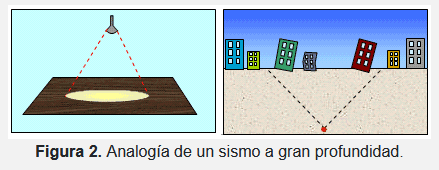

<img src = https://blogs-images.forbes.com/marshallshepherd/files/2019/07/Mag-Energy-Freq-lg.gif? width = "700" >

**Historia sísmica en Quindío**

El 25 / 01 / 1999 en Armenia, Quindío donde residían 300.000 habitantes, se presentó uno de los sismos que causó una de las mayores pérdidas, donde según las cifras del DANE, este acabó con la vida de 1.185 personas, 8.536 heridos, 35.972 viviendas y cerca del 75% de los colegios y más de un millón de m^3 de escombro. Dado este acontecimiento, las consecuencias se vieron reflejadas en un alto número de deslizamientos agravados por las fuertes lluvias, se registraron 138 replicas durante el siguiente mes, donde el segundo sismo más grave ocurrió cuatro horas después del principal con una magnitud de 5.5.

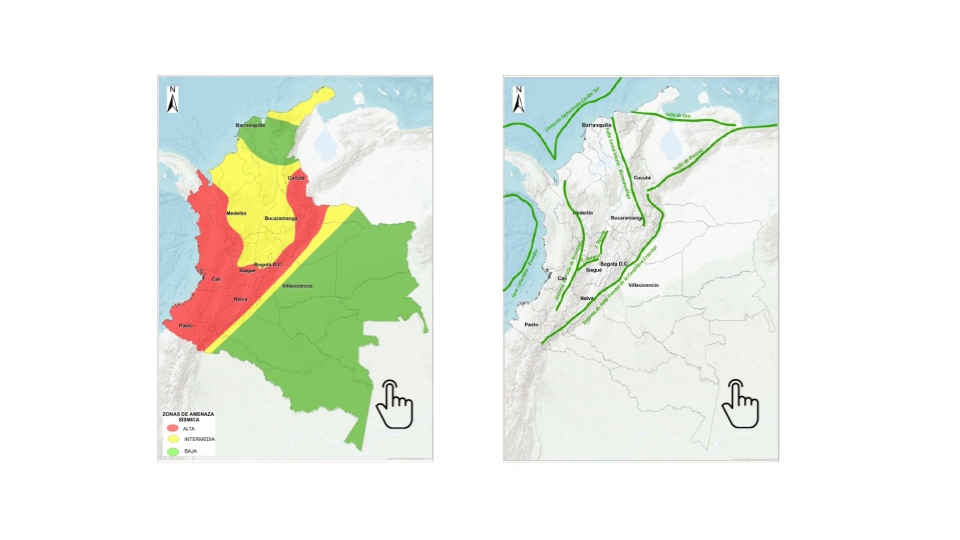

# Sistema
Se instala algunas librerias kernel en Colab para poder correr los paquetes respectivos

In [ ]:
system("apt-get update")
system("apt-get -y install --fix-missing libgdal-dev libproj-dev", intern=TRUE)
system("apt-get -y install --fix-missing libprotobuf-dev libcurl4-openssl-dev", intern=TRUE)
system("apt-get -y install --fix-missing libv8-dev libjq-dev libudunits2-dev" , intern=TRUE)

Se instala los respectivos paquetes

In [ ]:
install.packages("rgdal")
install.packages("sf")
install.packages('geojsonio')
install.packages("tidyverse")
install.packages("raster")
install.packages("spatstat")
install.packages("viridis")
install.packages("akima")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘sp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘e1071’, ‘classInt’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘triebeard’, ‘urltools’, ‘httpcode’, ‘protolite’, ‘rgeos’, ‘crul’, ‘maptools’, ‘V8’, ‘geojson’, ‘jqr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘spatstat.data’, ‘spatstat.utils’, ‘deldir’, ‘abind’, ‘tensor’, ‘polyclip’, ‘goftest’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Installing pac

## Librerias

In [ ]:
library(ggplot2)
library(rgdal)
library(sf)
library(dplyr)
library(maptools)
library(raster)
library(spatstat)
library(viridis)
library(sp)
library(RColorBrewer)
library(akima)

# Datos

El del catálogo de sismicidad del Servicio Geológico Colombiano - SGC el cual se compone de dos períodos:

El primero corresponde al catálogo comprendido entre el 1 de junio de 1993 y el 28 de febrero de 2018; Este incluye todos los eventos localizados en el territorio nacional, los cuales fueron adquiridos a través del software Earthworm1 y procesados con el software SEISAN2. 

El segundo corresponde al catálogo comprendido entre 1 de marzo de 2018 hasta la fecha; los eventos reportados en este período han sido adquiridos y procesados haciendo uso del software SeisComp33. Todos los eventos reportados en los catálogos han sido revisados manualmente por analistas de sismología del SGC.

Para el respectivo análisis se tomaron los datos del primer catalogo para el departamento del Quindío, esta base de datos esta conformada por las siguientes variables:

- Fecha
- Hora
- Latitud (grados)
- Longitud (grados)
- Profundidad (Kms)
- Magnitud Ml
- Magnitud Mw
- Departamento
- Municipio

La magnitud Ml se tomará como variable y la profundidad como la marca.

In [ ]:
bdsms = read.csv("/content/reporte553.csv", header = T)
head(bdsms, 4)

FECHA      HORA_UTC LATITUD..grados. LONGITUD..grados. PROFUNDIDAD..Km.
1 1993-09-15 09:25:37 4.250            -75.553             4.0           
2 1994-04-07 14:20:39 4.614            -75.623           144.2           
3 1994-06-01 01:52:57 4.520            -75.540             0.0           
4 1994-11-10 19:58:42 4.413            -75.767           123.9           
  MAGNITUD.Ml MAGNITUD.Mw DEPARTAMENTO MUNICIPIO  X..FASES RMS..Seg.
1 2.2         NA          QUINDIO      PIJAO       8       1.1      
2 2.4         NA          QUINDIO      CIRCASIA    4       0.5      
3 2.0         NA          QUINDIO      SALENTO     0       1.7      
4 2.9         NA          QUINDIO      LA_TEBAIDA 11       1.3      
  GAP..grados. ERROR.LATITUD..Km. ERROR.LONGITUD..Km. ERROR.PROFUNDIDAD..Km.
1 168           7.9               15.2                22.3                  
2 237          13.3               11.4                17.9                  
3   0           0.0                0.0                 0.0                  
4 202          22.1               23.7                22.0                  
  ESTADO  
1 Revisado
2 Revisado
3 Revisado
4 Revisado

## Coordenadas

Se tiene que convertir las coordenadas geodésicas a cartesianas.

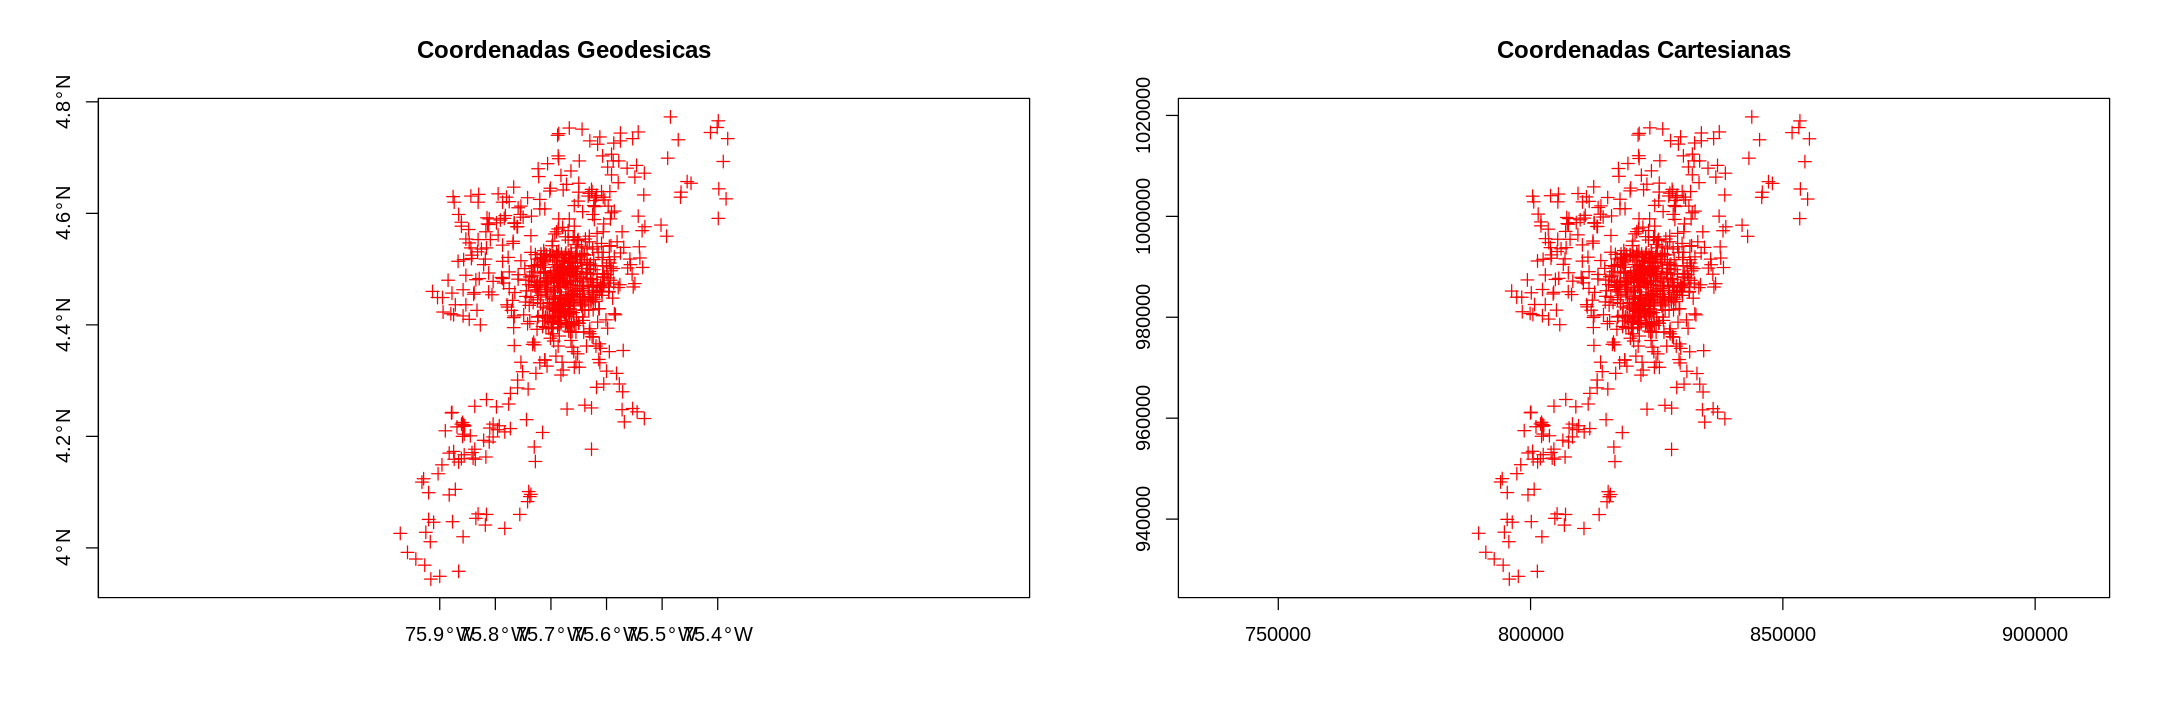

In [ ]:
# https://epsg.io/3116
bdsms_gd = data.frame(X = bdsms$LONGITUD..grados., Y = bdsms$LATITUD..grados., Magnitud = bdsms$MAGNITUD.Ml, Profundidad = bdsms$PROFUNDIDAD..Km.)
bdsms_gd_df = bdsms_gd
coordinates(bdsms_gd) = ~ X + Y
proj4string(bdsms_gd) = CRS("+init=epsg:4326")
par(mfrow=c(1,2))
plot(bdsms_gd, axes = T, main = "Coordenadas Geodesicas", col = "red")
proj4stringco = "+proj=tmerc +lat_0=4.596200416666666 +lon_0=-74.07750791666666 +k=1 +x_0=1000000 +y_0=1000000 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs"
bdsms_ct = spTransform(bdsms_gd, CRS(proj4stringco))
options(repr.plot.width=18, repr.plot.height=6)
plot(bdsms_ct, axes = T, main = "Coordenadas Cartesianas", col = "red")

# Mapa de la actividad sismica en el departamento del Quindio

## Mapa de la magnitud sismica 

Mapa que se utilizo es de los departamentos y municipios de la República de Colombia, 2009

In [ ]:
coldeptos = readOGR("/content/depto.shp")
coldeptos@proj4string@projargs = proj4stringco
coldeptos = st_as_sf(coldeptos)
quindiodep = coldeptos %>% filter(NOMBRE_DPT == "QUINDIO")
quindiodep_sply = as_Spatial(quindiodep$geometry, cast = TRUE, IDs = paste0("ID", seq_along(quindiodep$geometry)))

OGR data source with driver: ESRI Shapefile 
Source: "/content/depto.shp", layer: "depto"
with 33 features
It has 5 fields


In [ ]:
bdsms_ct = bdsms_ct[!is.na(over(bdsms_ct, as(quindiodep_sply, "SpatialPolygons"))), ]
bdsms_ct = as.data.frame(bdsms_ct)

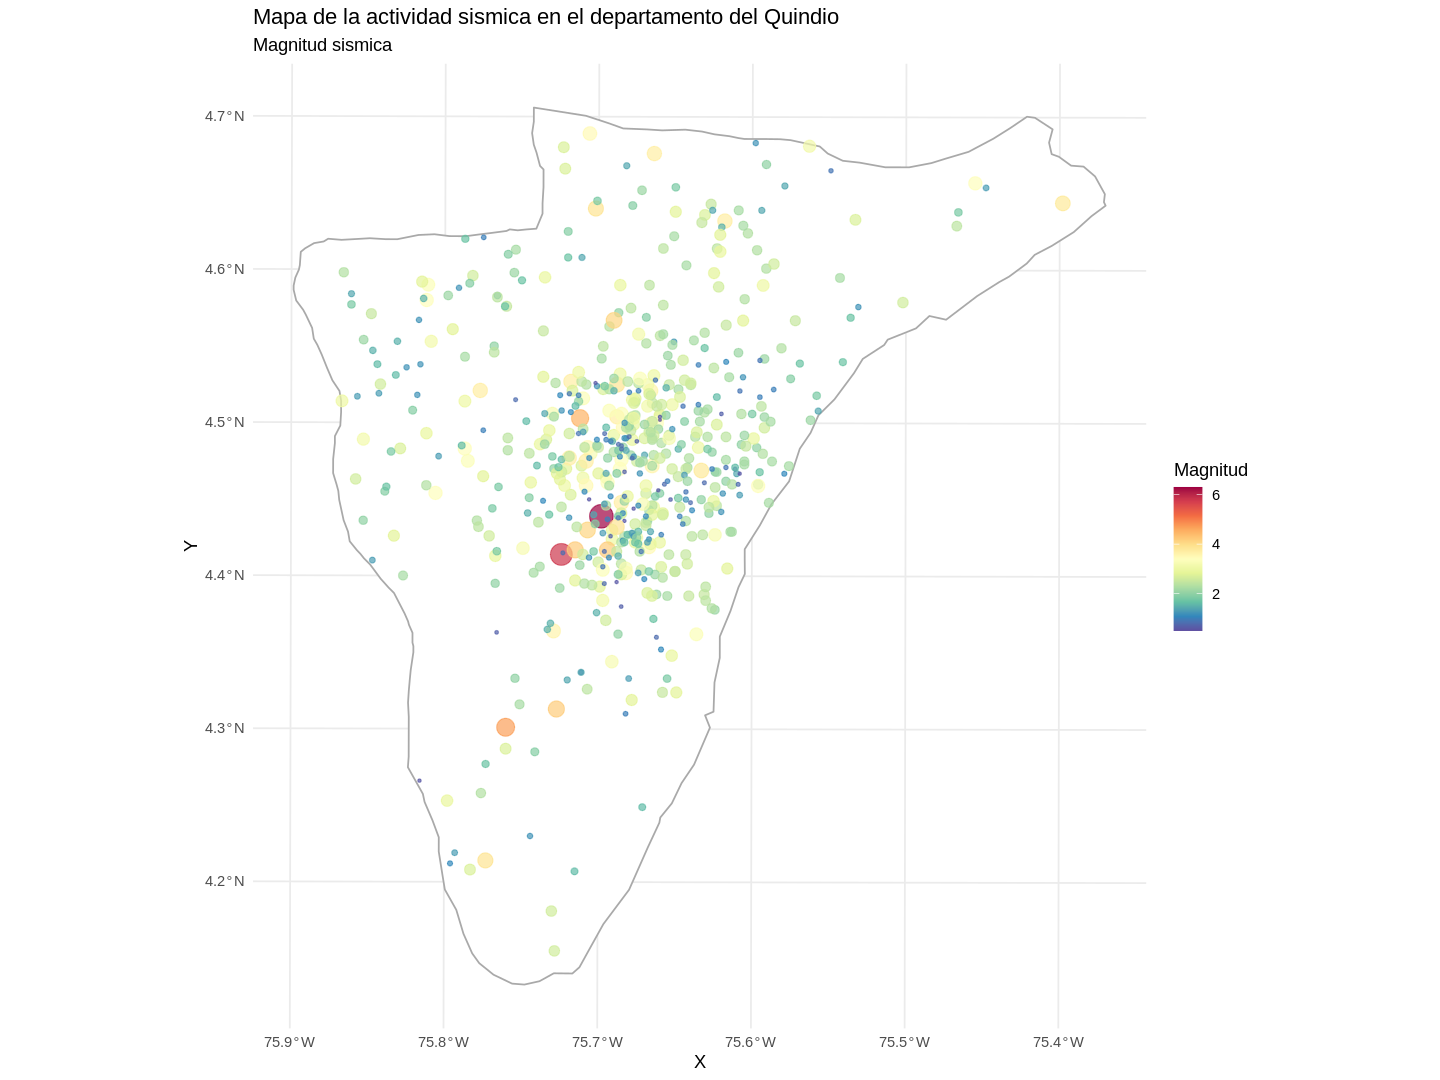

In [ ]:
hm.palette = colorRampPalette(rev(brewer.pal(11, 'Spectral')), space='Lab')
quindiodep = coldeptos %>% filter(NOMBRE_DPT == "QUINDIO")
options(repr.plot.width=12, repr.plot.height=9)
quindiodep %>% ggplot() + geom_sf(colour = "darkgray", fill = "white") + theme_minimal() + 
                            ggtitle("Mapa de la actividad sismica en el departamento del Quindio", subtitle = "Magnitud sismica") +
                            geom_point(data = bdsms_ct, aes(x = X, y = Y, color = Magnitud), alpha = 0.7, size = bdsms_ct$Magnitud) +
                            scale_colour_gradientn(colours = hm.palette(100))

Visualmente se puede inferir que los puntos poseen un patrón espacial agregado

## Mapa de la magnitud sismica por municipio

In [ ]:
colmunp = readOGR("/content/mpio.shp")
id = colmunp@data$NOMBRE_MPI
idaux = colmunp@data$NOMBRE_DPT
centroids.df = as.data.frame(coordinates(colmunp))
names(centroids.df) = c("Longitude", "Latitude") 
dfmunp = data.frame(id, idaux, centroids.df)
dfmunp = dfmunp[dfmunp$idaux == "QUINDIO",]
colmunp = st_as_sf(colmunp) 
quindiomun = colmunp %>% filter(NOMBRE_DPT == "QUINDIO")

OGR data source with driver: ESRI Shapefile 
Source: "/content/mpio.shp", layer: "mpio"
with 1122 features
It has 15 fields


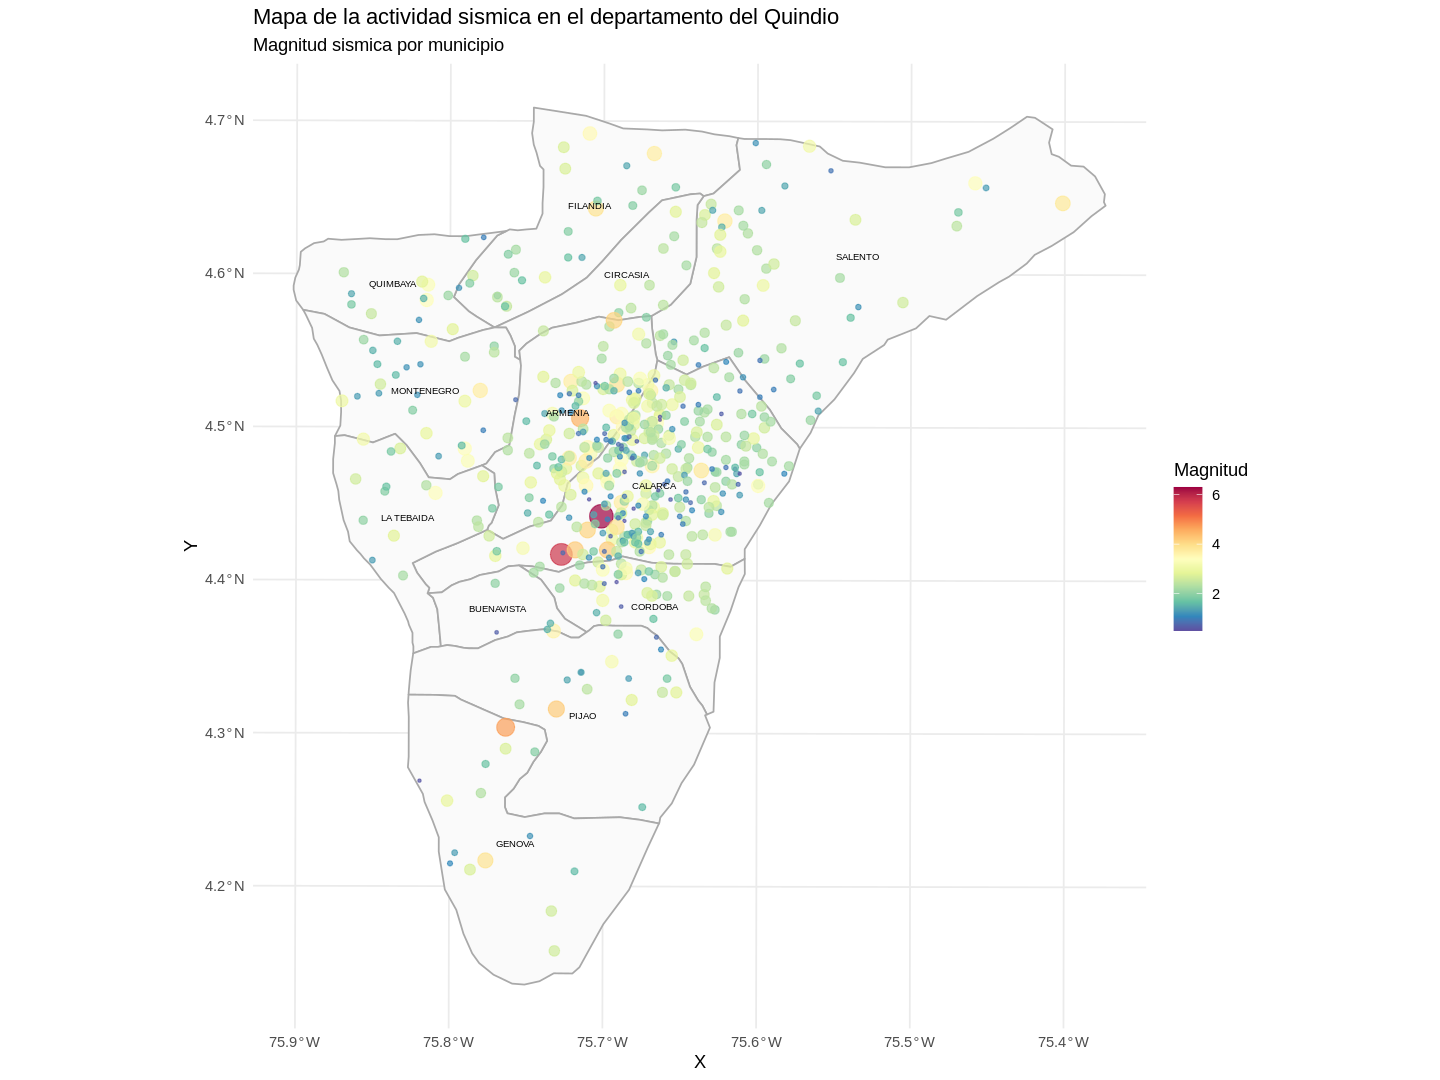

In [ ]:
quindiomun %>% ggplot() + geom_sf(colour = "darkgray", fill = "grey98") + theme_minimal() + 
                            ggtitle("Mapa de la actividad sismica en el departamento del Quindio", subtitle = "Magnitud sismica por municipio") +
                            geom_point(data = bdsms_ct, aes(x = X, y = Y, color = Magnitud), alpha = 0.7, size = bdsms_ct$Magnitud) +
                            geom_text(data = dfmunp, aes(x = Longitude, y = Latitude, label = id), size = 2, col = "black") +
                            scale_colour_gradientn(colours = hm.palette(100))

Se puede apreciar que los municipios de Armenia y Calarcá poseen la mayor frecuencia sismológica. Por otro lado, los sismos de gran magnitud han ocurrido en los mismos municipios junto con el municipio de Génova

## Mapa de la profunidad sismica 

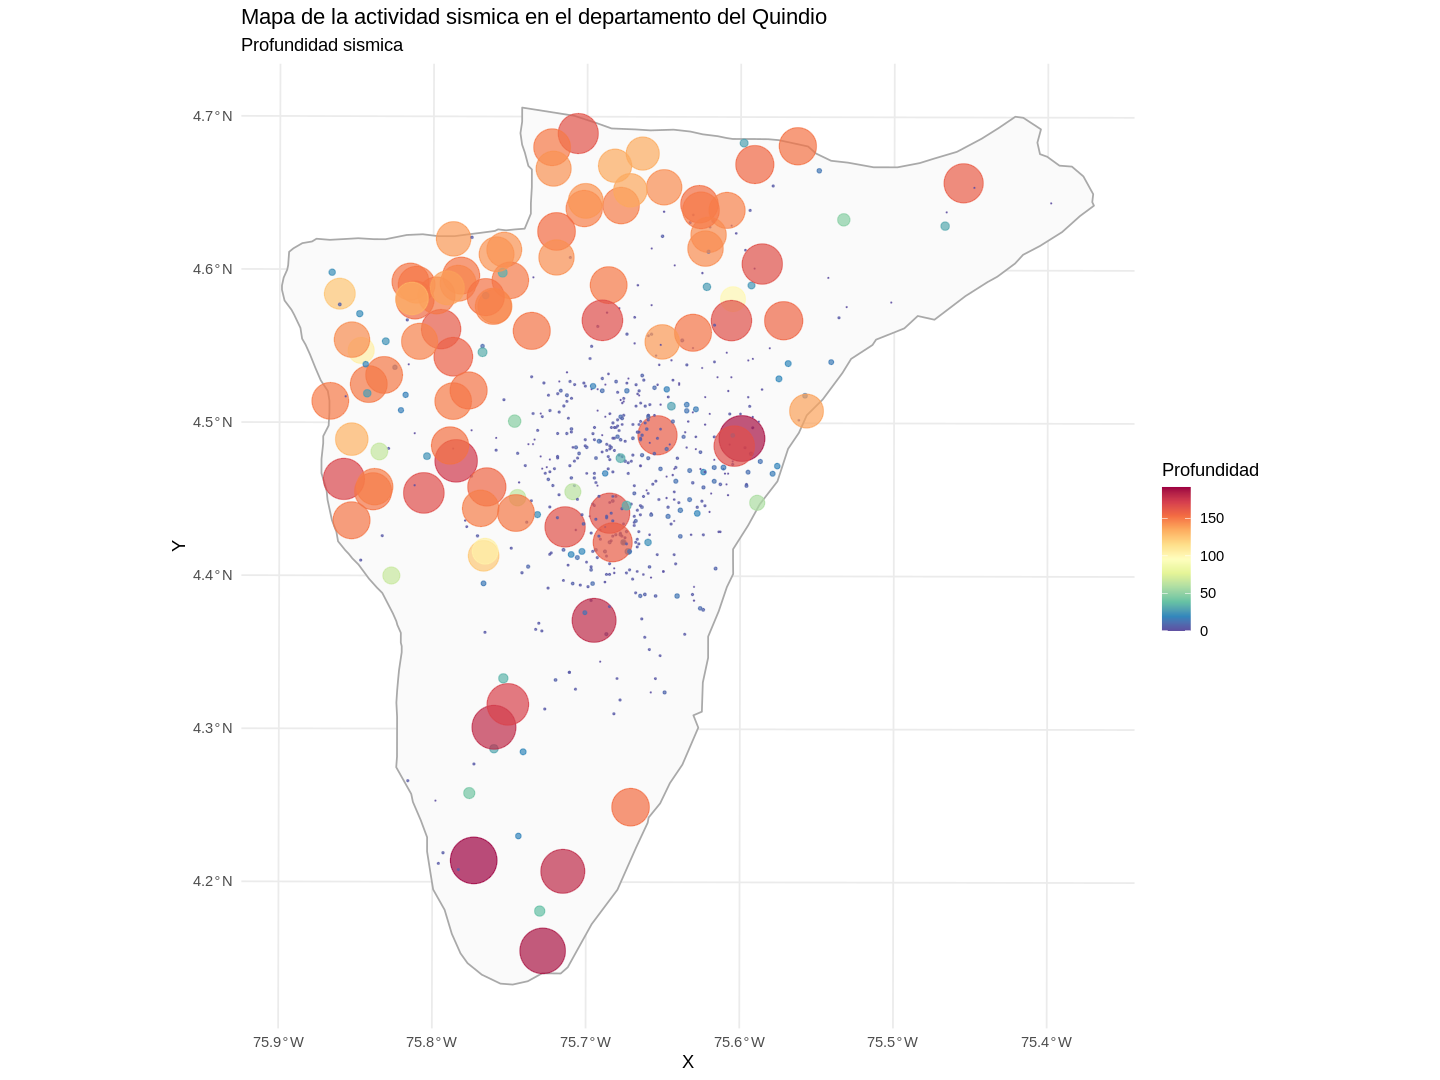

In [ ]:
colorme = c("dodgerblue4","darkolivegreen4","darkolivegreen3","navajowhite1","navajowhite2","lightsalmon1","lightsalmon2","indianred2","indianred3")
quindiodep = coldeptos %>% filter(NOMBRE_DPT == "QUINDIO")
options(repr.plot.width=12, repr.plot.height=9)
quindiodep %>% ggplot() + geom_sf(colour = "darkgray", fill = "grey98") + theme_minimal() + 
                            ggtitle("Mapa de la actividad sismica en el departamento del Quindio", subtitle = "Profundidad sismica") +
                            geom_point(data = bdsms_ct, aes(x = X, y = Y, color = Profundidad), alpha = 0.7, size = bdsms_ct$Profundidad/15) +
                            scale_colour_gradientn(colours = hm.palette(100))

A pesar de que no es claro el patrón con respecto a la profundidad, se puede ver que la parte del centro y sur del departamento han ocurrido sismos con mayor profundidad en comparación a la parte norte de Quindío.

## Mapa de la profunidad sismica por municipio

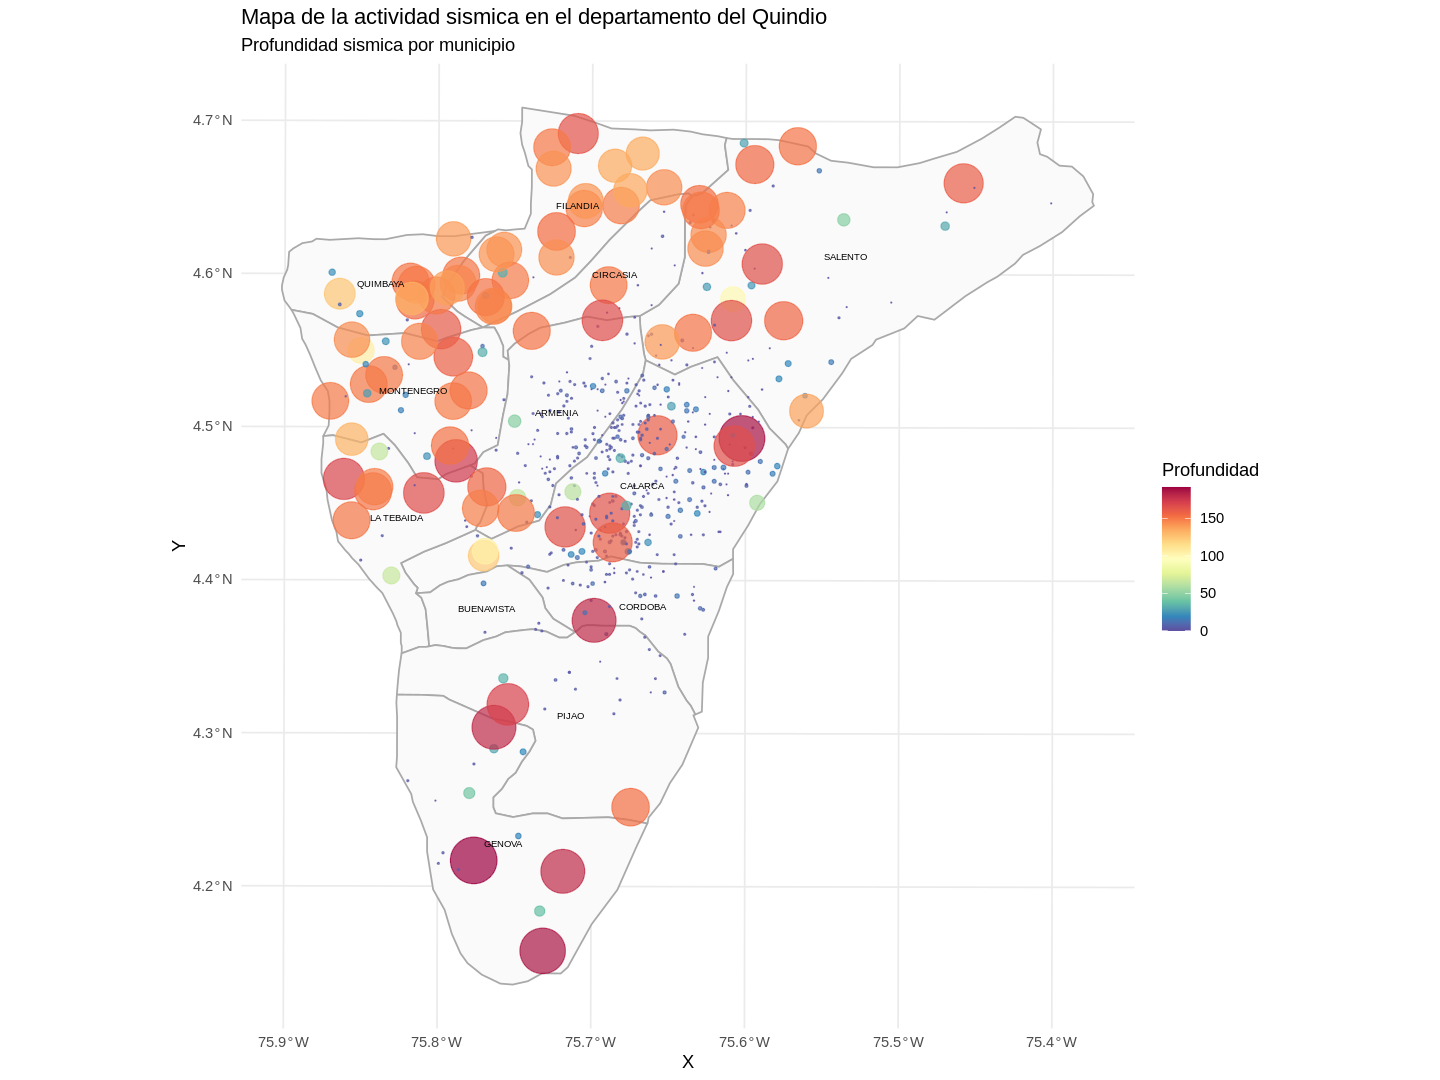

In [ ]:
quindiomun %>% ggplot() + geom_sf(colour = "darkgray", fill = "grey98") + theme_minimal() + 
                            ggtitle("Mapa de la actividad sismica en el departamento del Quindio", subtitle = "Profundidad sismica por municipio") +
                            geom_point(data = bdsms_ct, aes(x = X, y = Y, color = Profundidad), alpha = 0.7, size = bdsms_ct$Profundidad/15) +
                            geom_text(data = dfmunp, aes(x = Longitude, y = Latitude, label = id), size = 2, col = "black") +
                            scale_colour_gradientn(colours = hm.palette(100))

Es claro que los municipios de Génova, Pijao, Córdoba, Calarcá y la Tebaida presentan los sismos con mayor profundidad

## Mapa de fallas geologicas del departamento de quindio

Descripcion de fallas geologicas

In [ ]:
colfallas = readOGR("/content/fallas_geológicas.shp")
colfallas = st_as_sf(colfallas)

OGR data source with driver: ESRI Shapefile 
Source: "/content/fallas_geológicas.shp", layer: "fallas_geológicas"
with 4866 features
It has 6 fields


Warning message:
“Removed 29 rows containing missing values (geom_point).”


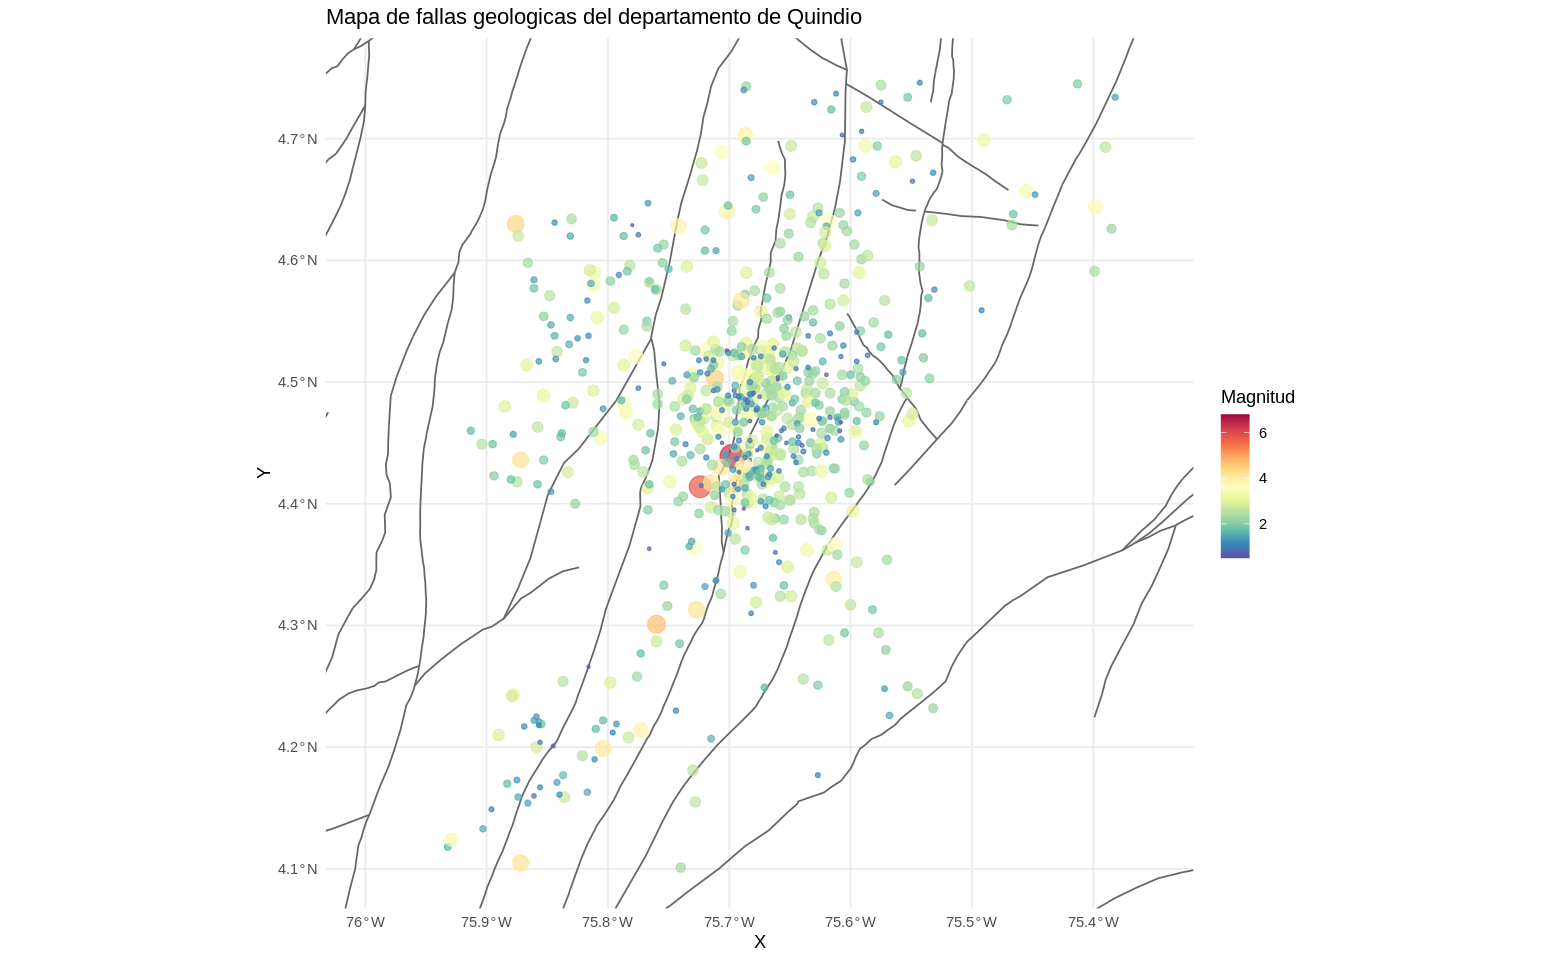

In [ ]:
options(repr.plot.width=13, repr.plot.height=8)
colfallas %>% ggplot() + geom_sf(colour = "gray40") + theme_minimal() + 
                            ggtitle("Mapa de fallas geologicas del departamento de Quindio") +
                            geom_point(data = bdsms_gd_df, aes(x = X, y = Y, color = Magnitud), alpha = 0.7, size = bdsms_gd_df$Magnitud) +
                            xlim(c(-76, -75.35)) + ylim(c(4.1, 4.75)) +
                            scale_colour_gradientn(colours = hm.palette(100))

# Intensidad por municipios

In [ ]:
intensity.munip = data.frame(Municipio = c(), Numero = c())  
for(i in quindiomun$NOMBRE_MPI){  
  sub.pol = quindiomun[quindiomun$NOMBRE_MPI == i,]
  sub.ppp = ppp(x = bdsms_ct$X, y = bdsms_ct$Y, window = as.owin(sub.pol)) #pegar informacion con respecto a la ventana (window)
  intensity.munip = rbind(intensity.munip,
                    data.frame(Municipio = factor(i, levels = quindiomun$NOMBRE_MPI),
                               Numero = as.numeric(sub.ppp$n)))} #numero de sismos por municipio

Warning message:
“569 points were rejected as lying outside the specified window”
Warning message:
“532 points were rejected as lying outside the specified window”
Warning message:
“584 points were rejected as lying outside the specified window”
Warning message:
“581 points were rejected as lying outside the specified window”
Warning message:
“566 points were rejected as lying outside the specified window”
Warning message:
“503 points were rejected as lying outside the specified window”
Warning message:
“327 points were rejected as lying outside the specified window”
Warning message:
“data contain duplicated points”
Warning message:
“579 points were rejected as lying outside the specified window”
Warning message:
“550 points were rejected as lying outside the specified window”
Warning message:
“data contain duplicated points”
Warning message:
“590 points were rejected as lying outside the specified window”
Warning message:
“574 points were rejected as lying outside the specified window

Se asume que los municipios son grupos homogeneos, luego se obtiene la intensidad de la siguiente forma: 

Sea $n$ el número puntos en $D_s$ y sea $m(D_s)$ el área. Entonces, la intensidad se define como: 

$$
\lambda = \frac{n}{
m(D_s)}
$$

In [ ]:
#intensidad sin reescalar porque la unidad mas grande utilizada en Colombia son los km's
intensity.munip$Numero = intensity.munip$Numero/quindiomun$AREA #area en kilometros (cuadrados)
quindiosms = quindiomun %>% mutate(Intensidad = intensity.munip$Numero)

## Mapa de intensidad

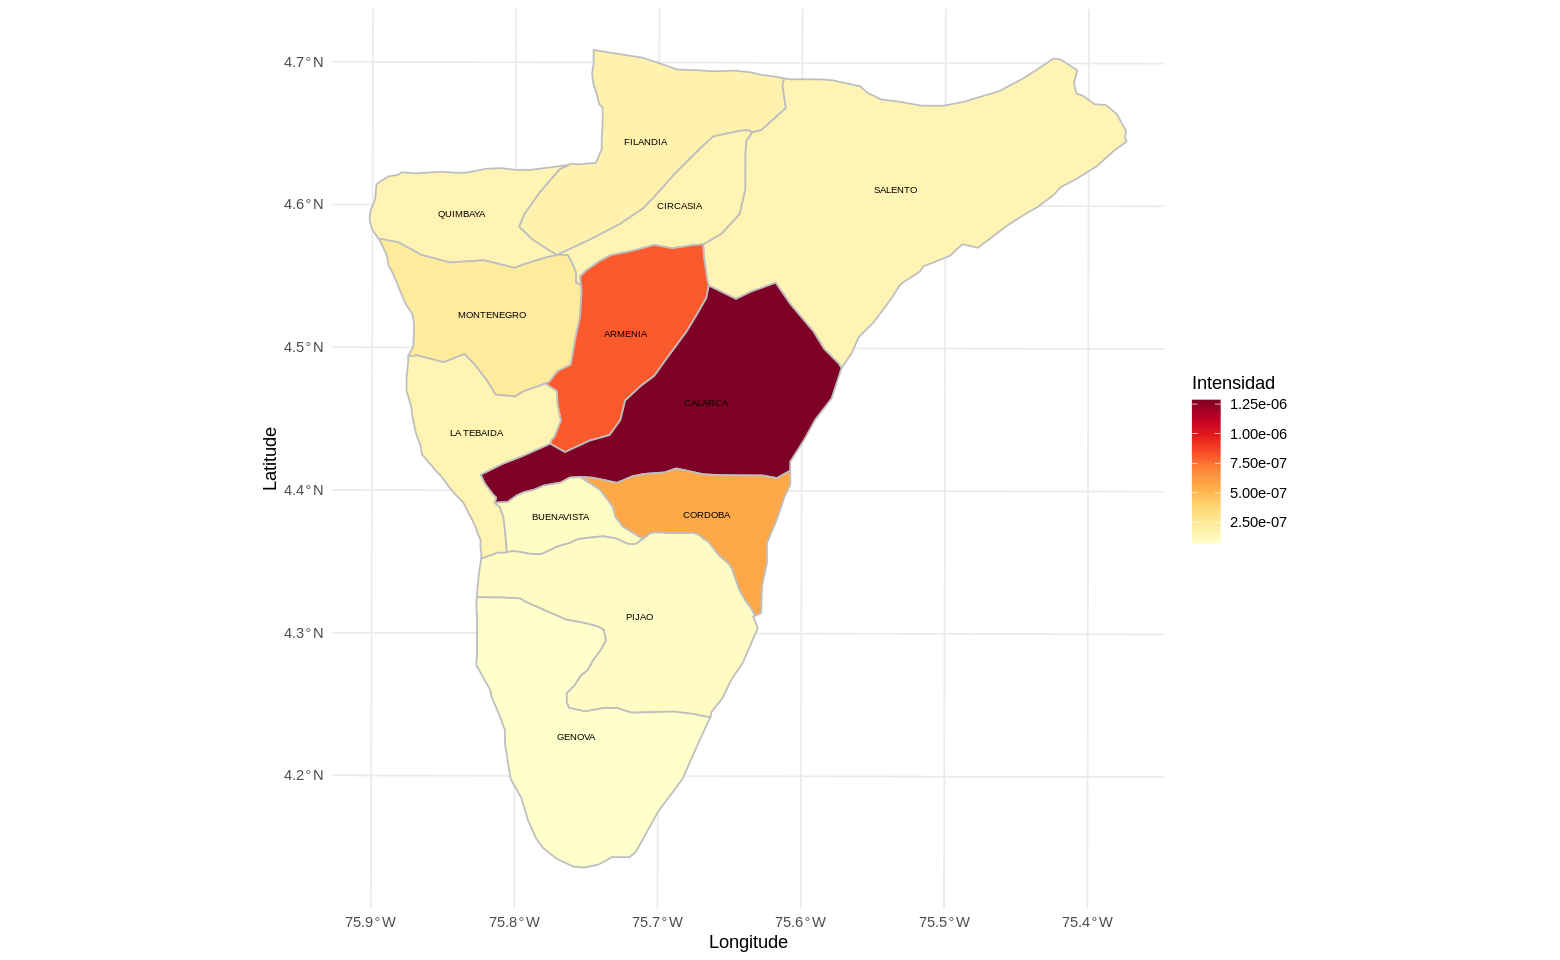

In [ ]:
hm.palette_1 = colorRampPalette(rev(brewer.pal(9, 'YlOrRd')), space='Lab')
ggplot(quindiosms) + geom_sf(aes(fill = Intensidad), col = "gray") + theme_minimal() + 
                     scale_fill_gradientn(colours = rev(hm.palette_1(100))) +
                     geom_text(data = dfmunp, aes(x = Longitude, y = Latitude, label = id), size = 2, col = "black")

## Barplot de intensidad

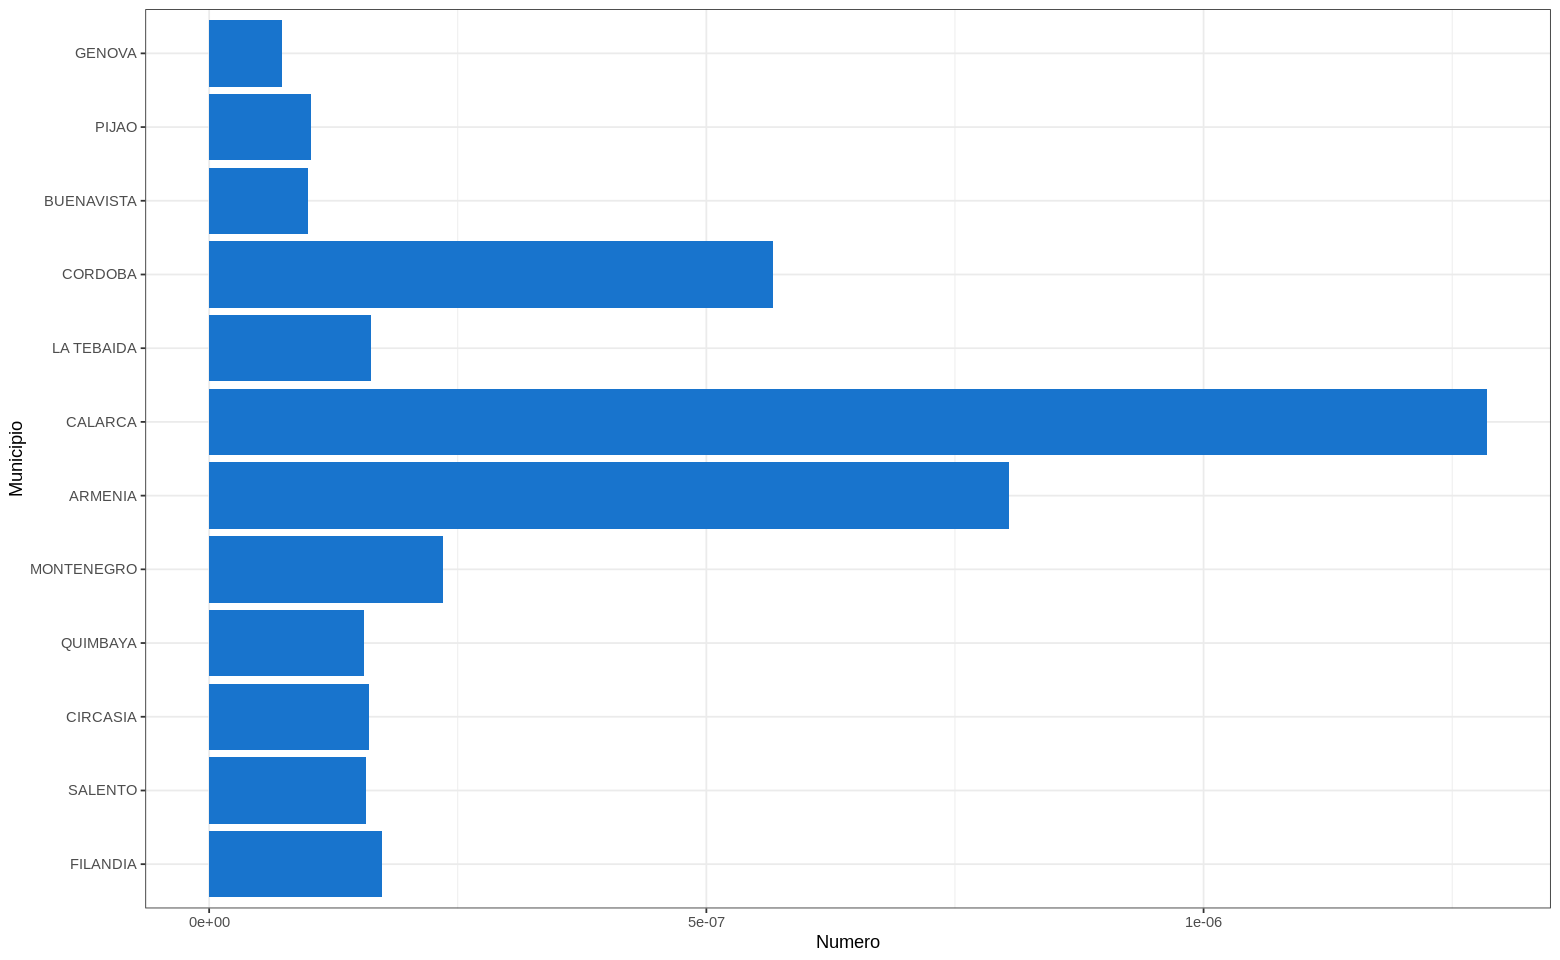

In [ ]:
intensity.munip.od = intensity.munip[intensity.munip$Numero != 0, ]  
ggplot(data=intensity.munip.od, aes(x = Numero, y = Municipio)) + theme_bw() + 
                                geom_bar(stat="identity", fill = "dodgerblue3") 

De los anteriores gráficos, se puede concluir que los municipios que presentan la mayor intensidad sísmica son Calarcá, Córdoba, y Armenia.  Sin embargo esta información es puramente descriptiva, tiene más utilidad tomar cuadrantes o teselados. 

Ahora se calcula la estimacion del error estandar para la intensidad estimada por municipio

In [ ]:
sqrt(intensity.munip$Numero/quindiomun$AREA)

[1] 3.484820e-08 2.003741e-08 5.074274e-08 4.322712e-08 4.440651e-08
 [6] 8.434348e-08 7.863982e-08 4.197432e-08 8.547873e-08 4.981969e-08
[11] 2.300187e-08 1.885912e-08

# Intensidad por cuadrantes


In [ ]:
window = as.owin(quindiomun)
bdsms_ppp = ppp(x = bdsms_ct$X,y = bdsms_ct$Y, window = window)
Q = quadratcount(bdsms_ppp, nx = 5, ny = 4, method="Chisq")

Warning message:
“data contain duplicated points”


In [ ]:
summary(Q)

Number of cases in table: 594 
Number of factors: 1 

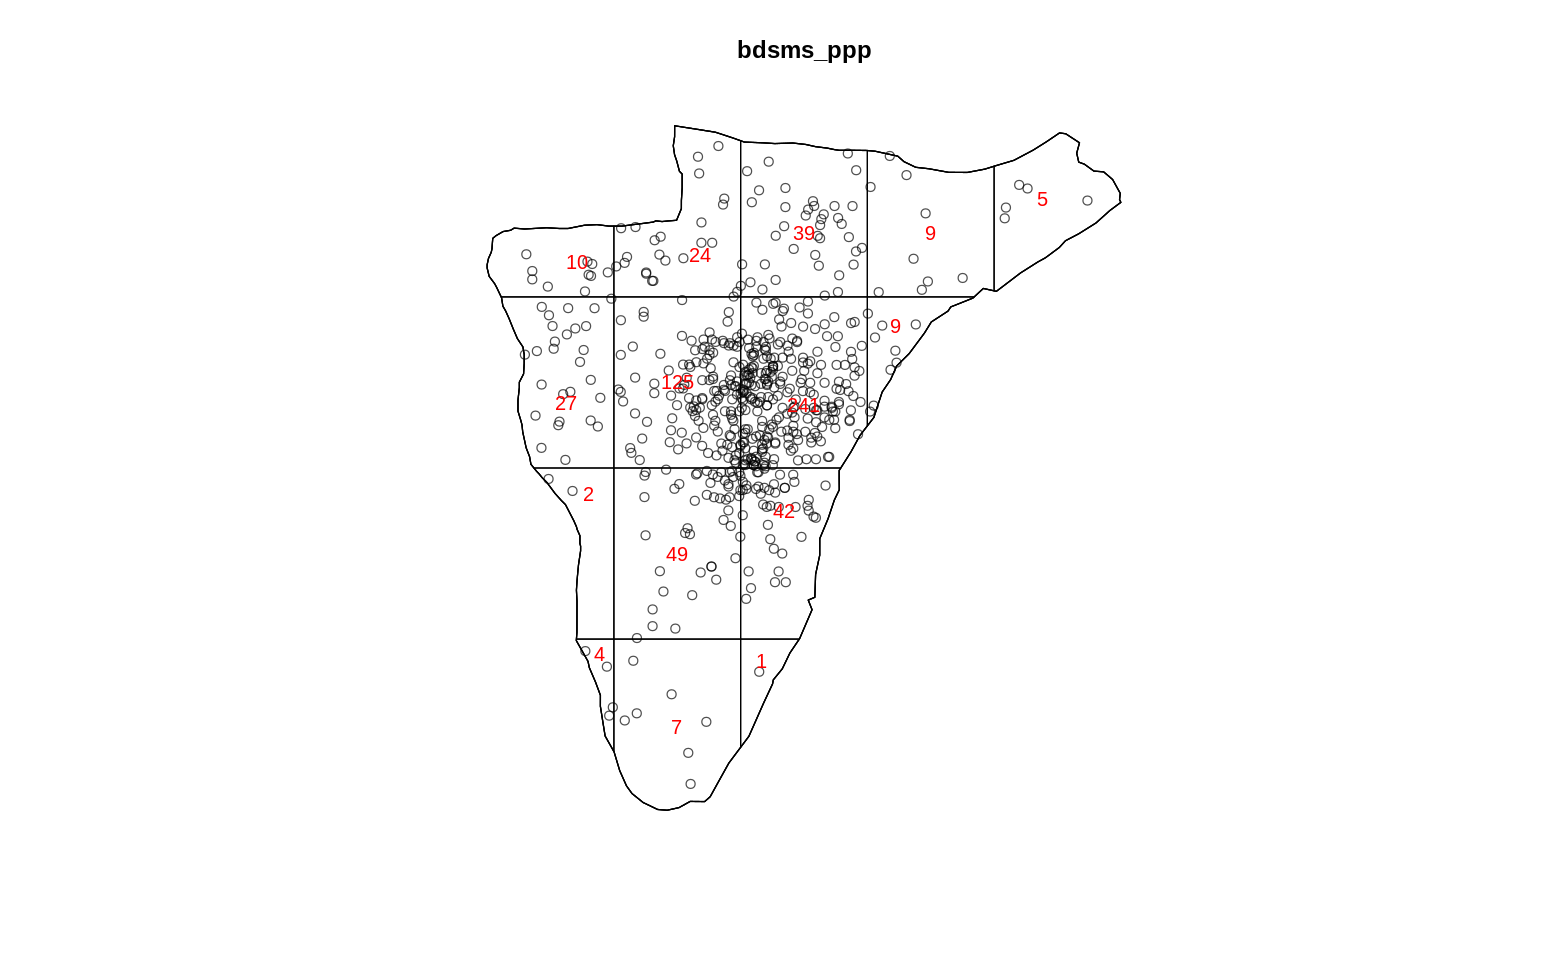

In [ ]:
options(repr.plot.width=13, repr.plot.height=8)
plot(bdsms_ppp)
plot(Q, add=TRUE, col = "Red") 

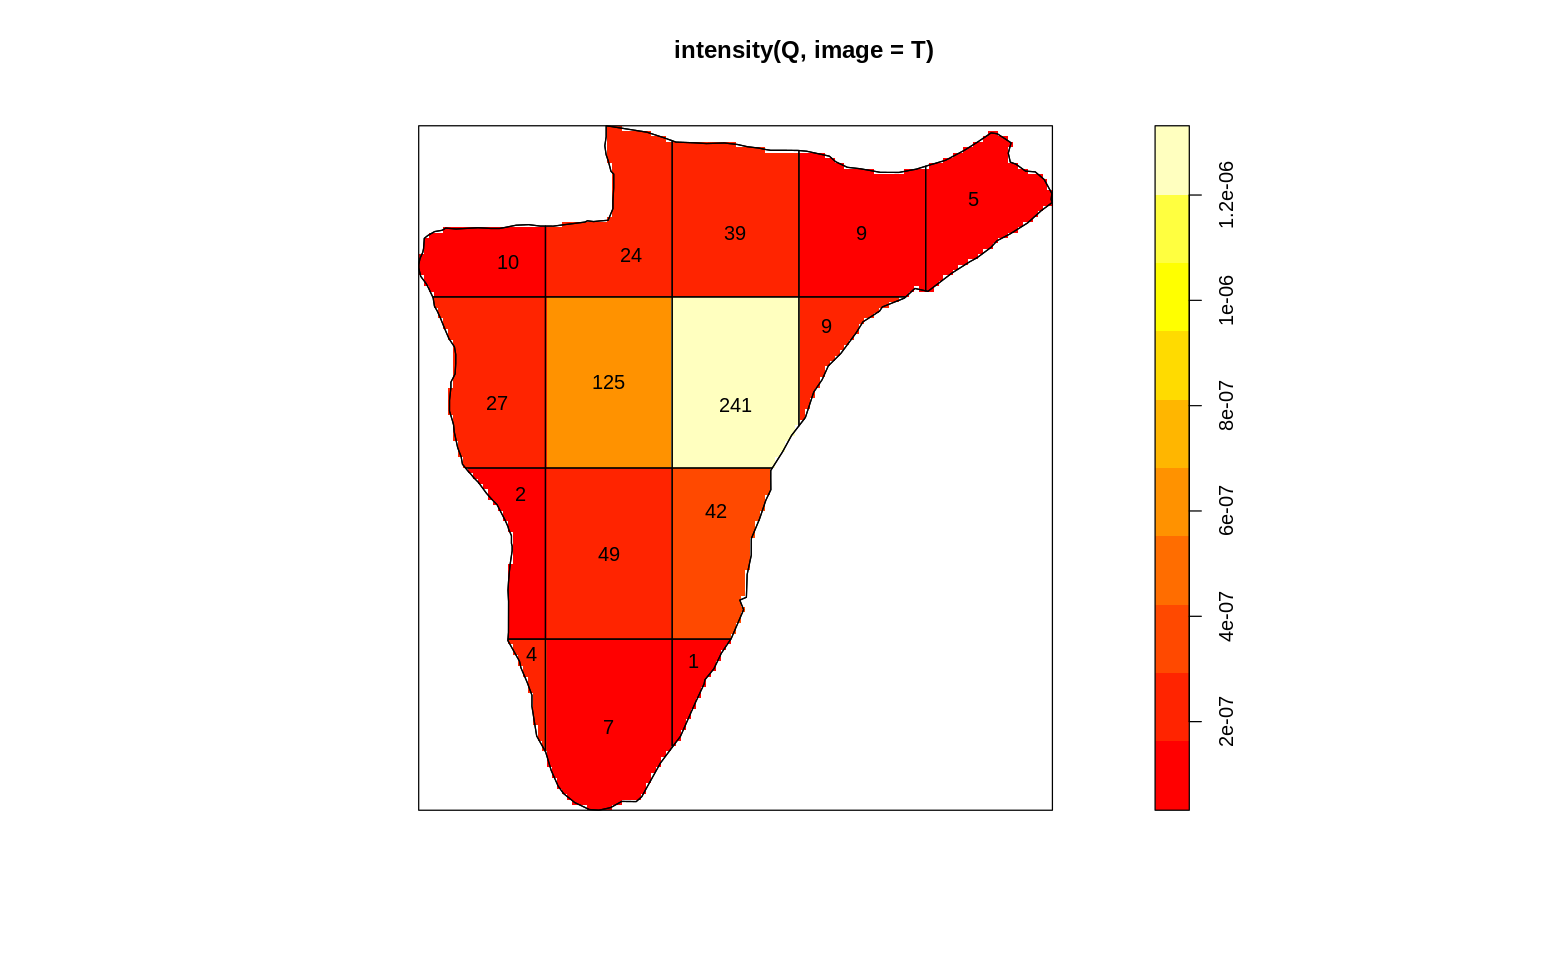

In [ ]:
plot(intensity(Q, image = T ), col = heat.colors(10))
plot(Q, add = T)

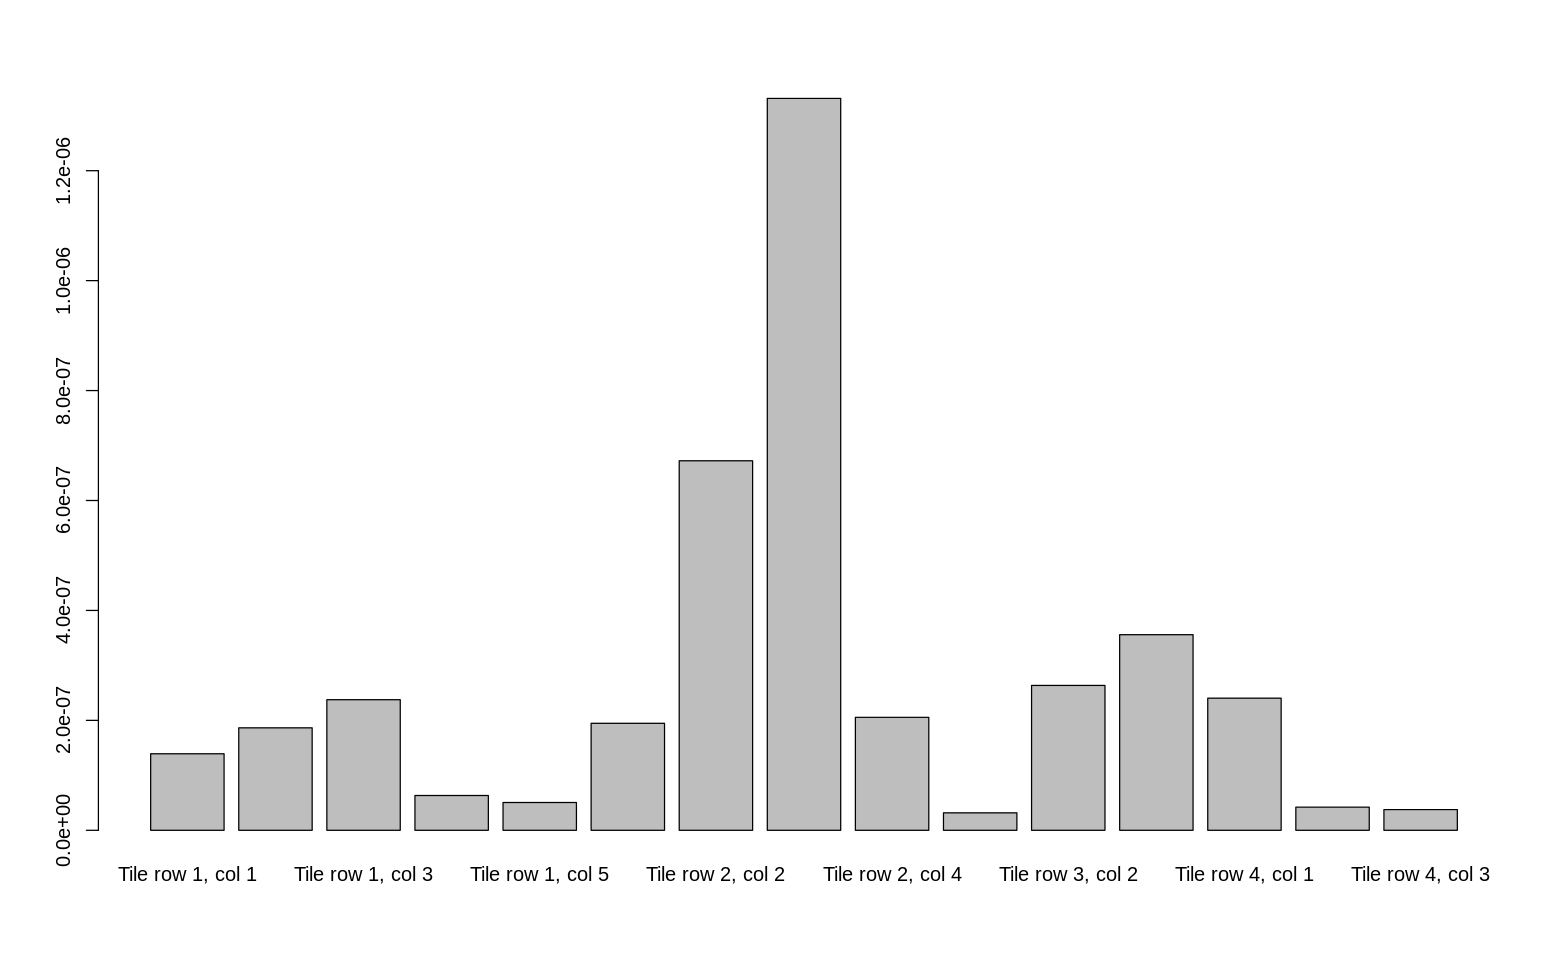

In [ ]:
intensity.q = intensity(Q)
barplot(intensity.q)

Del analisis anterior, se puede destacar que los cuadrantes $Q_{2,2}$ y $Q_{2,3}$ presentan la mayor intensidad, es decir, la intensidad es superior en el centro del departamento.

La estimacion del error estandar para la intensidad estimada por cuadrante

In [ ]:
sqrt(intensity.q/area(Window(Q)))

tile
Tile row 1, col 1 Tile row 1, col 2 Tile row 1, col 3 Tile row 1, col 4 
     8.964998e-09      1.037366e-08      1.171188e-08      6.042961e-09 
Tile row 1, col 5 Tile row 2, col 1 Tile row 2, col 2 Tile row 2, col 3 
     5.400362e-09      1.059975e-08      1.970044e-08      2.772639e-08 
Tile row 2, col 4 Tile row 3, col 1 Tile row 3, col 2 Tile row 3, col 3 
     1.089221e-08      4.279799e-09      1.233443e-08      1.433383e-08 
Tile row 4, col 1 Tile row 4, col 2 Tile row 4, col 3 
     1.177929e-08      4.930581e-09      4.660068e-09 

# Analisis basado en densidad



Si el proceso puntual tiene una funcion de intensidad $\lambda$(u), esta se puede estimar con metodos no parametricos con la estimación kernel donde la siguiente expresión representa la correción del sesgo por el efecto de los bordes.

$$
e(u) =\int_W k(u−v)dv
$$

para el kernel uniformemente corregido 

$$
\hat \lambda^{(U)}(u)= \frac{1}{e(u)} \sum^n_{i=1} k(u−x_i)
$$

La desviación estandar del kernel es el ancho de banda de suavidad, entre mas largo más suave es el kernel. El ancho de banda se especifica con **sigma**, cuyo valor por defecto es igual a 1/8 del lado más corto del rectangulo en que se encuentra (circundante)


Utiliza la validación cruzada de verosimilitud para seleccionar un ancho de banda de suavizado para la estimación del kernel de la intensidad del proceso puntual.

   sigma 
2442.385 


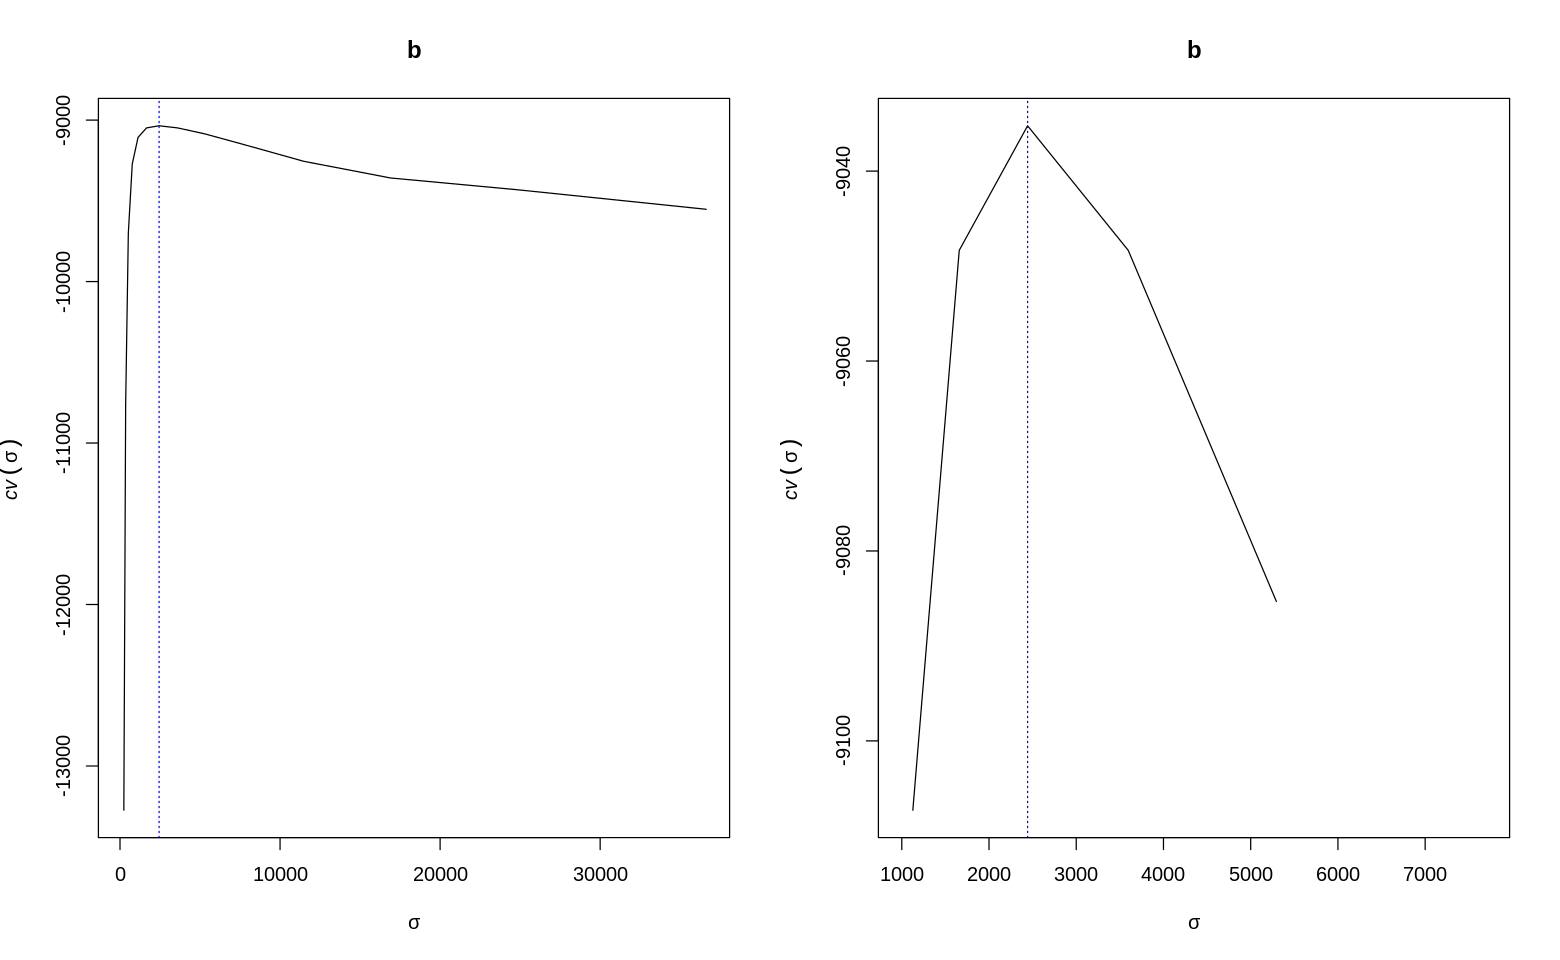

In [ ]:
b=bw.ppl(bdsms_ppp) 
print(b)
par(mfrow=c(1,2)) 
plot(b)
plot(b, xlim=c(1000,7700))

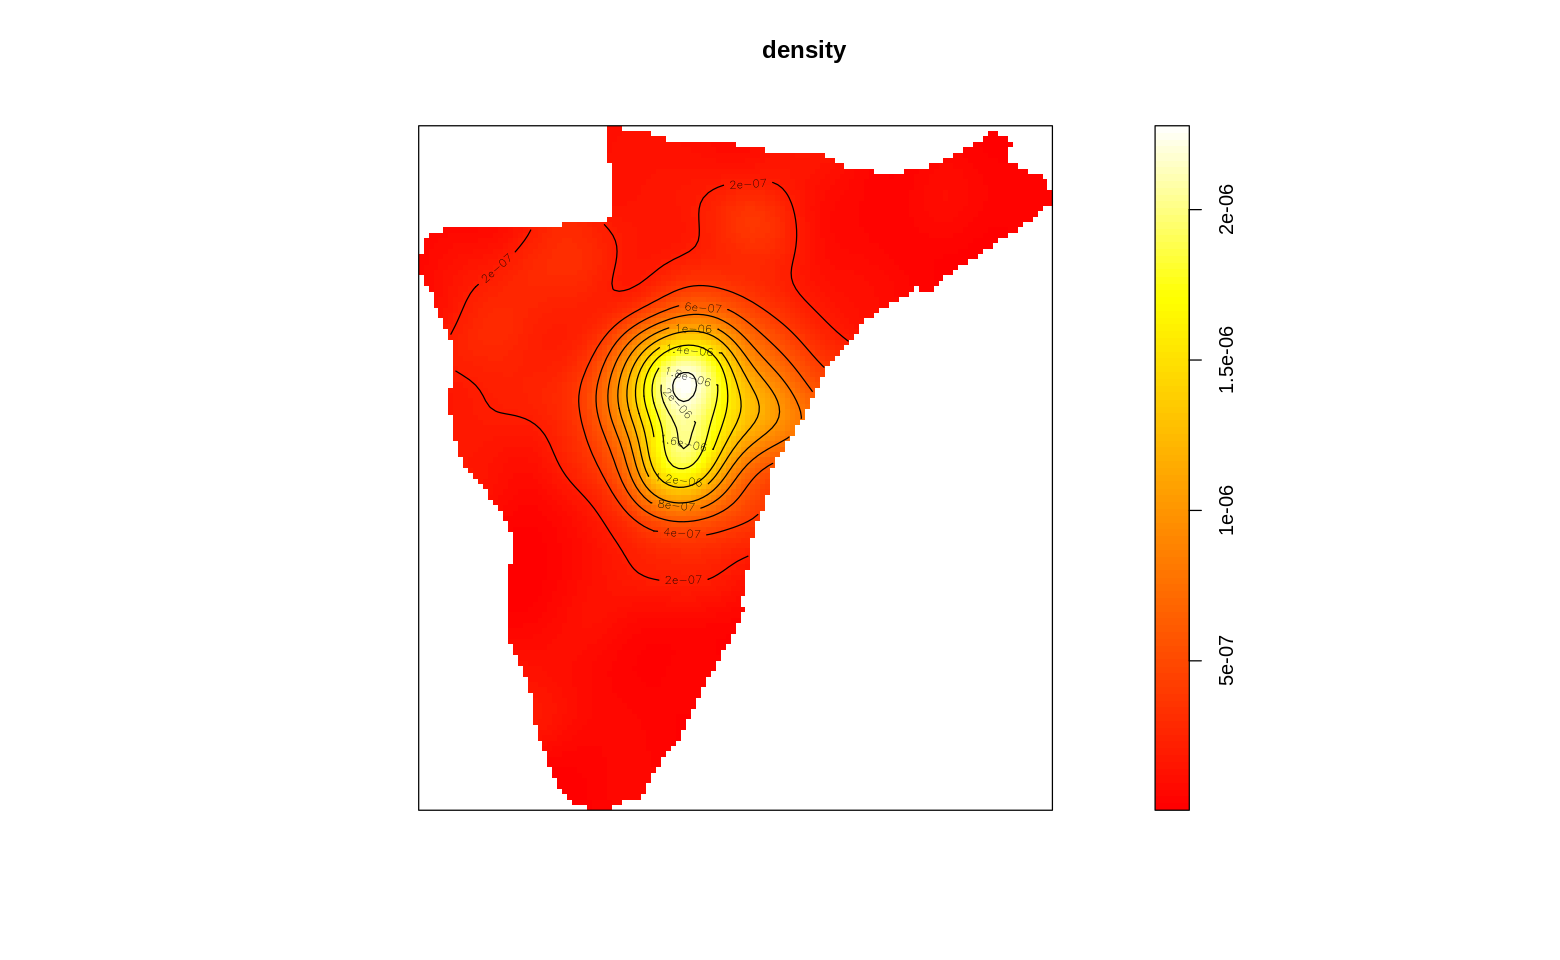

In [ ]:
ds = density(bdsms_ppp, sigma = 2442.385) 
plot(ds, main = 'density', col = heat.colors(100))
contour(ds, add = TRUE)

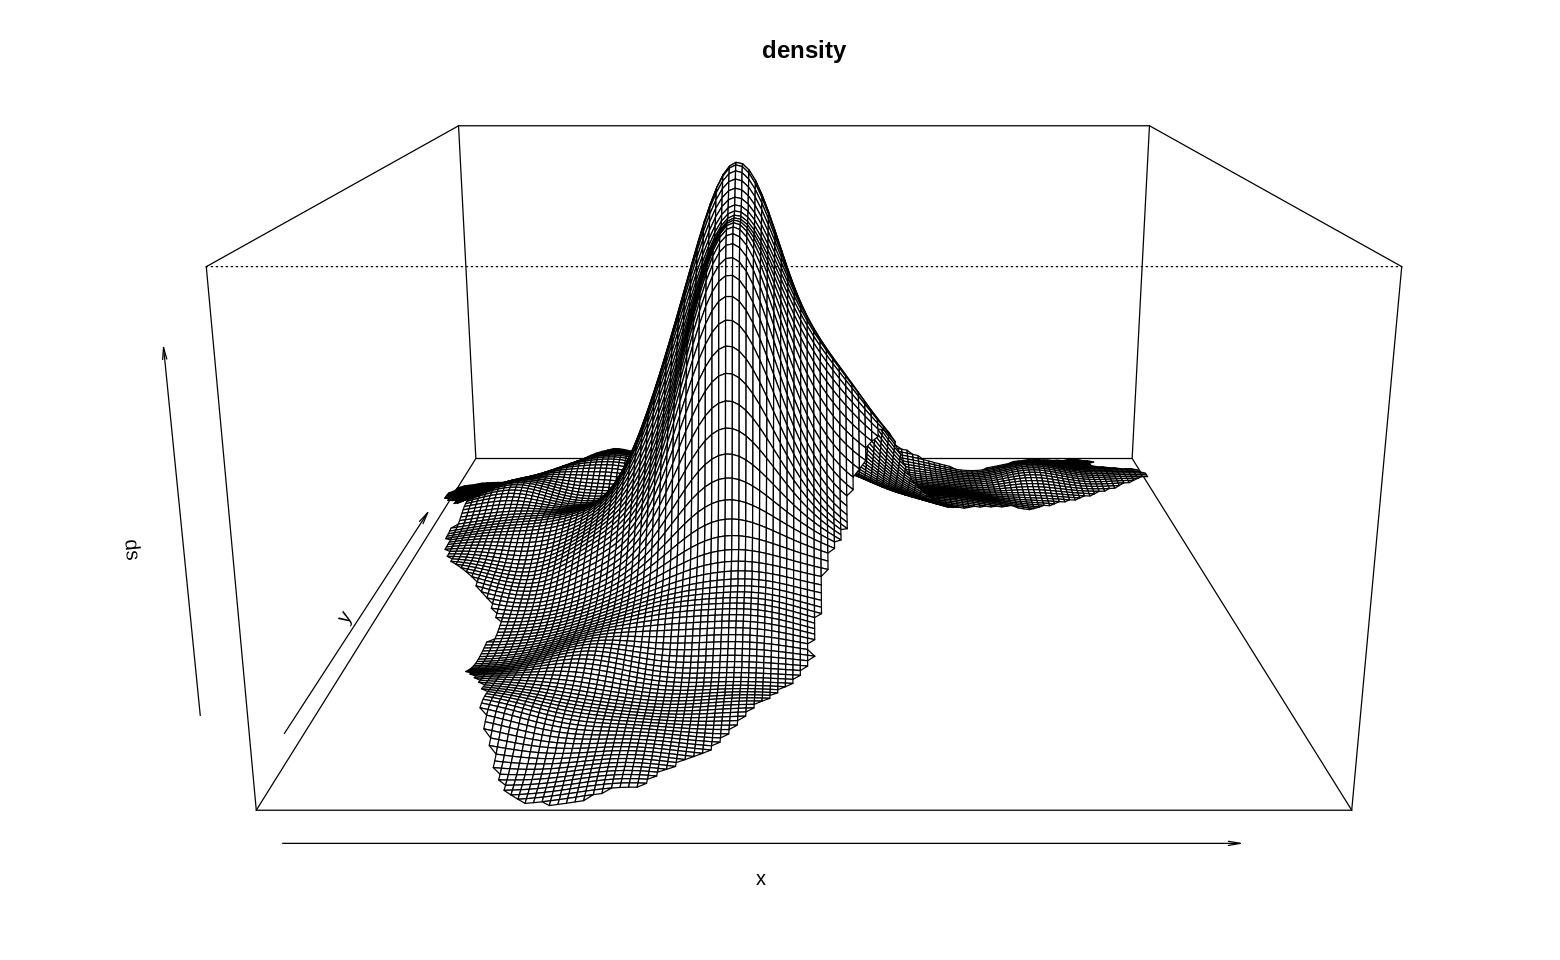

In [ ]:
persp(ds, main = "density")

De los gráficos anteriores vemos que un ancho de banda mayor a 2000 kilometros podría ser adecuado, más particularmente seria util tomar un ancho de banda entre 1000 y 6000 kilometros

## El algoritmo de diggle

El algoritmo de diggle, elige automaticamente el ancho de banda que minimiza el error cuadrático medio. El kernel de Diggle es

$$
\hat \lambda^{(U)}(u)= \sum^n_{i=1} \frac{1}{e(x_i)} k(u−x_i)
$$

con

$$
e(x_i) =\int_W k(x_i−v)dv
$$


Utiliza la validación cruzada para seleccionar un ancho de banda de suavizado para la estimación del kernel de la intensidad del proceso puntual.

In [ ]:
opt_bw = bw.diggle(bdsms_ppp) 
print(opt_bw)
opt_ds = density(bdsms_ppp, sigma=opt_bw)

   sigma 
1392.374 


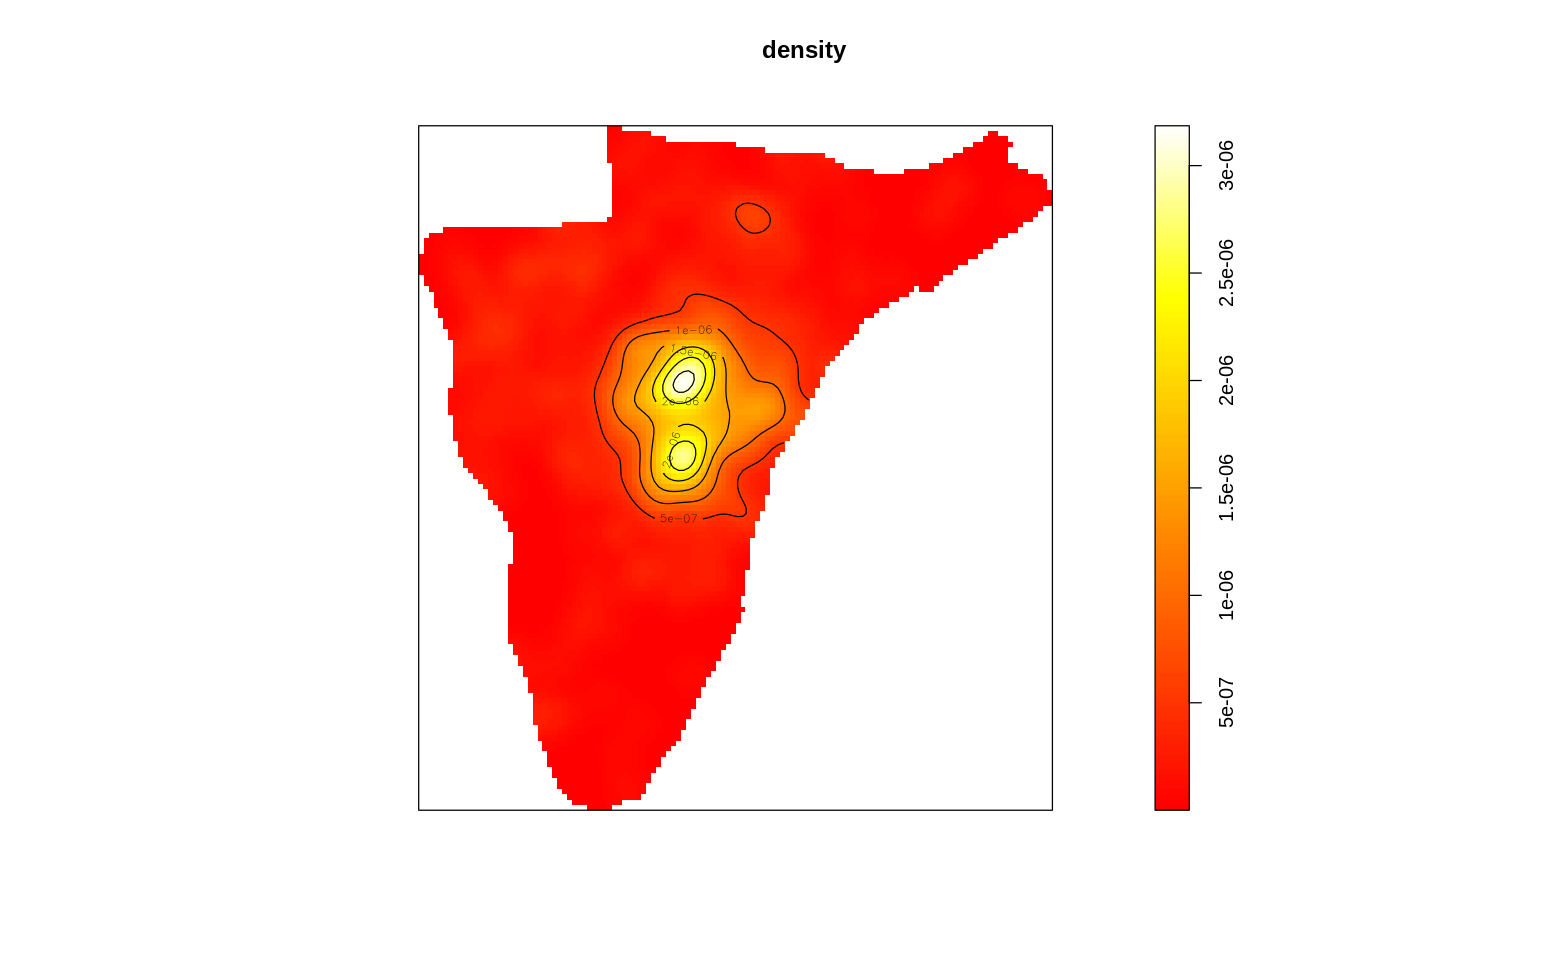

In [ ]:
plot(opt_ds, Add=TRUE, main='density', col = heat.colors(100))
contour(opt_ds, add = TRUE)

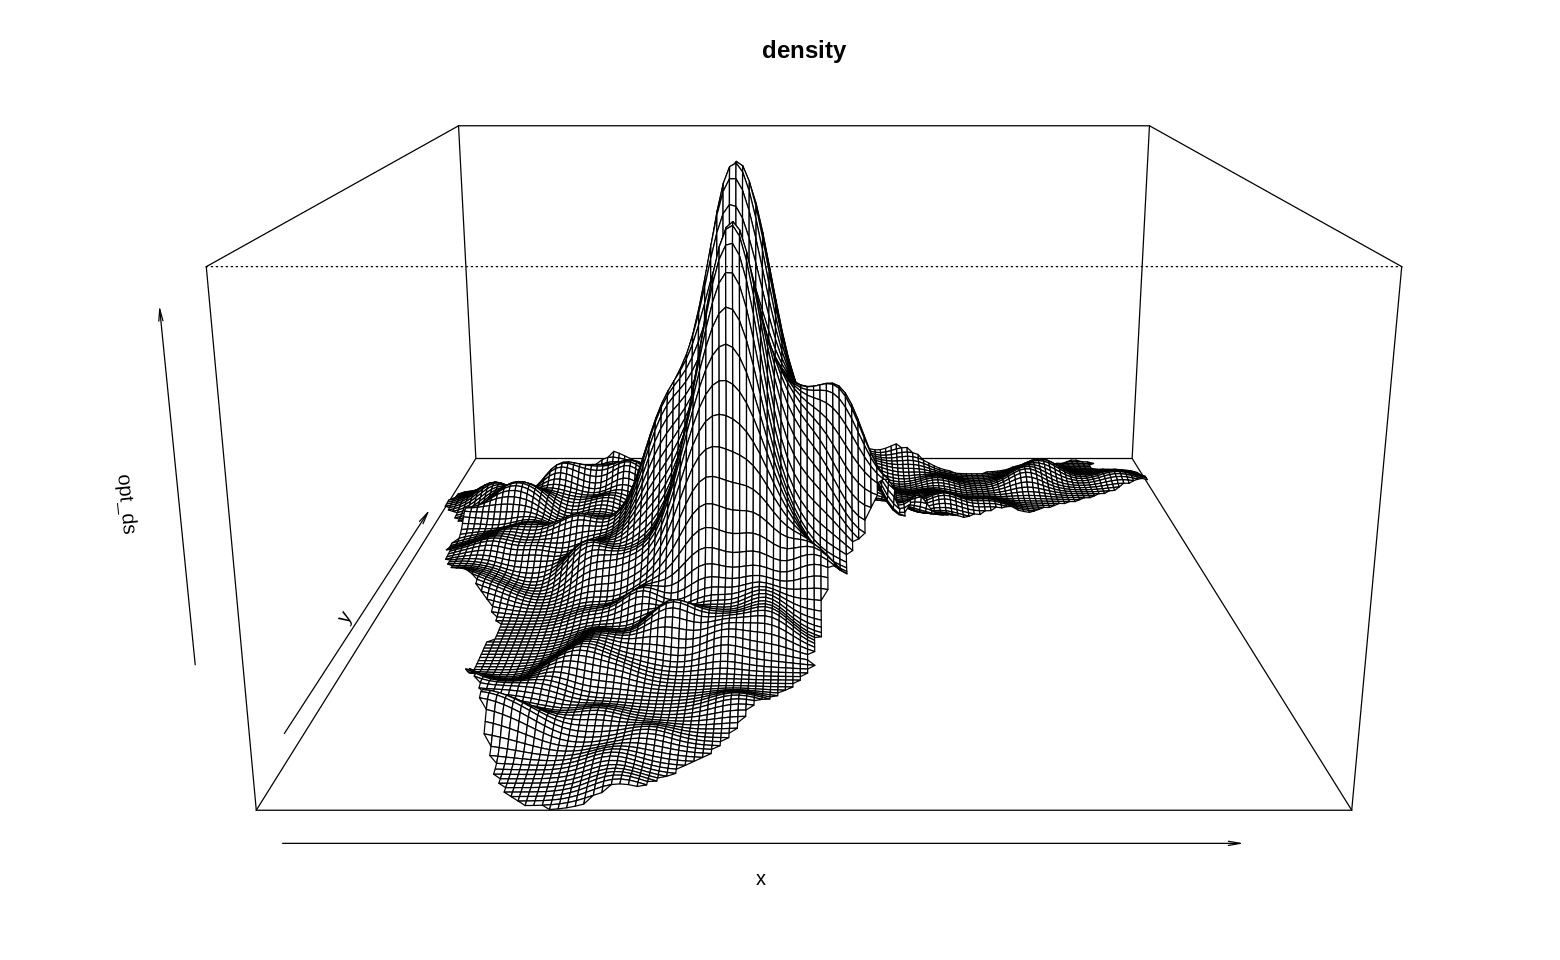

In [ ]:
persp(opt_ds, main = "density")

Desviacion estandar, podemos ver que es más oscura en la parte inferior y superior derecha

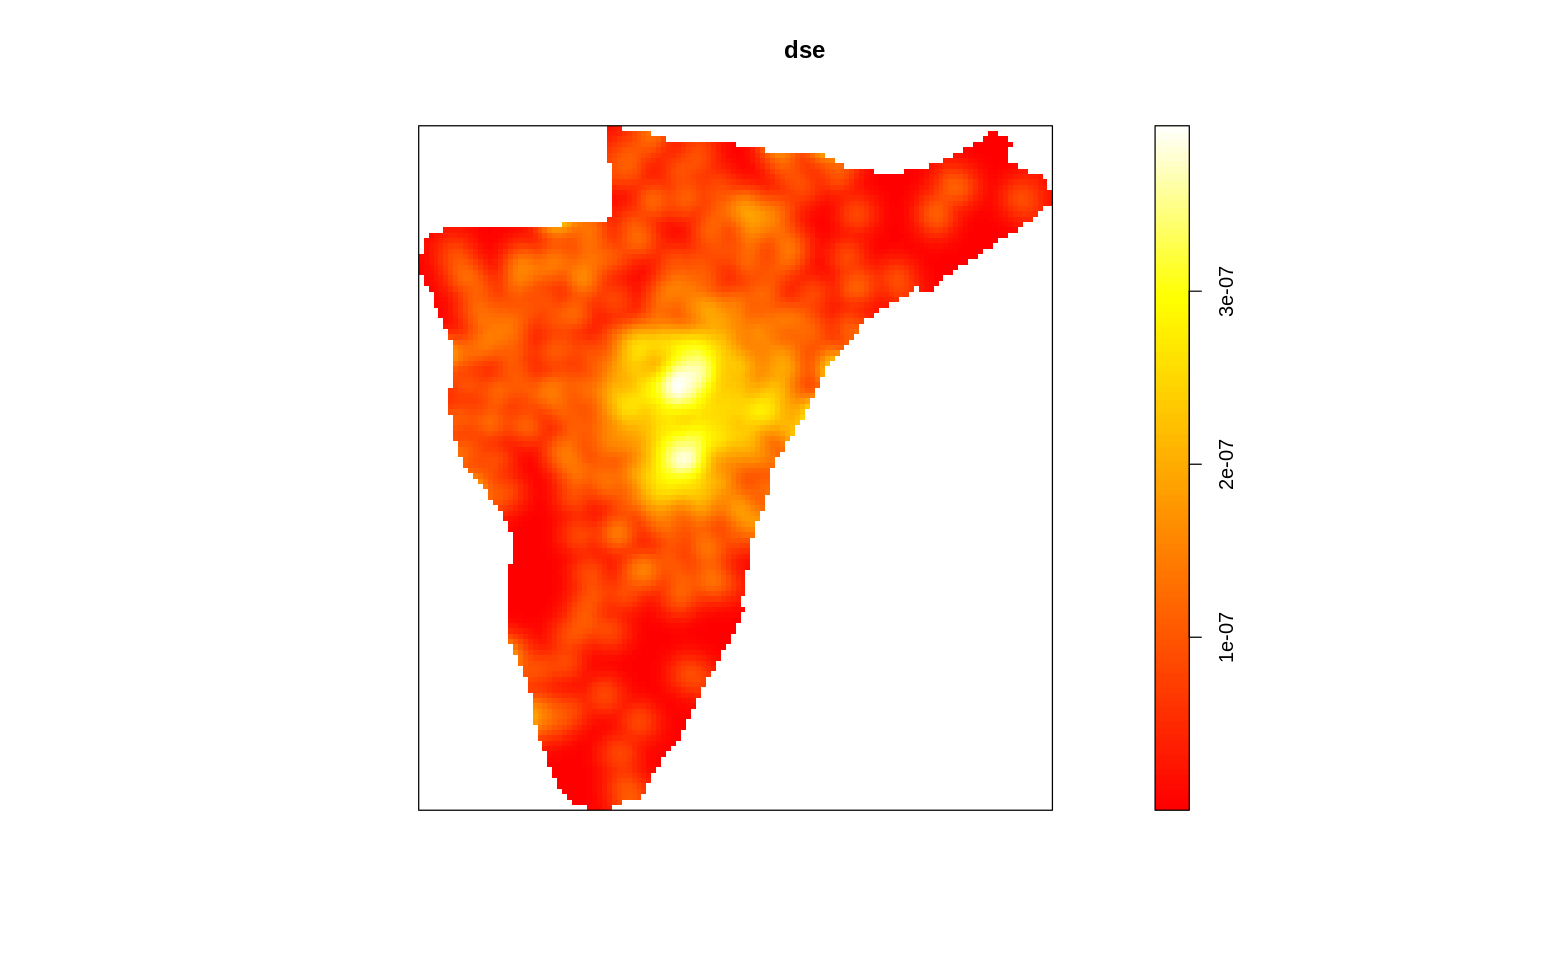

In [ ]:
dse = density(bdsms_ppp, sigma=opt_bw, se=TRUE)$SE
plot(dse, col = heat.colors(100))

# Pruebas de homogeneidad 

Las caracterı́sticas de un proceso puntual se resumen utilizando dos tipos de medidas:

- Estadísticas de primer orden, que se refiere a la media del proceso

- La estadística de segundo orden, que describe la correlación espacial


## Prueba chi cuadrado

El p-valor es apenas mayor que cero, así que rechazamos la hipótesis nula de que la intensidad sea igual para todos los cuadrantes. En el gráfico se ve a la izquierda el conteo de las observaciones, a la derecha el valor esperado de conteo y en el medio los residuales de pearson.


	Chi-squared test of CSR using quadrat counts

data:  bdsms_ppp
X2 = 739.1, df = 14, p-value < 2.2e-16
alternative hypothesis: two.sided

Quadrats: 15 tiles (irregular windows)

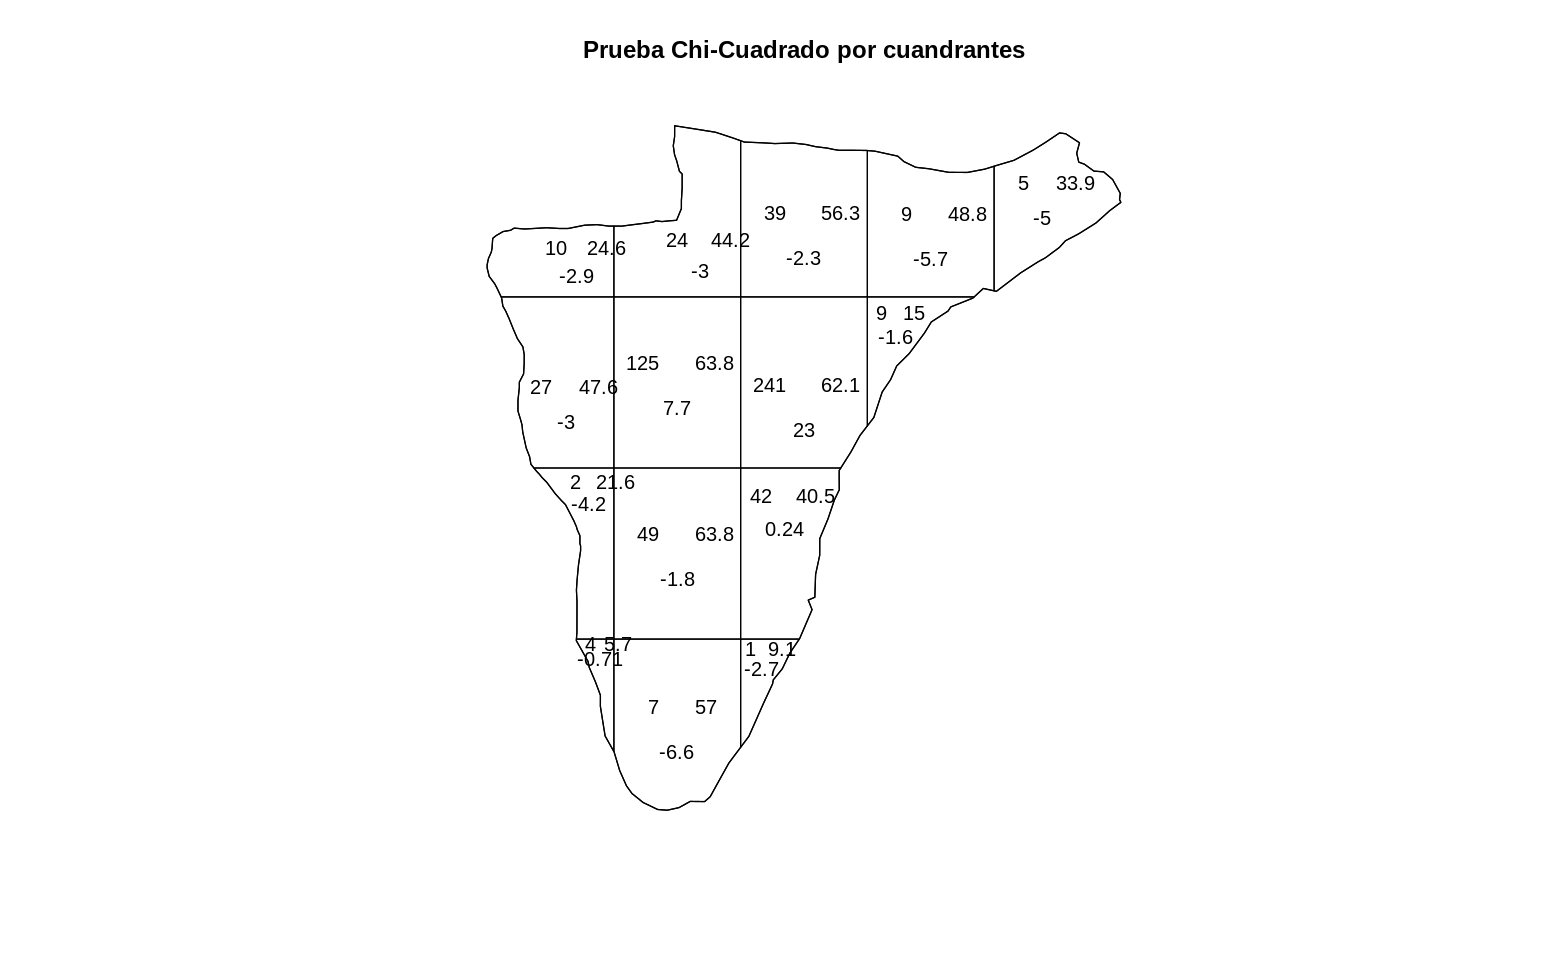

In [ ]:
qtest.Q = quadrat.test(bdsms_ppp, nx = 5, ny = 4, method="Chisq")
plot.quadrattest(qtest.Q, main = "Prueba Chi-Cuadrado por cuandrantes")
qtest.Q

## Prueba MonteCarlo

Dado que solo en unos pocos casos se conoce la distribución de los estadı́sticos de prueba, ası́ como de la gran cantidad de combinaciones que requieren las pruebas basadas en distancias lo cual las hace en ocasiones  imposibles de llevar a cabo, y por lo tanto en la mayorı́a de las ocasiones no
se puede encontrar tampoco la distribución exacta, ası́ se hace necesario este tipo de pruebas que permite realizar inferencia aún ante estos dificultades.



Aquí el p-valor se computa usando simulaciones de monte carlo. Dado que el p-valor es menor que 0.05 entonces rechazamos la hipótesis nula de que la intensidad sea igual para todos los cuadrantes.


	Conditional Monte Carlo test of CSR using quadrat counts
	Test statistic: Pearson X2 statistic

data:  bdsms_ppp
X2 = 739.1, p-value = 0.001
alternative hypothesis: two.sided

Quadrats: 15 tiles (irregular windows)

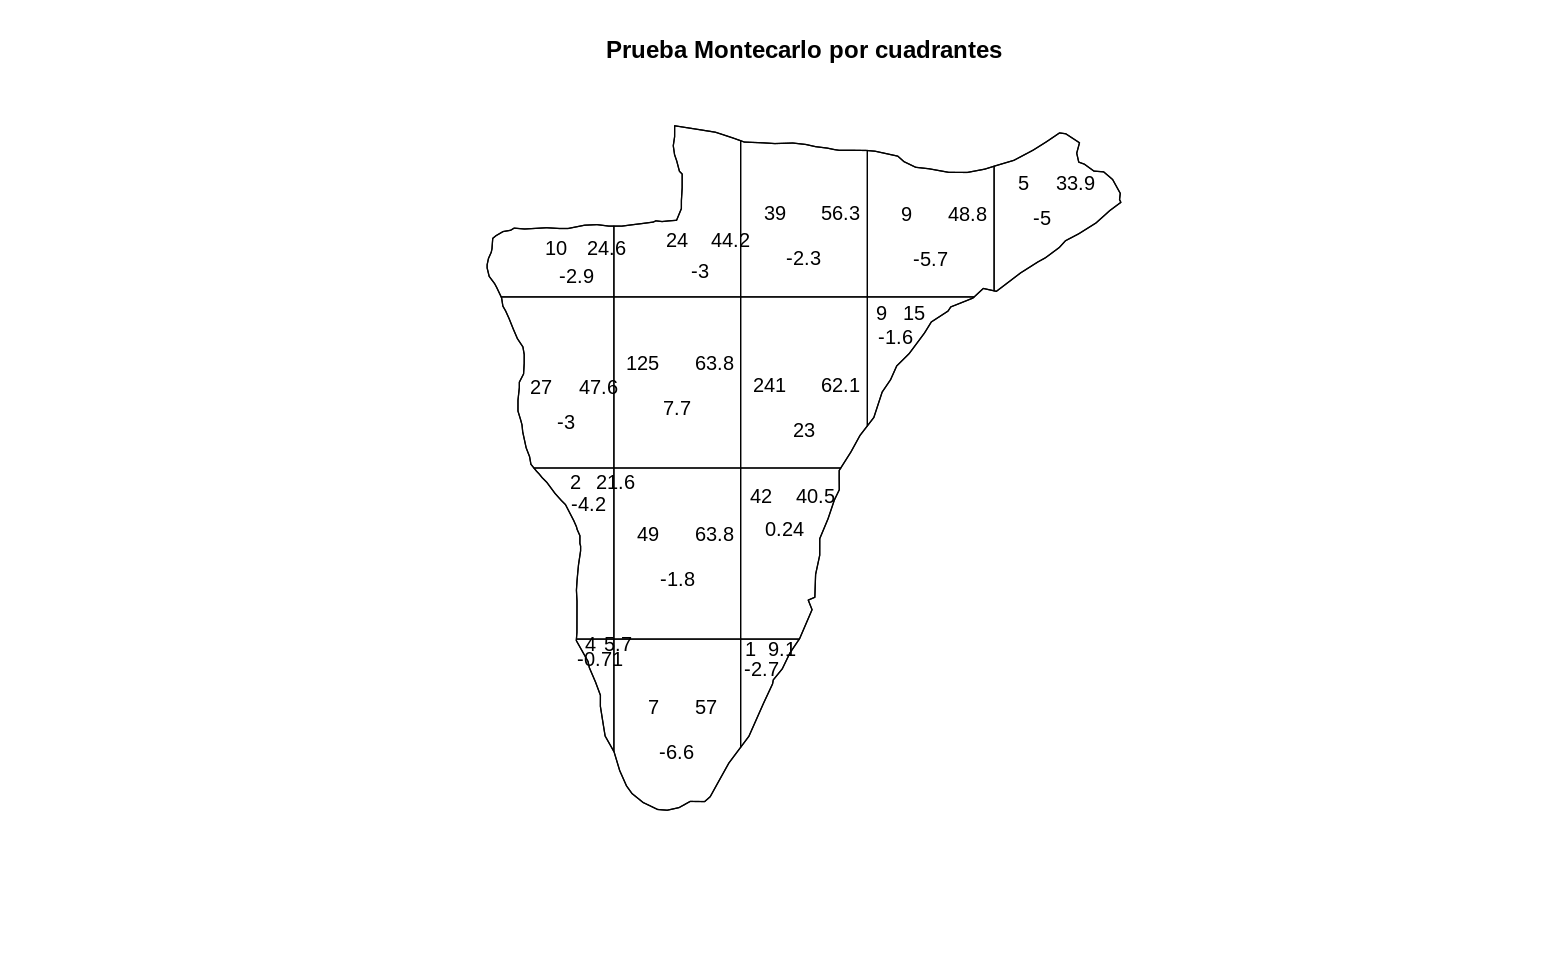

In [ ]:
MCtest.Q = quadrat.test(bdsms_ppp, nx = 5, ny = 4, method = "MonteCarlo")
plot.quadrattest(MCtest.Q, main = "Prueba Montecarlo por cuadrantes")
MCtest.Q 

# Pruebas de homogeniedad basadas en distancias

Hay varios tipos diferentes de distancias que se pueden medir en un patrón de puntos.

Las estadísticas de resumen basada en las distancias entre puntos tales como: La función – $F$ de espacio vacío, es la función de distribución de la distancia desde un origen (u otro punto fijo en $\mathbb{R}^{2}$ ) hasta el punto más cercano en $X$. La función – $G$, conocida también como “Función al vecino más cercano”, se interpreta como la función de distribución de la distancia desde un punto típico hasta el vecino más cercano en $X$.

Distancia de espacio vacío a un punto 

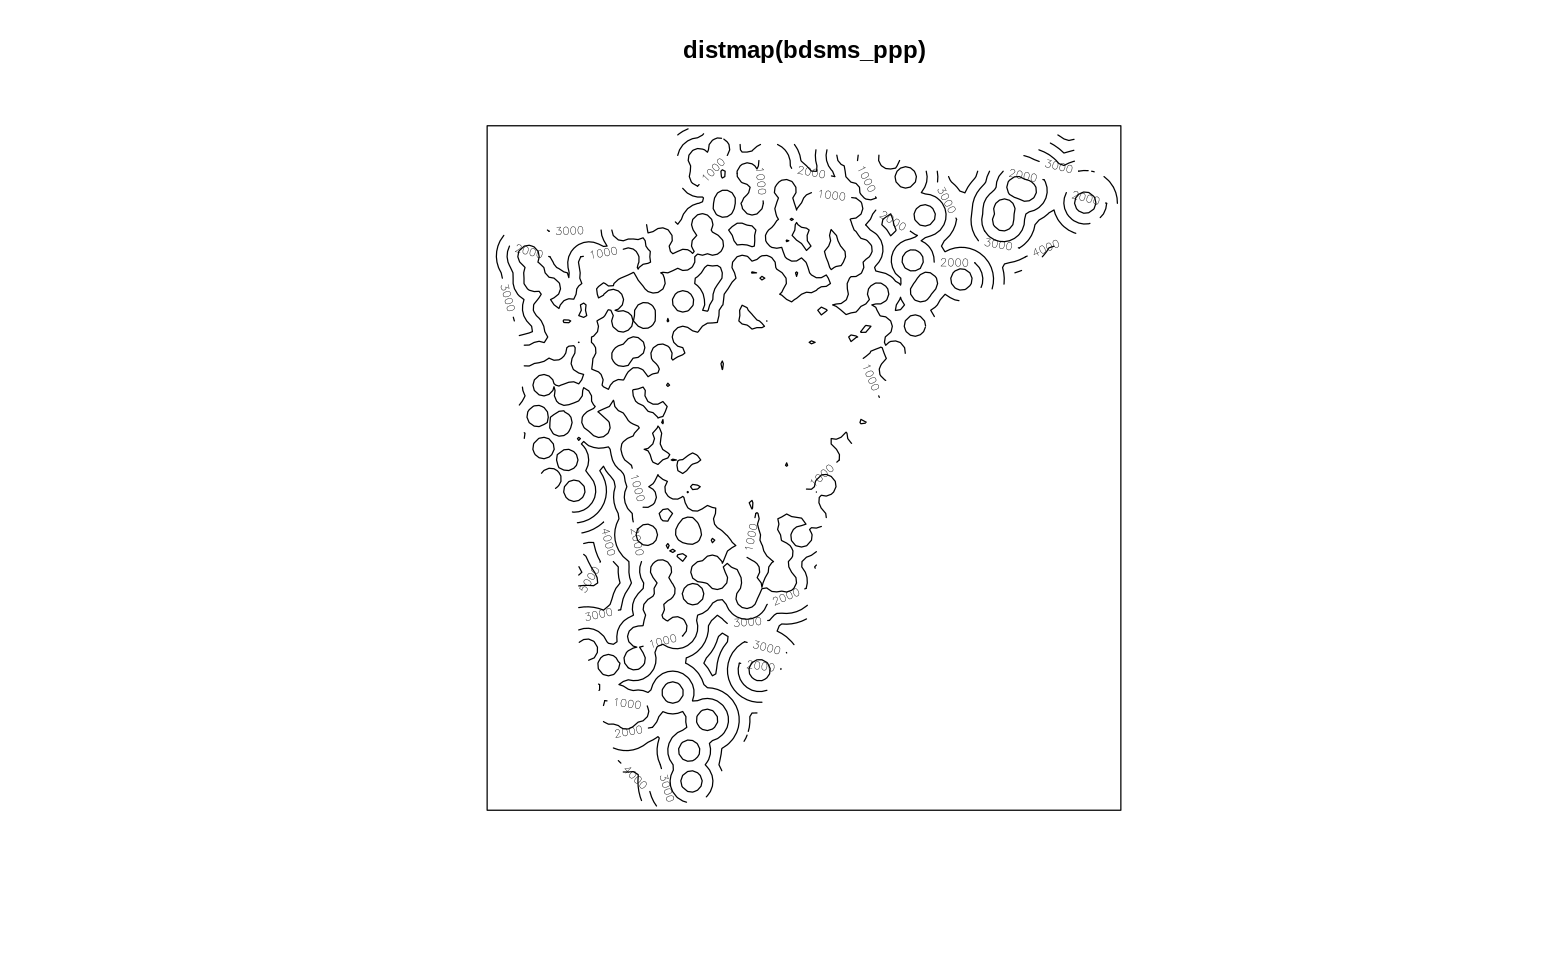

In [ ]:
contour(distmap(bdsms_ppp))

Distancia al vecino más cercano

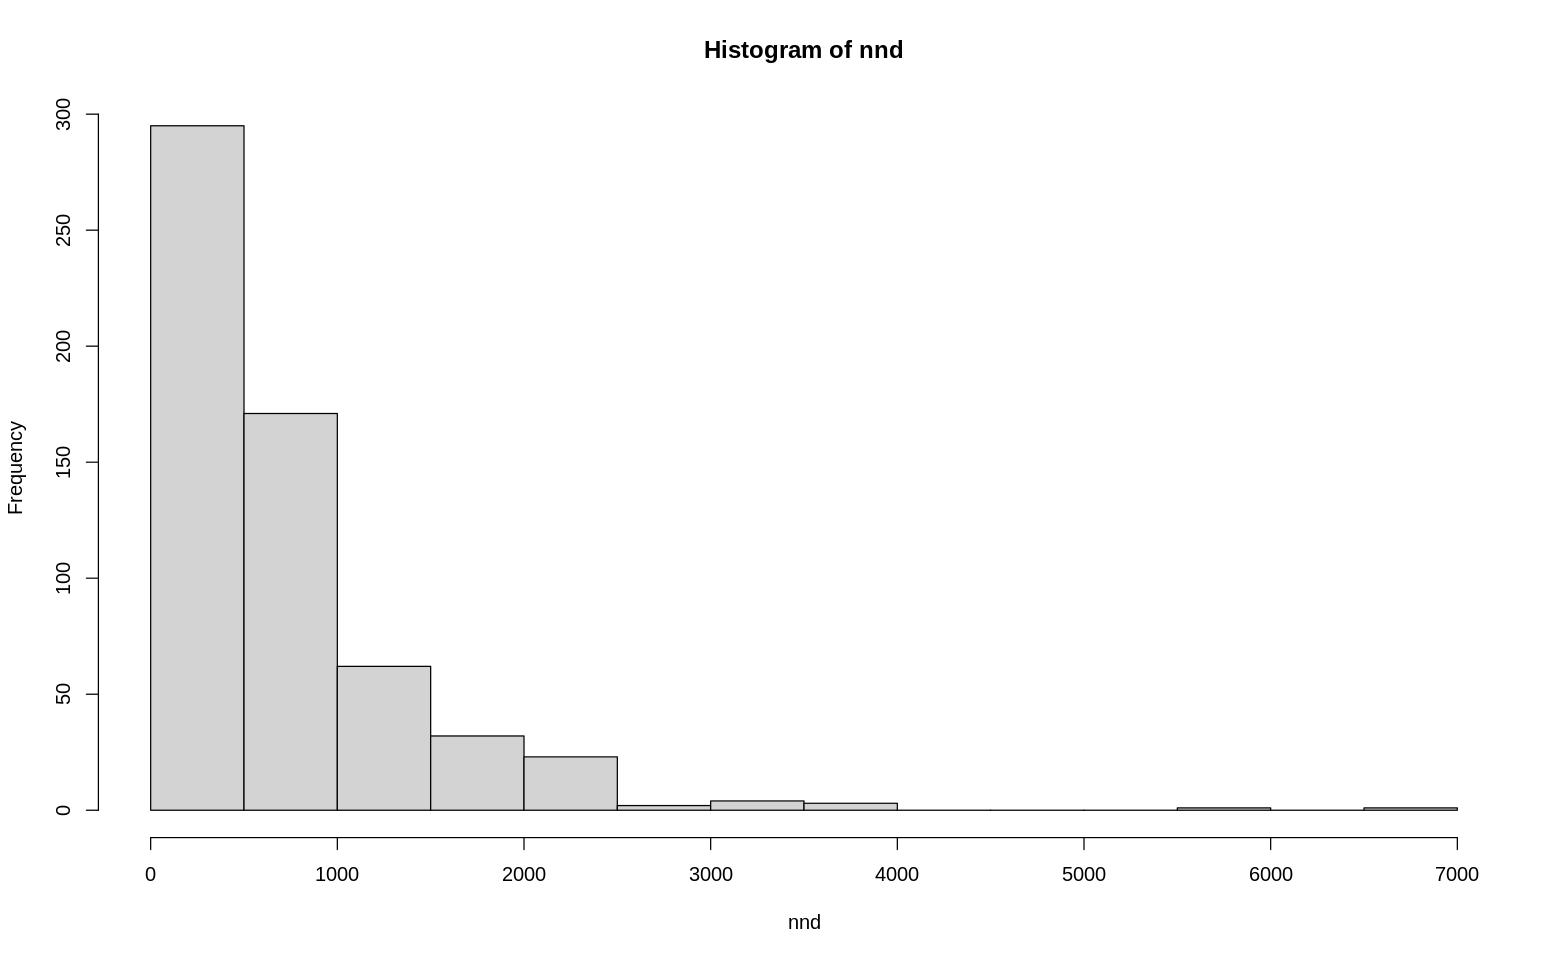

In [ ]:
nnd = nndist.ppp(bdsms_ppp)
hist(nnd)

## Diagrama de Stienen y teselado de Dirichlet

Las distancias al vecino más cercano y al espacio vacío también se pueden representar espacial y gráficamente. Esto puede resultar útil para la investigación exploratoria de datos de patrones de puntos espaciales.

- El primer grafico, el grafico de Stienen, dibuja un circulo en cada punto con diametro igual a la distancia del vecino mas cercano. Se puede imaginar globos circulares, centrados en cada punto del patrón, creciendo a un ritmo constante. Cada globo deja de crecer cuando toca otro globo.

- En el segundo grafico, el teselado de Dirichlet, es la división de un plano con n puntos en polígonos convexos de manera que cada polígono contiene exactamente un punto generador (similar a un centroide) y cada punto en un polígono dado está más cerca de su punto generador que de cualquier otro.

Warning message:
“6 duplicated points were removed”


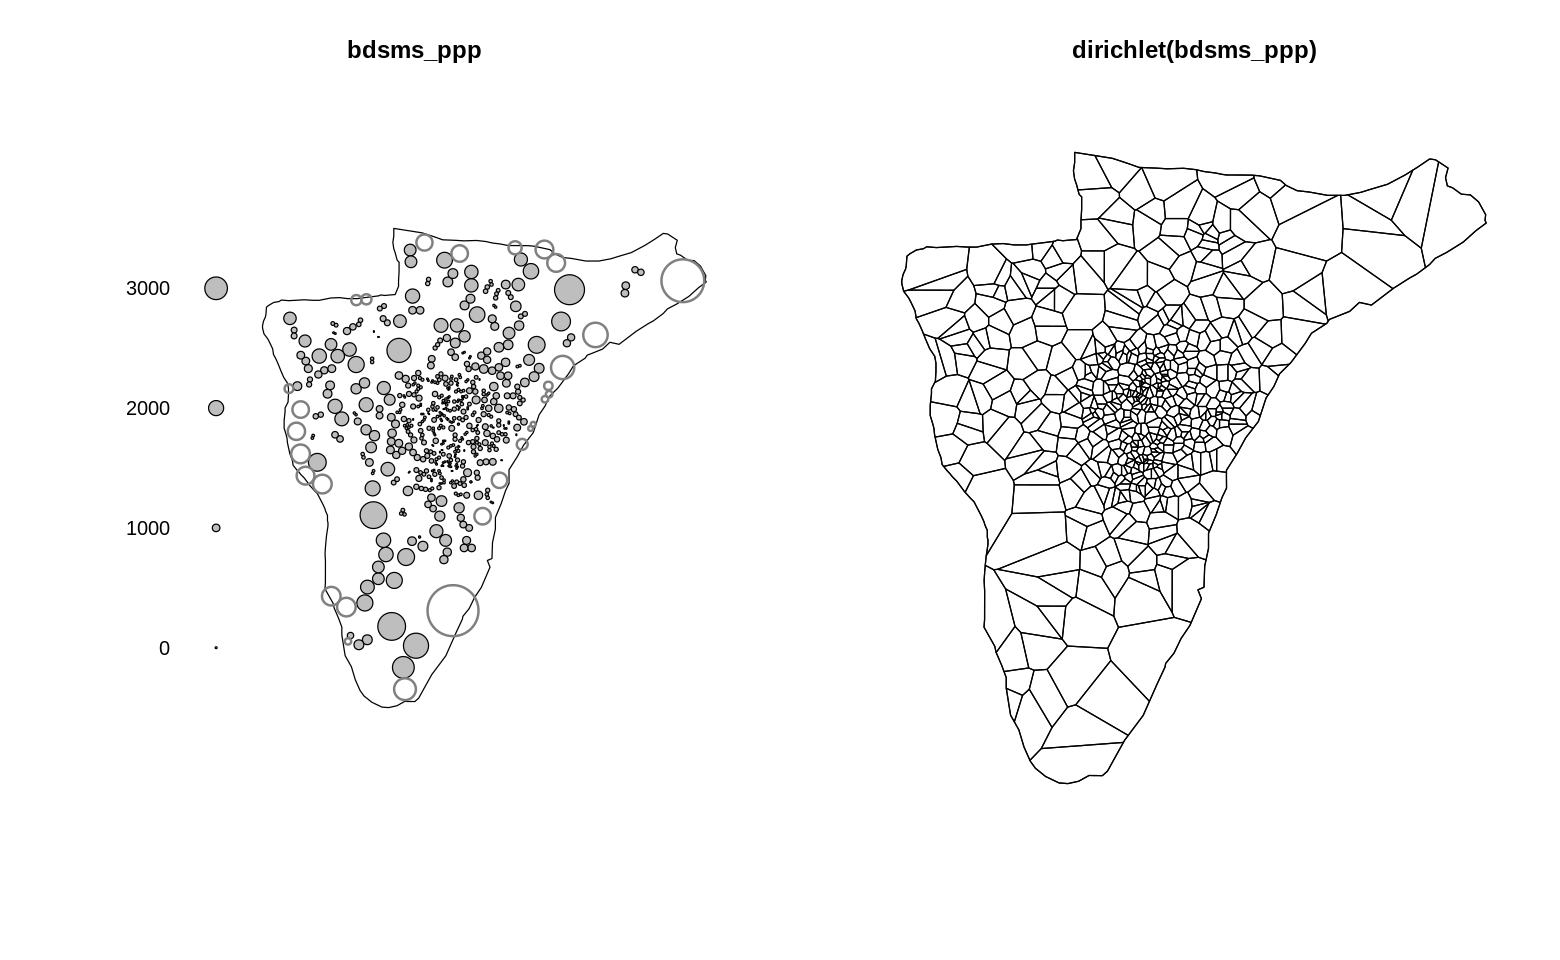

In [ ]:
par(mfrow=c(1,2))
stienen(bdsms_ppp)
plot(dirichlet(bdsms_ppp))

## Prueba de Clark - Evans

In [ ]:
clarkevans(bdsms_ppp)

naive       cdf 
0.8530458 0.7780494

La prueba de Clark - Evans para CSR propone un promedio de distancias de vecinos más cercanos en una muestra de puntos del patrón para cada punto y lo divide sobre el valor esperado de un proceso completamente aleatorio, el problema con esta prueba es que para procesos no homogeneos R suele ser menor a 1 y puede producir una significancia falsa. Esta prueba asume que el proceso puntual es estacionario. 

Como R < 1 sugiere un comportamiento agregado. Por otro lado, para la prueba de Clark - Evans con correción cdf, se rechaza la hipotesis nula de un proceso espacial completamente aleatorio. Para la prueba sin correcion tambien se rechaza. Sin embargo, es necesario hacer la correción.

In [ ]:
clarkevans.test(bdsms_ppp, correction="cdf", alternative="clustered")


	Clark-Evans test
	CDF correction
	Monte Carlo test based on 999 simulations of CSR with fixed n

data:  bdsms_ppp
R = 0.77805, p-value = 0.001
alternative hypothesis: clustered (R < 1)


In [ ]:
clarkevans.test(bdsms_ppp, correction="none", alternative="clustered")


	Clark-Evans test
	No edge correction
	Z-test

data:  bdsms_ppp
R = 0.85305, p-value = 3.647e-12
alternative hypothesis: clustered (R < 1)


## Hopkins-Skellam

El indice Hopkins-Skellam es menos sensible que el Clark Evans a problemas como el sesgo del efecto de borde y la no homogeneidad espacial.

In [ ]:
hopskel(bdsms_ppp)

[1] 0.3254665

Para la prueba de Hopkins-Skellam rechazamos la hipótesis nula de tener un proceso CSR.

In [ ]:
hopskel.test(bdsms_ppp, alternative="clustered")


	Hopkins-Skellam test of CSR
	using F distribution

data:  bdsms_ppp
A = 0.33034, p-value < 2.2e-16
alternative hypothesis: clustered (A < 1)


# Estimación para los datos


Estos estimadores suponen que el proceso puntual es estacionario. Son versiones con corrección de bordes de las funciones de distribución acumulativa empírica de las distancias del vecino más cercano en todos los puntos de datos (para $G$) y las distancias de espacio vacío en una cuadrícula de ubicaciones de prueba (para $F$).

Cada gráfico tiene cuatro curvas, tres estimaciones muy similares de la función usando diferentes correcciones de borde, y la función teórica para una aleatoriedad espacial completa

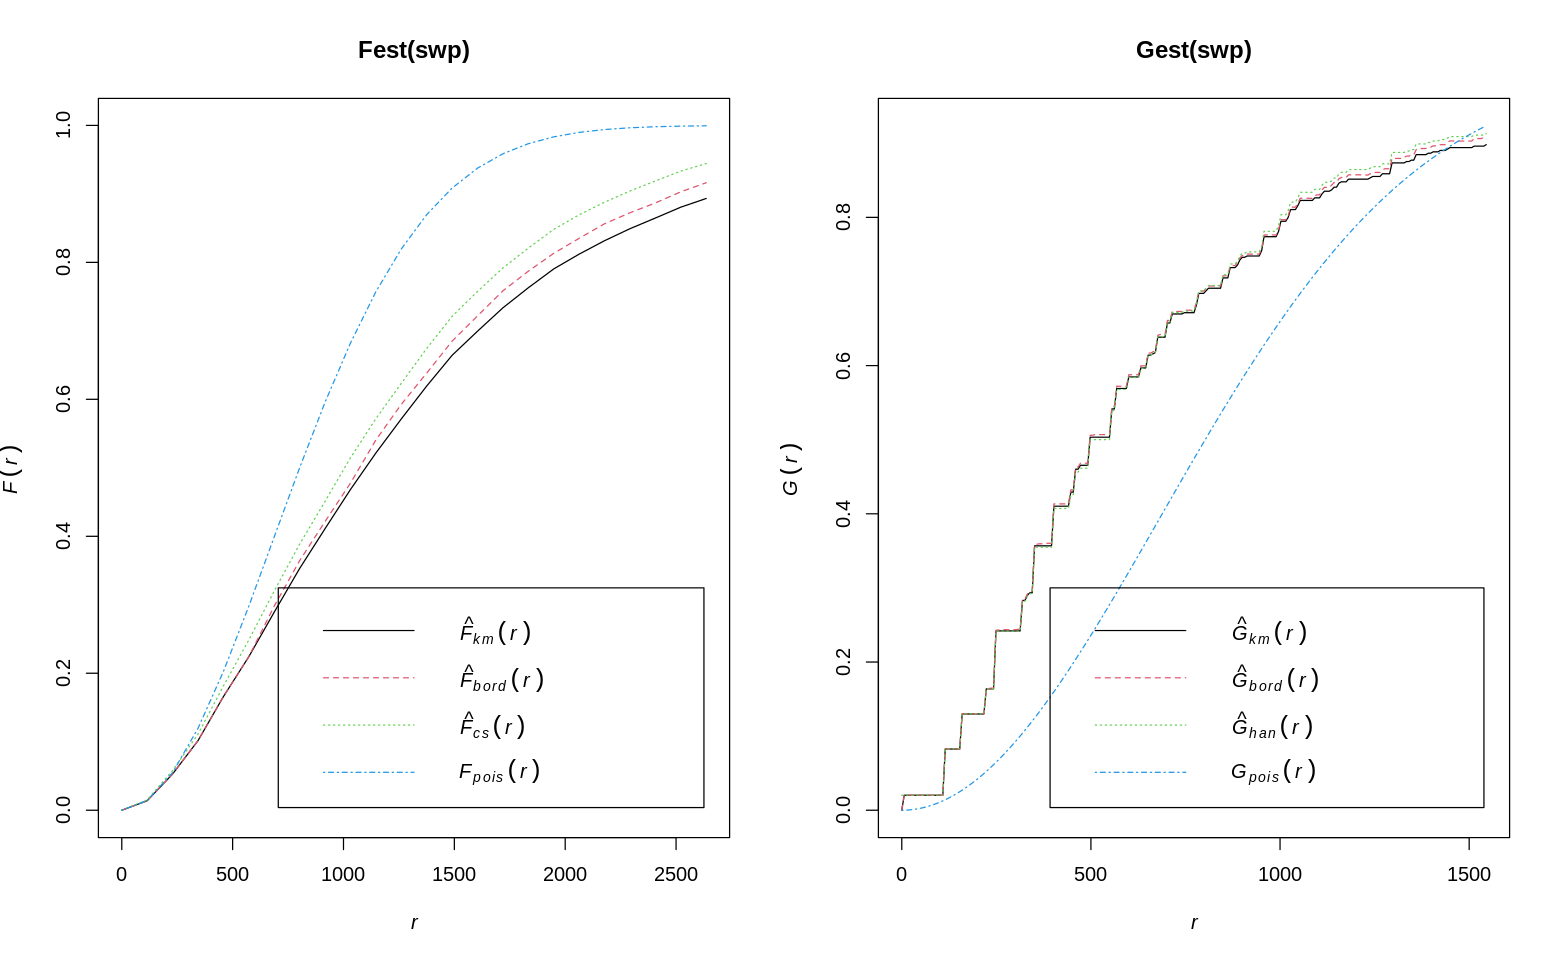

In [ ]:
swp = rescale(bdsms_ppp)
par(mfrow = c(1,2))
plot(Fest(swp))
plot(Gest(swp))

El valor de $\hat{G}$(r) = 0.5 es alcanzado alrededor de $r = 600$, de modo que la media de la distribución de la distancia al vecino más cercano entre los sismos es de unos 600 Kms. Para un proceso completamente aleatorio de la misma intensidad, la distancia media del vecino más cercano sería de unos 750 Kms según el mismo gráfico. Como la función empírica de $G$ es mayor que la teórica implica que las distancias del vecino más cercano en el patrón son más largas en comparación a un proceso de Poisson homogéneo. Por tanto, se confirma que la distribución del patrón es agrupada. 

Con respecto a la función $F$, se pude inferir que los valores empiricos son menores que los teoricos, esto quiere decir, que las distancias de espacio vacio son mayores que las esperadas. Por tanto, se afirma que el patrón presenta agrupamiento. 

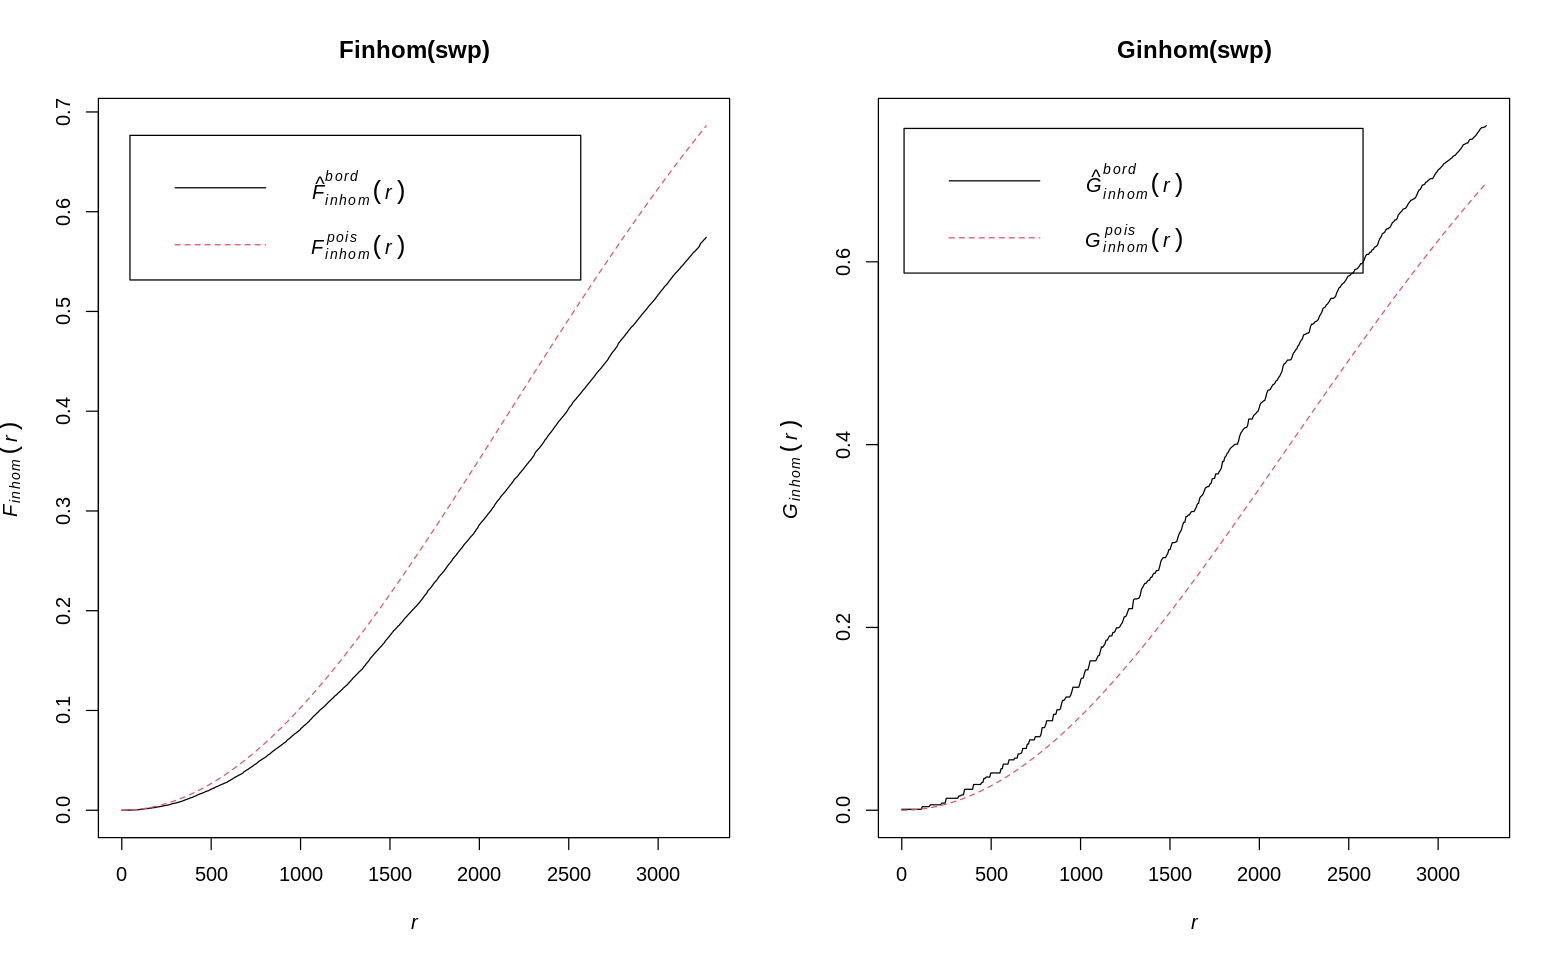

In [ ]:
par(mfrow = c(1,2))
plot(Finhom(swp))
plot(Ginhom(swp))

Con respecto a las graficas de pruebas de no homogeneidad, se percibe que tanto para la función de los vecinos más cercanos $G$ como para la función de espacio vacío $F$, las funciones teorícas y empíricas presentan una tendencia similar. 

### Intervalos de confianza y simulación de envelopes

In [ ]:
Fenv <- envelope(swp, Fest, nsim=100, fix.n=TRUE)
Genv <- envelope(swp, Gest, nsim=100, fix.n=TRUE)

Generating 100 simulations of CSR with fixed number of points  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,  100.

Done.
Generating 100 simulations of CSR with fixed number of points  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,  100.

Done.


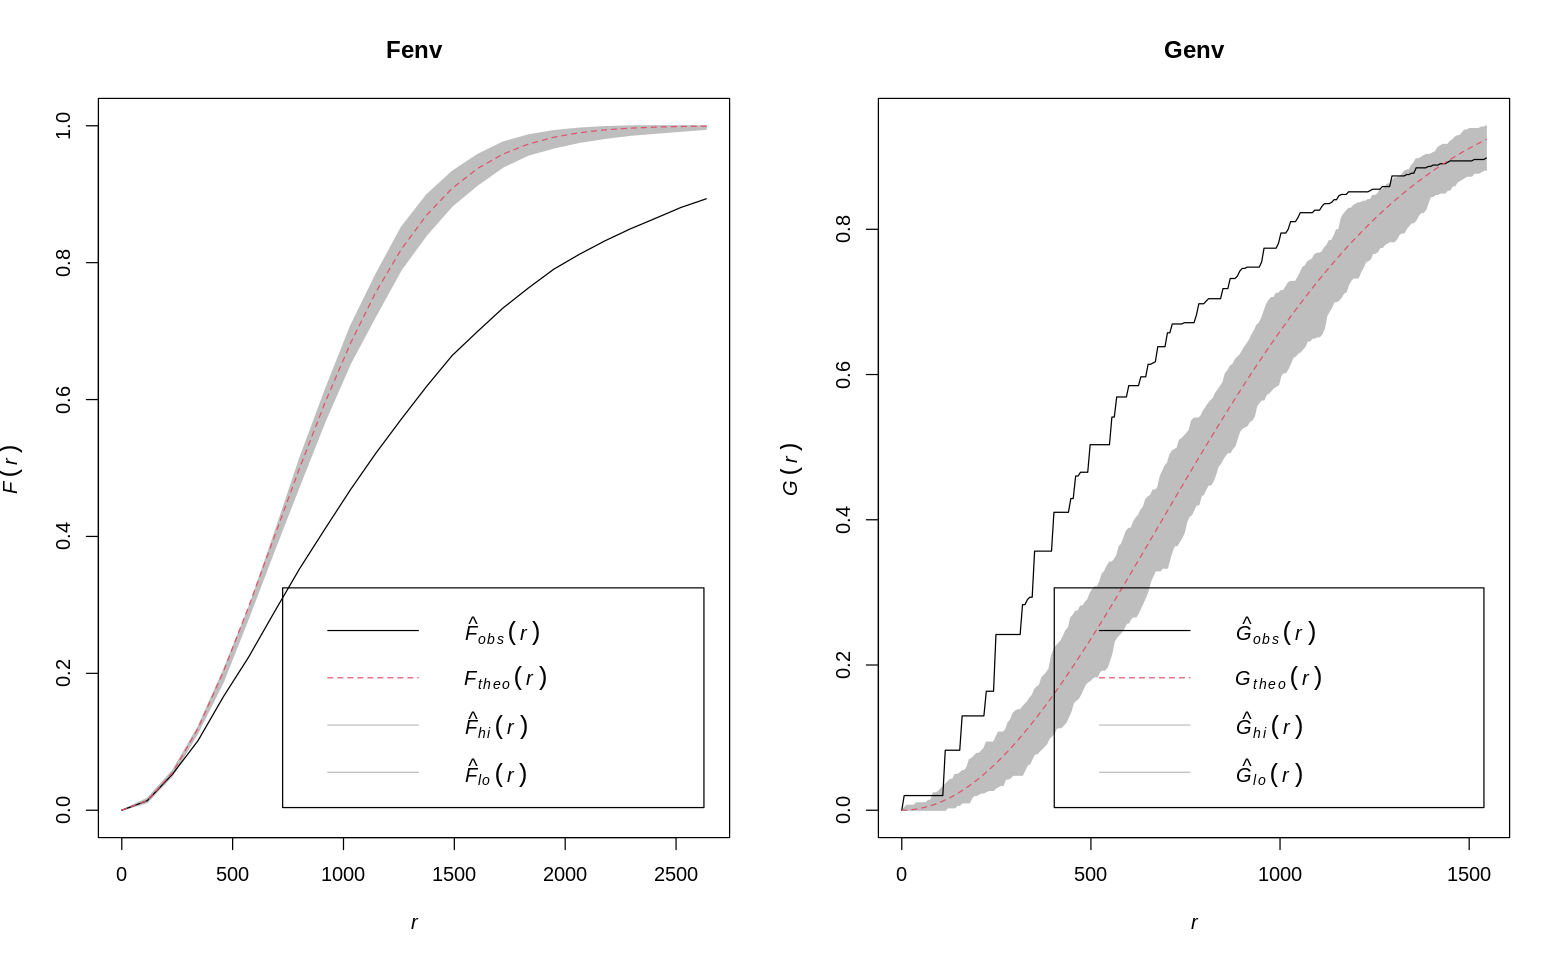

In [ ]:
par(mfrow = c(1,2))
plot(Fenv)
plot(Genv)

In [ ]:
Fenvinh <- envelope(swp, Ginhom, nsim=100, fix.n=TRUE)
Genvinh <- envelope(swp, Finhom, nsim=100, fix.n=TRUE)

Generating 100 simulations of CSR with fixed number of points  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,  100.

Done.
Generating 100 simulations of CSR with fixed number of points  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,  100.

Done.


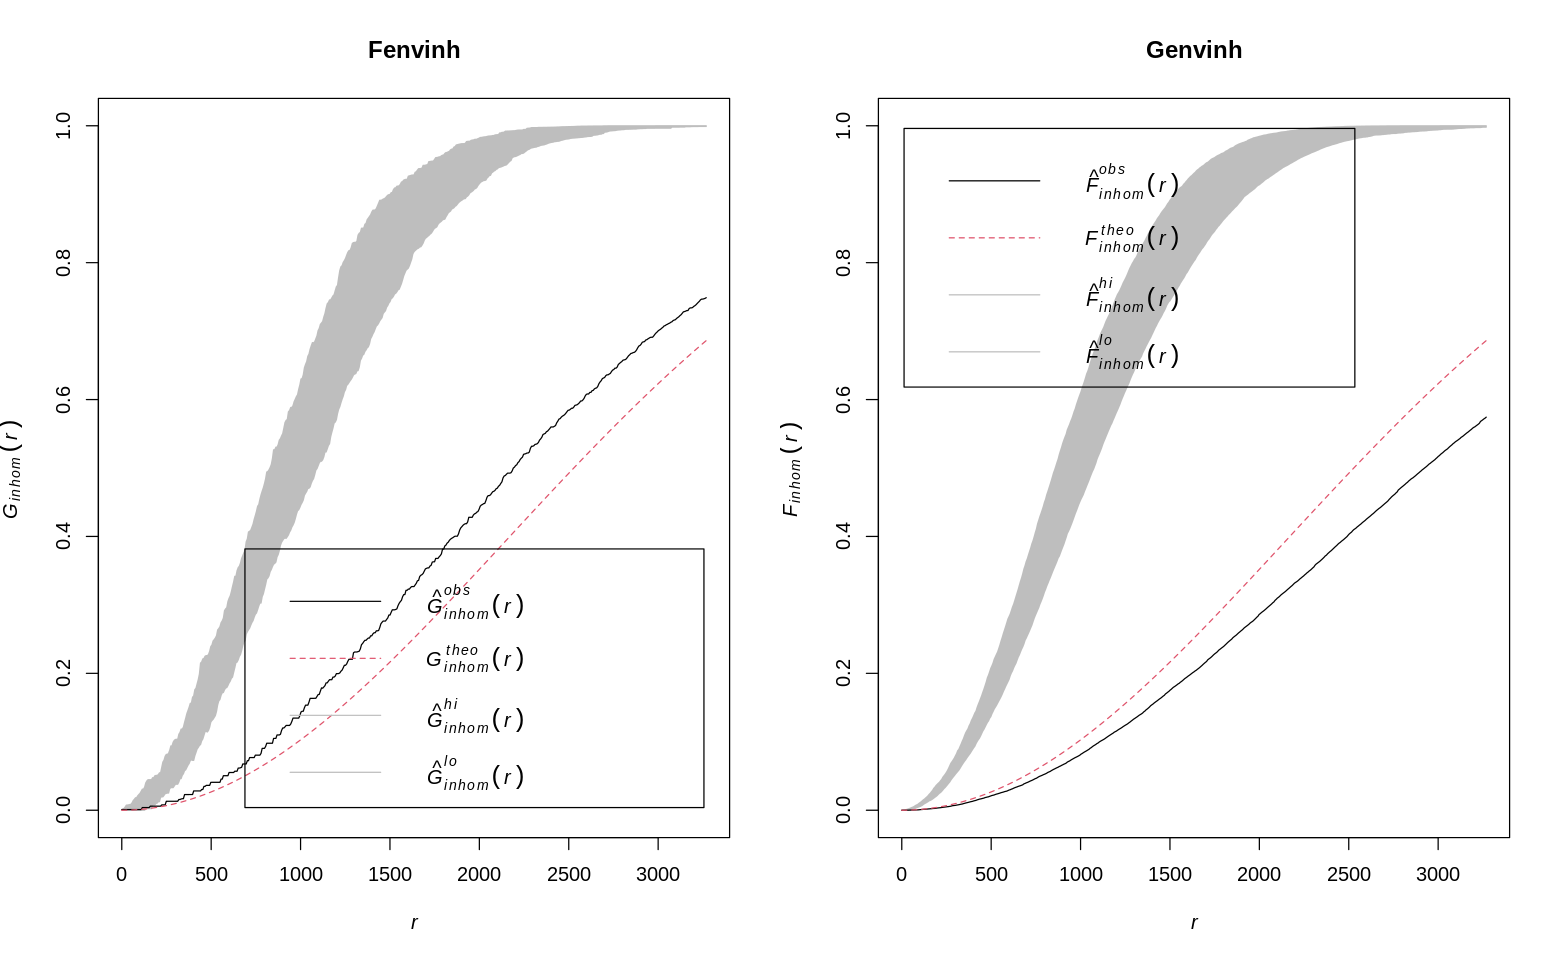

In [ ]:
par(mfrow = c(1,2))
plot(Fenvinh)
plot(Genvinh)

## Prueba de K-Ripley

Una función K proporciona un resumen de la dependencia espacial en una amplia gama de escalas de patrón, incluidas todas las distancias evento-evento, no solo las distancias vecinas más cercanas. Además, se conoce la forma teórica de la función para varios posibles modelos de procesos puntuales espaciales. Por lo tanto, la función no solo se puede utilizar para explorar la dependencia espacial, sino también para sugerir modelos específicos para representarla y estimar los parámetros de dichos modelos.

La función K se definen y estiman bajo el supuesto de que el proceso puntual es estacionario (homogéneo)

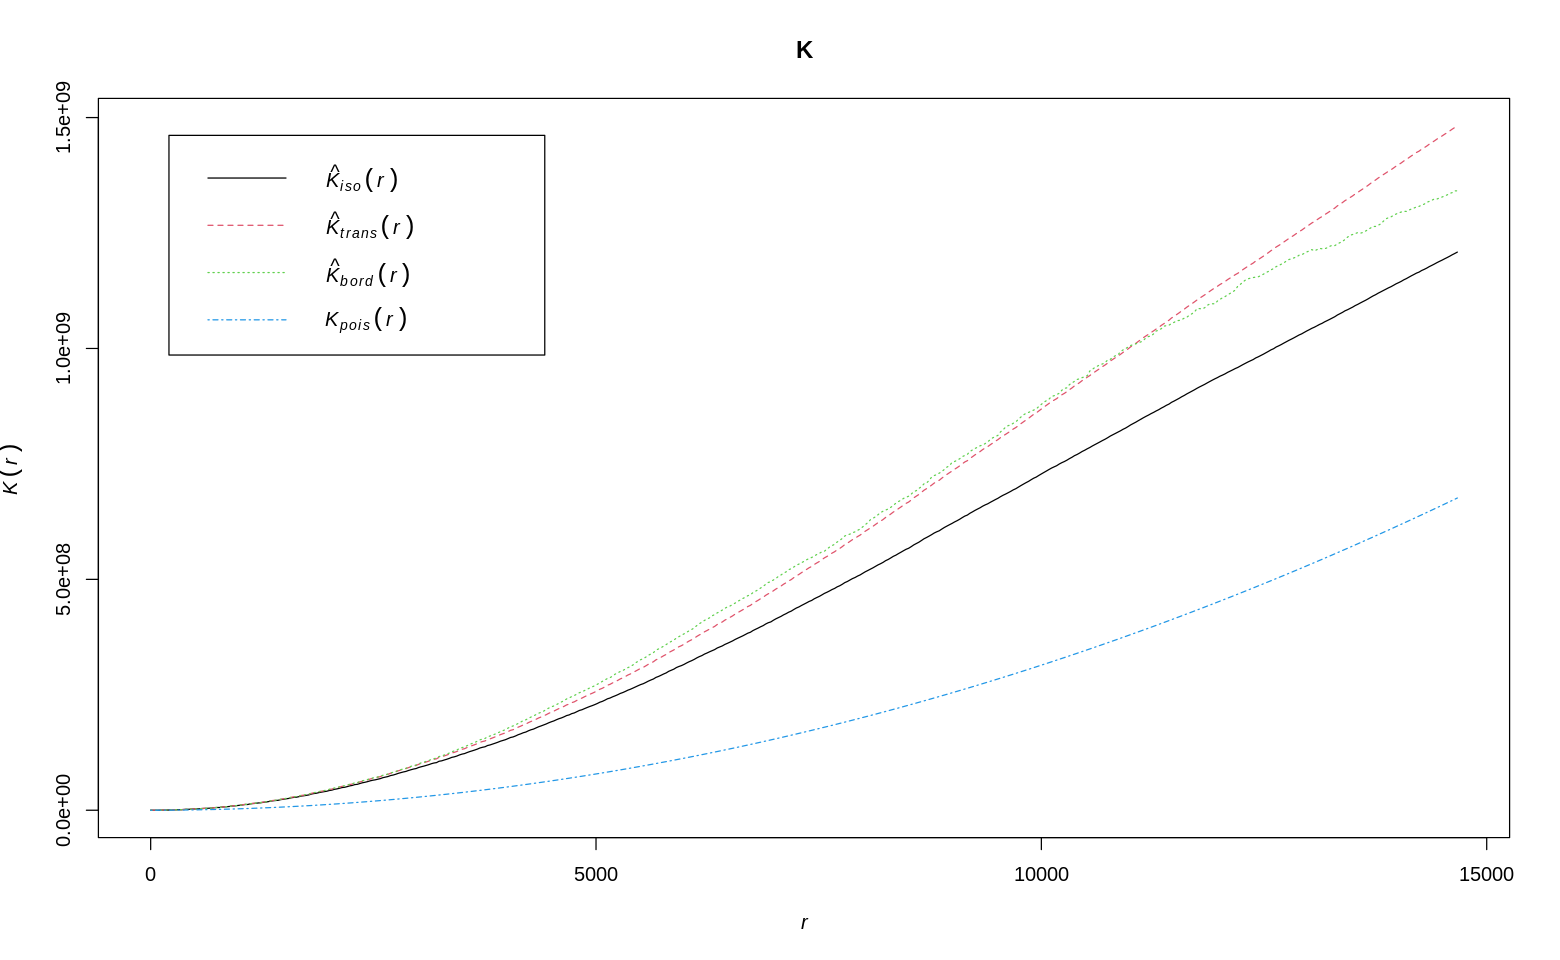

In [ ]:
K = Kest(bdsms_ppp)
plot(K)

Dado que los valores empiricos de la función $K$ de Ripley es mayor que la función teorica, la prueba sugiere de un patrón agrupado.

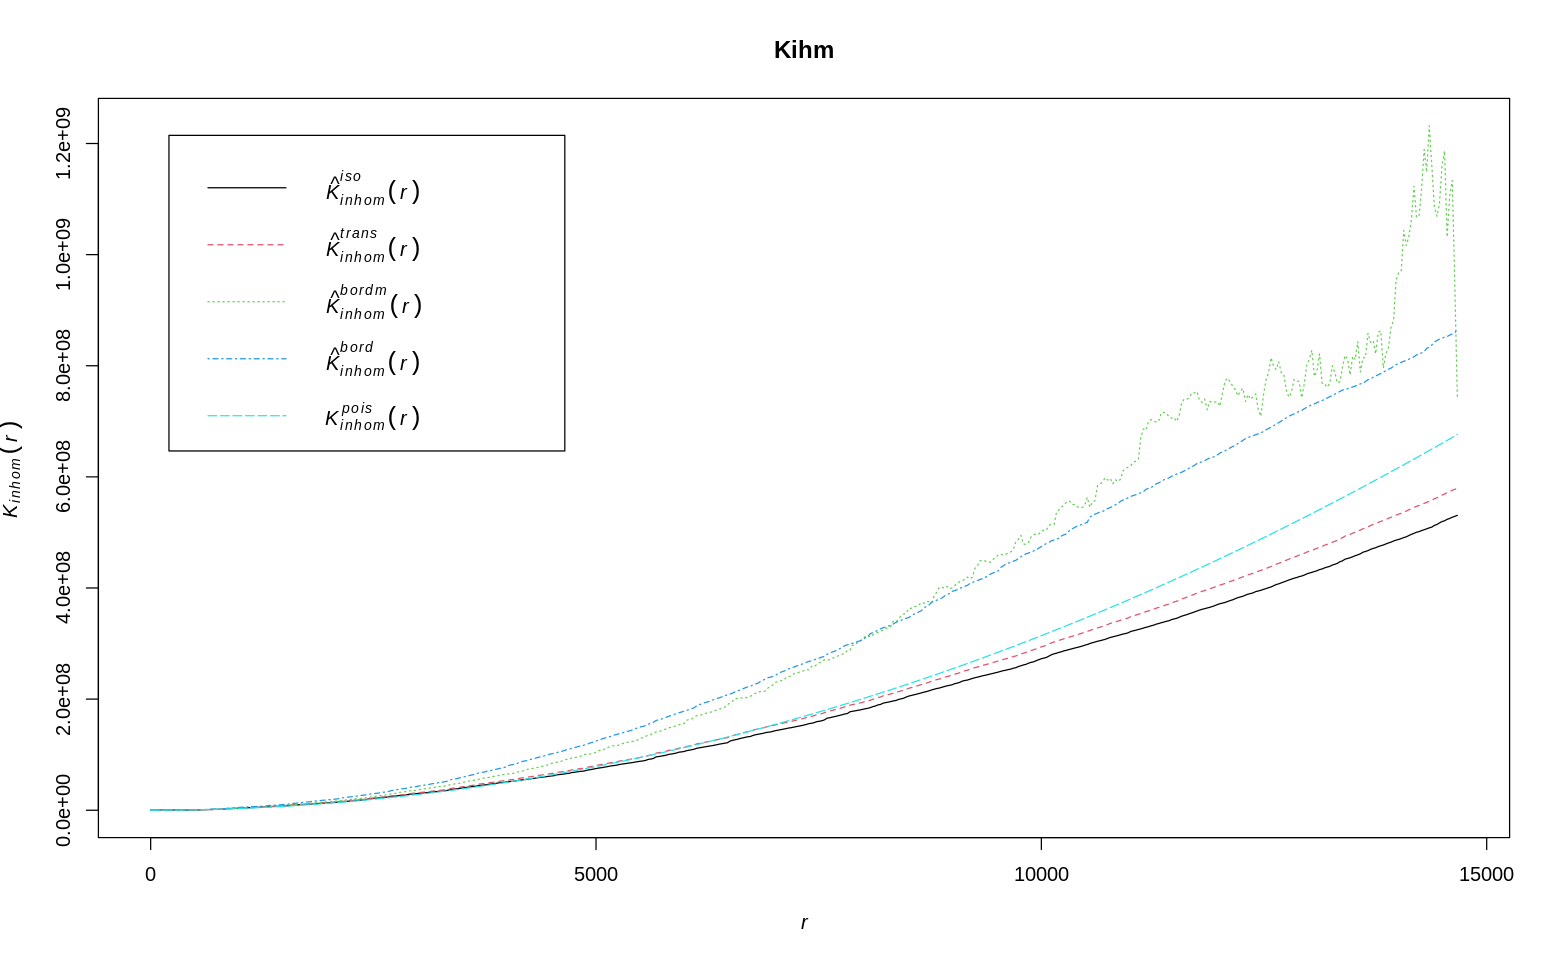

In [ ]:
Kihm = Kinhom(bdsms_ppp)
plot(Kihm)

Con respecto a las graficas de pruebas de no homogeneidad, se percibe las funciones $K$ teorícas y empíricas presentan una tendencia similar. 

### Intervalos de confianza y simulación de envelopes

In [ ]:
Kenv = envelope(swp, fun = Kest, nsim = 50)

Generating 50 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49,  50.

Done.


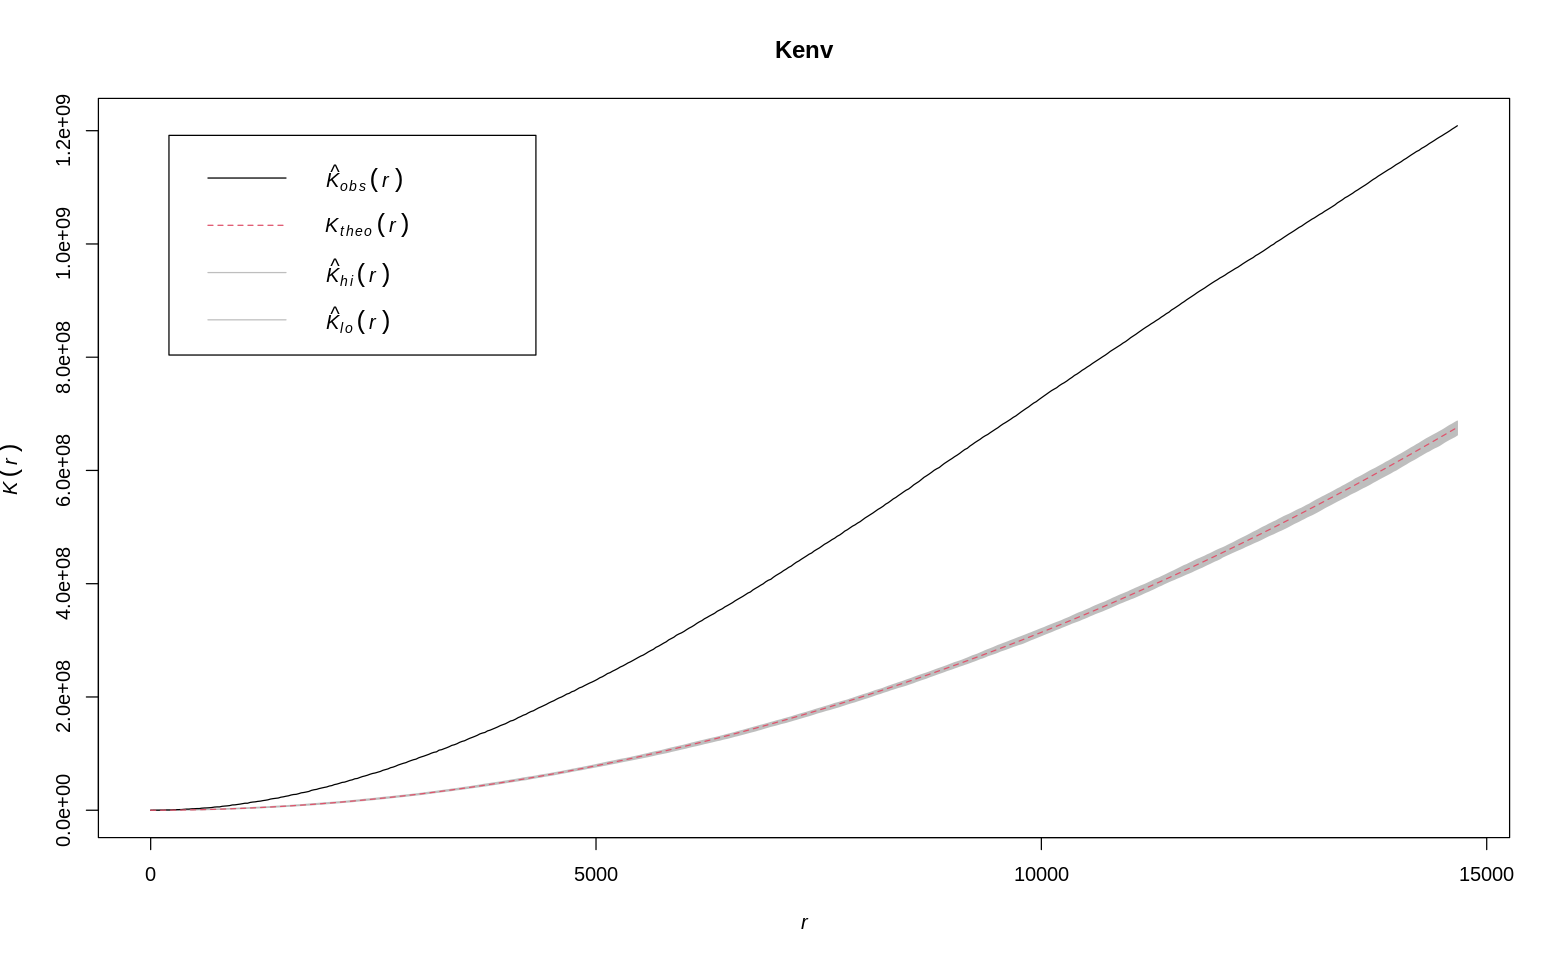

In [ ]:
options(repr.plot.width=13, repr.plot.height=8)
plot(Kenv)

## Correlación por pares


Una herramienta alternativa es la función de correlación de pares $g(r)$ que contiene contribuciones solo de distancias entre puntos iguales a $r$.

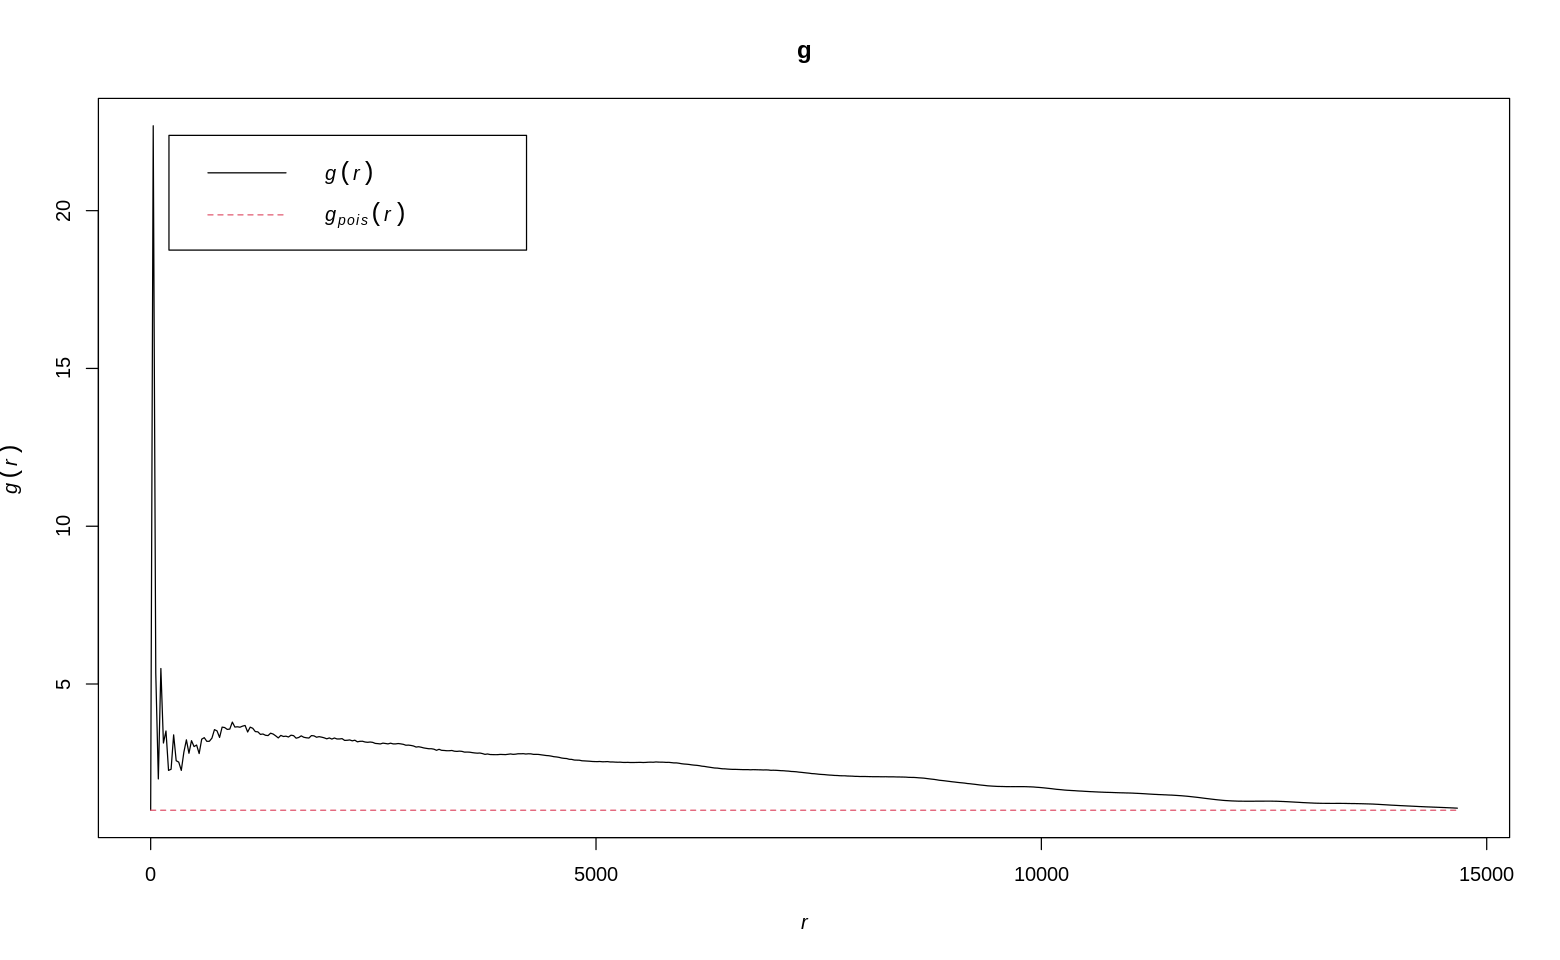

In [ ]:
g = pcf(K, spar=0.5)
plot(g)

Dado que $g(r)$ toma valores mayores que 1, se puede concluir que la distancia entre punto es más fecuente que lo esperado para un patrón CRS, lo que sugiere un patrón agreado. 

# Marcas

## Marcas Categoricas

- 2.0-3.0 Micro Magnitud – No son perceptibles.
- 3.0-3.9 Menor Magnitud – Perceptibles con poco movimiento y sin daño.
- 4.0-4.9 Ligera Magnitud – Perceptibles con movimiento de objetos y rara vez produce daño.
- 5.0-5.9 Moderada (o Mediana) Magnitud – Puede causar daños mayores en construcciones débiles o mal construidas.
- 6.0-6.9 Fuerte Magnitud – Pueden ser destructivos.
- 7.0-7.9 Mayor Magnitud – Pueden ser destructivos en zonas extensas.
- 8.0-9.9 Gran Magnitud – Catastróficos, provocando destrucción total en zonas cercanas al epicentro.
- 10 o + Magnitud Épica – Jamás registrado, puede generar una extinción local

In [ ]:
Magnitud_c = NULL

In [ ]:
for(i in 1:length(bdsms_ct$Magnitud)){
  if(bdsms_ct$Magnitud[i] < 3){
    Magnitud_c[i] = "Micro"
  } else if(bdsms_ct$Magnitud[i] >= 3 & bdsms_ct$Magnitud[i] < 4){
    Magnitud_c[i] = "Menor"
  } else if(bdsms_ct$Magnitud[i] >= 4 & bdsms_ct$Magnitud[i] < 7){
    Magnitud_c[i] = "Moderada"
  } 
}

In [ ]:
bdsms_pppmc = ppp(x = bdsms_ct$X, y = bdsms_ct$Y, marks = as.factor(Magnitud_c), window = window)
Qmc = quadratcount(bdsms_pppmc, nx = 5, ny = 4, method="Chisq")

Warning message:
“data contain duplicated points”


In [ ]:
summary(as.factor(Magnitud_c))

Menor    Micro Moderada 
      73      512        9

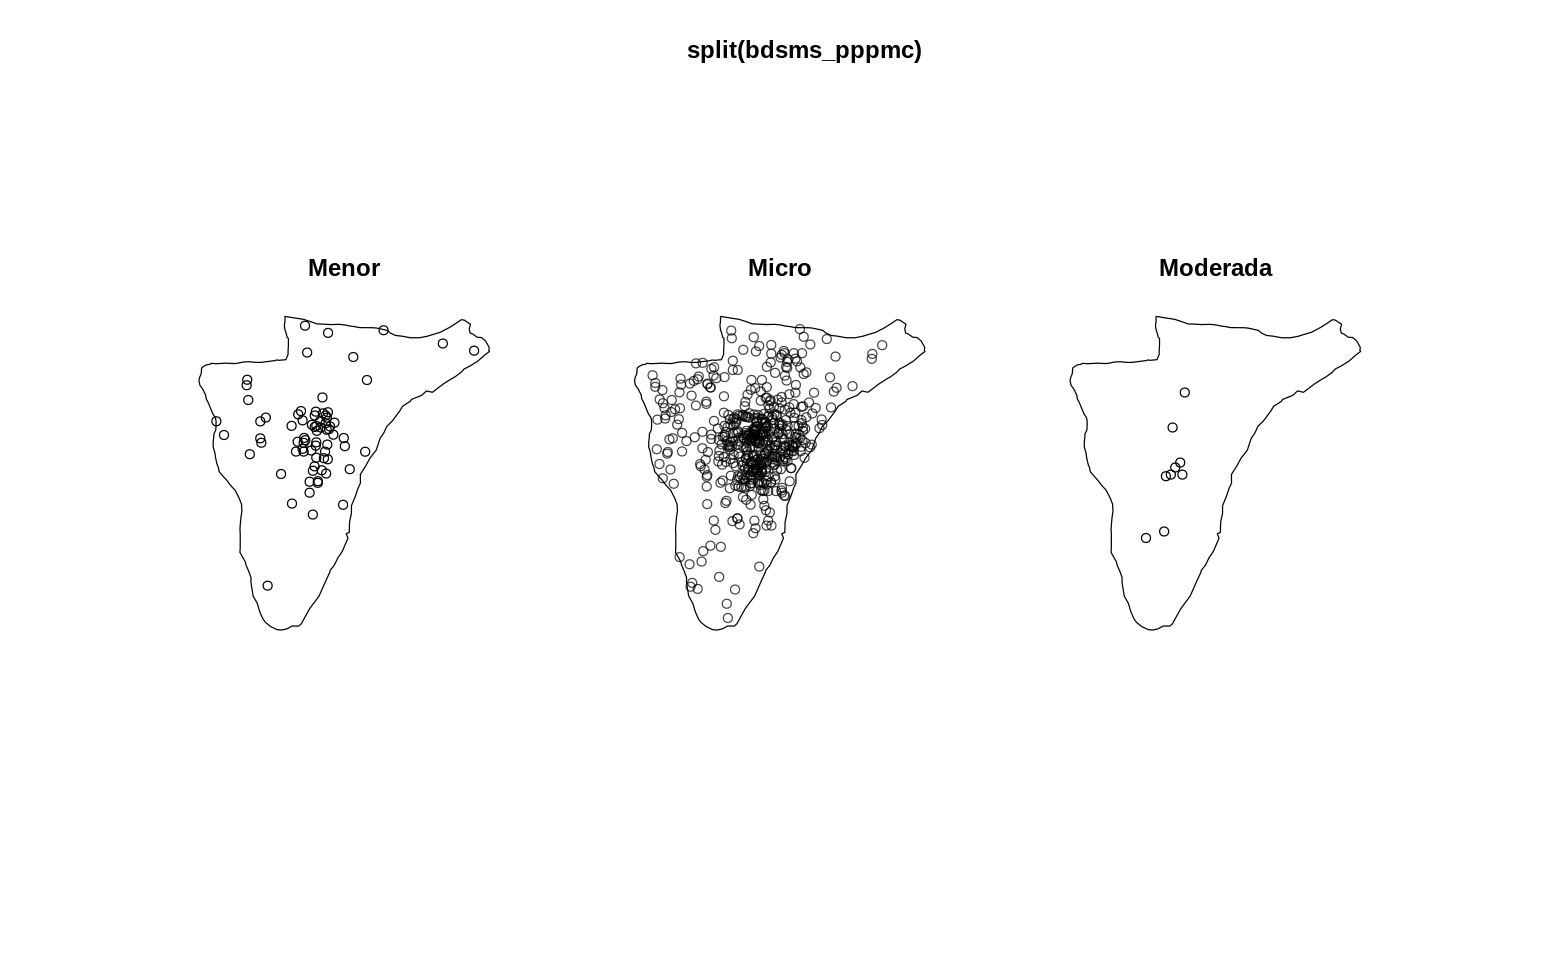

In [ ]:
plot(split(bdsms_pppmc))

Realiza suavizado espacial de valores numéricos observados en un conjunto de ubicaciones irregulares. Utiliza suavizado de kernel y selección de ancho de banda con validación cruzada de mínimos cuadrados.

### Analisis basado en la densidad

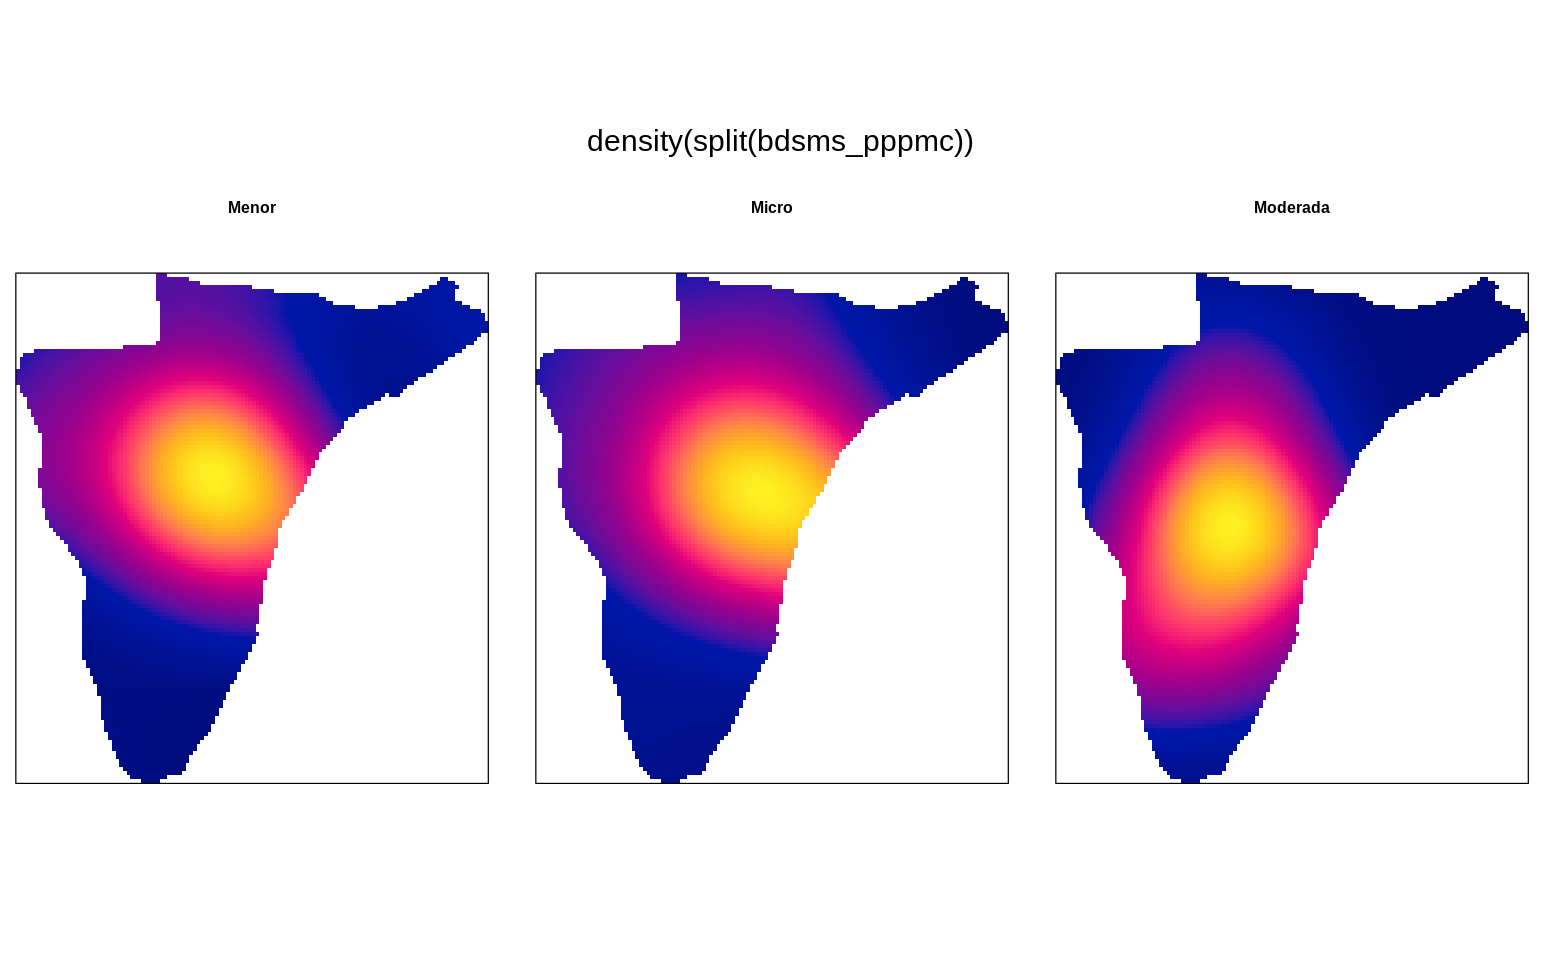

In [ ]:
plot(density(split(bdsms_pppmc)), ribbon = FALSE)

Podemos ver que para las categorias (magnitud menor y magnitud micro) la distribución tiende a concentrarse en la region centro-oriental mienras que la magnitud moderada tiende a concentrarse a lo largo del departamento.

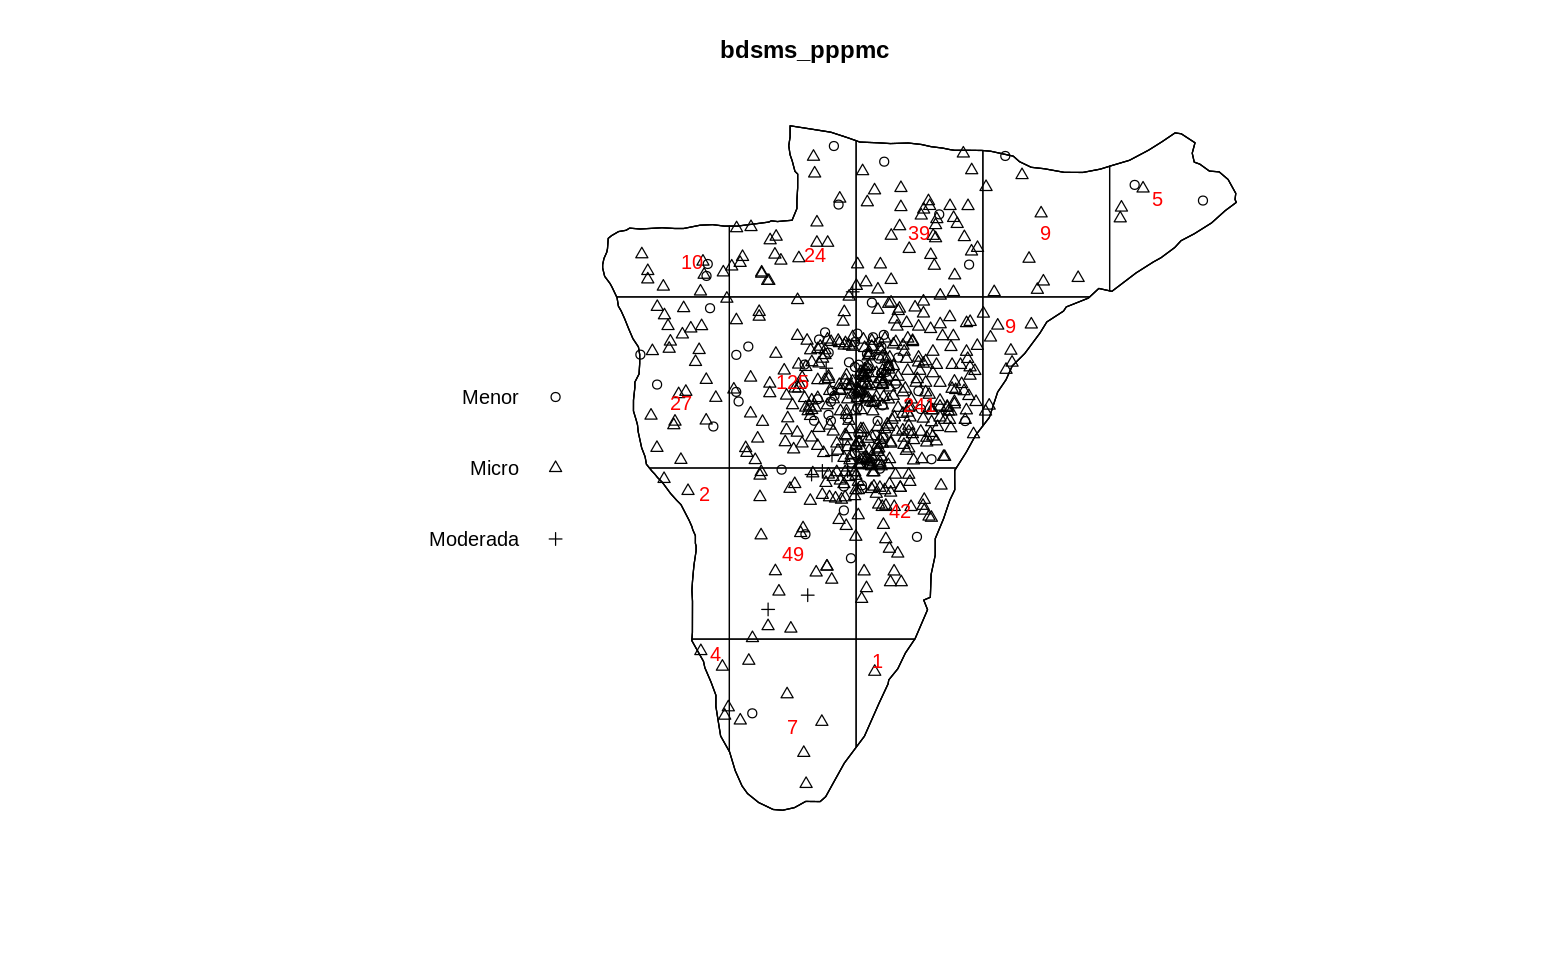

In [ ]:
options(repr.plot.width=13, repr.plot.height=8)
plot(bdsms_pppmc)
plot(Qmc, add=TRUE, col = "Red") 

Las proporciones relativas de intensidad podrían calcularse tomando proporciones de estas densidades

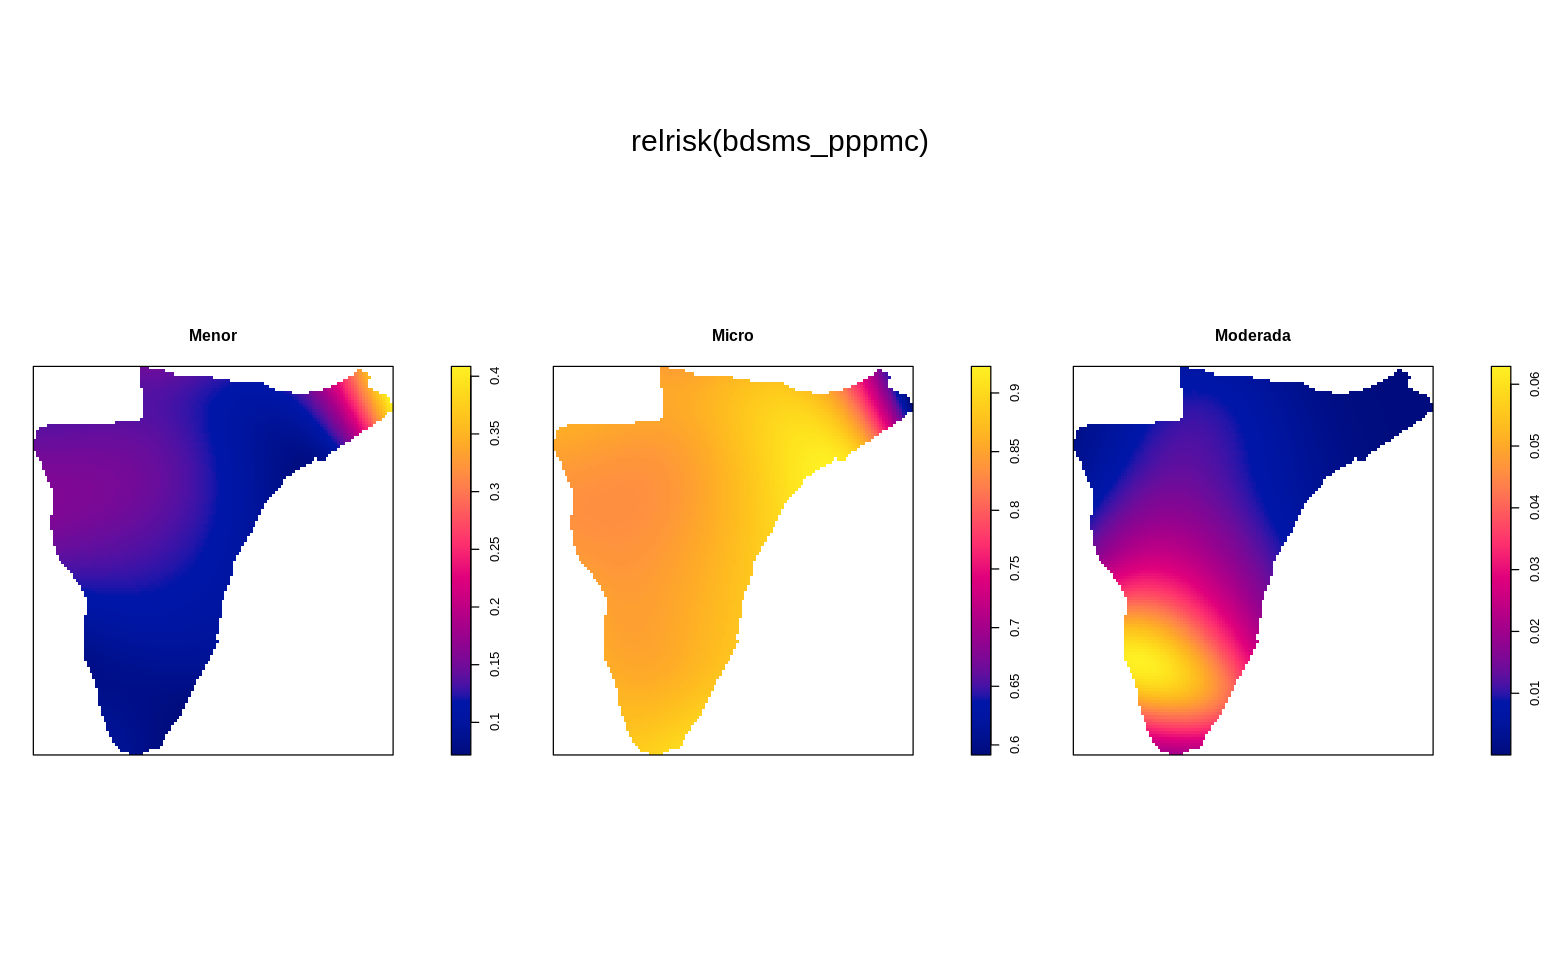

In [ ]:
plot(relrisk(bdsms_pppmc))

### Pruebas de homogeniedad en distancias

**Funcion G**

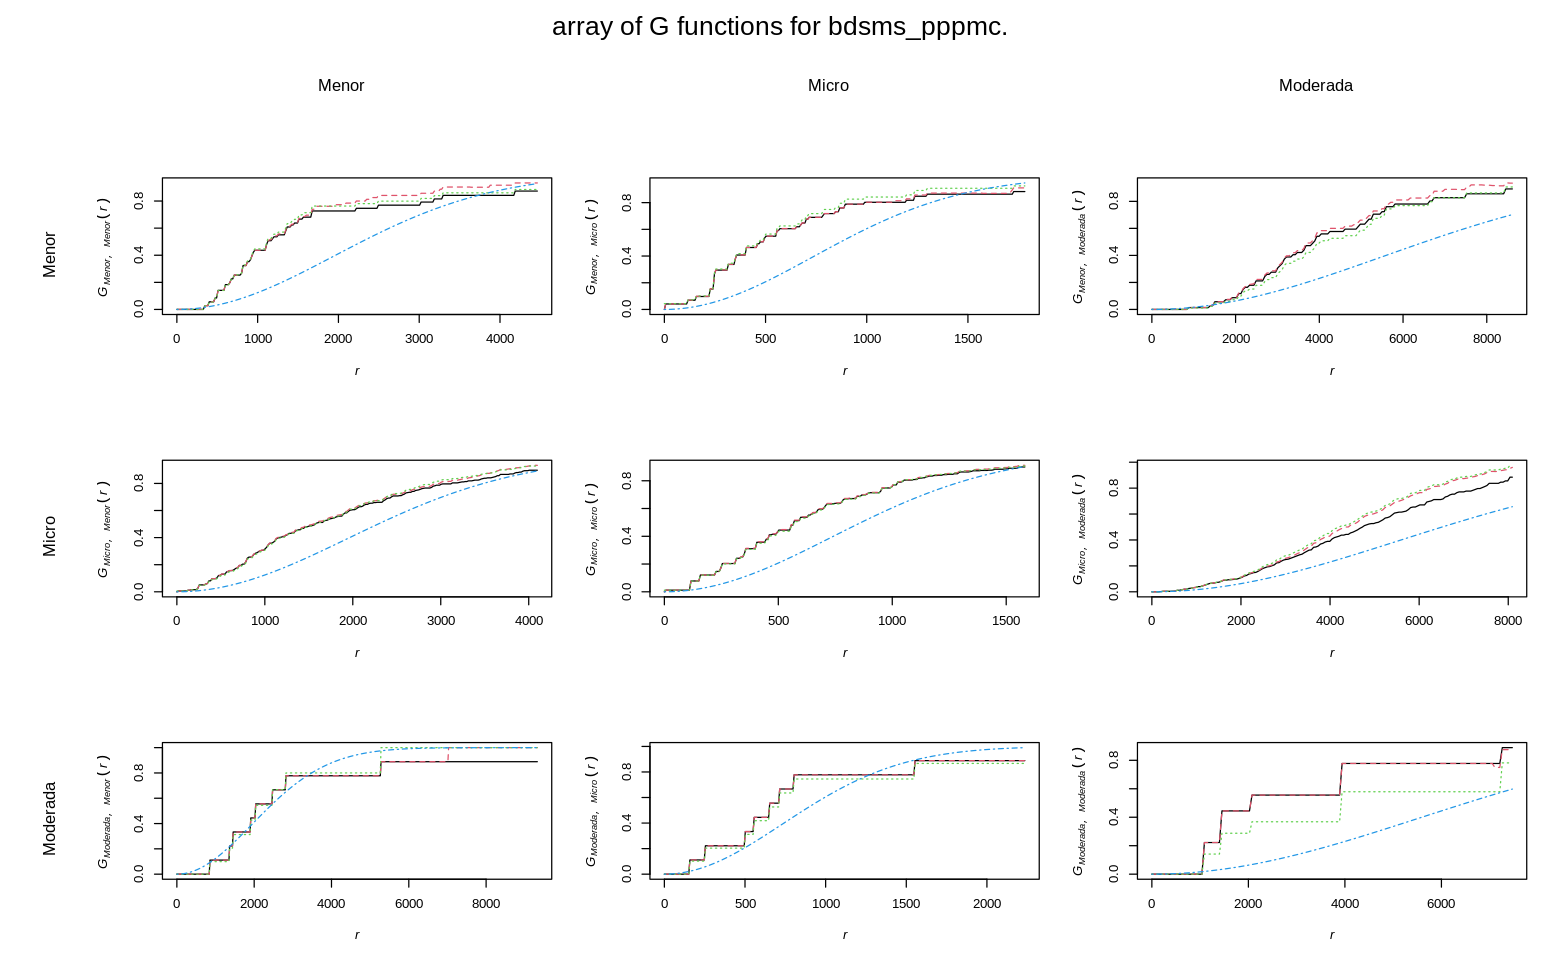

In [ ]:
plot(alltypes(bdsms_pppmc, "G"))

Podemos ver que en la grafica menor vs micro que existe una distancia mayor de las funciones empiricas con respecto a la teórica, es decir que no es homogeneo y sugiere un patron agregado, al igual que moderada vs menor. A diferencia de moderada vs micro que no presenta un patrón claro.

In [ ]:
 Genvmc = alltypes(bdsms_pppmc, Gcross, nsim = 50, envelope = TRUE)

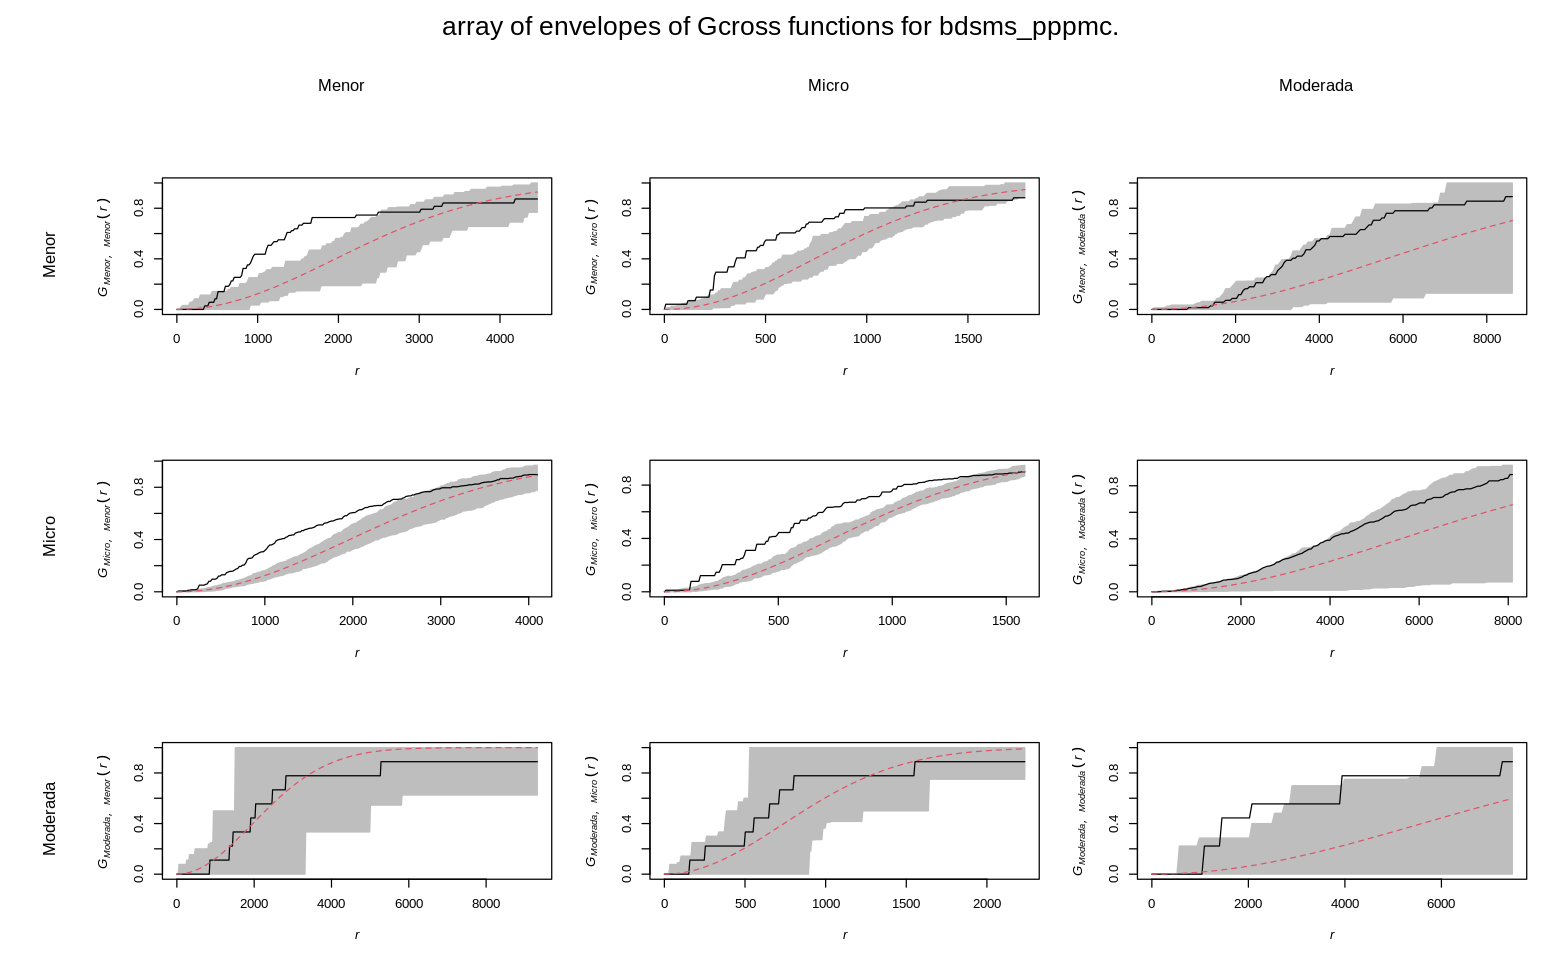

In [ ]:
plot(Genvmc)

**Funcion K**

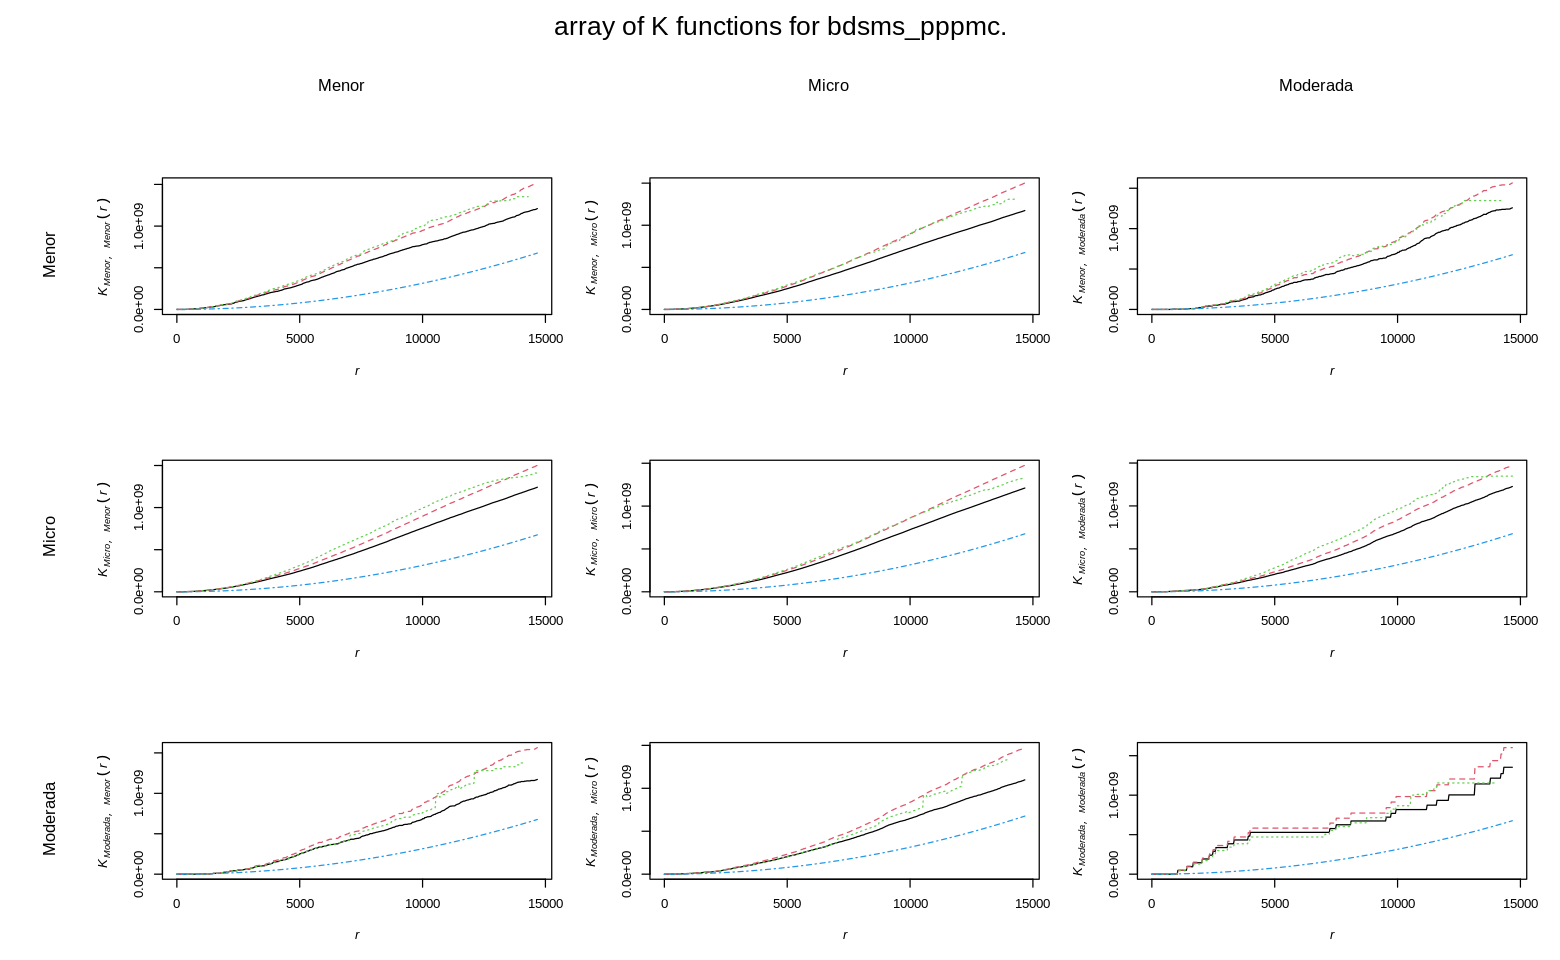

In [ ]:
plot(alltypes(bdsms_pppmc, "K"))

Como todas las curvas estimadas estan por encima de la teorica, que es la azul, la función K sugiere un comportamiento agregado.

In [ ]:
Kenvmc = alltypes(bdsms_pppmc, Kcross, nsim = 50, envelope = TRUE)

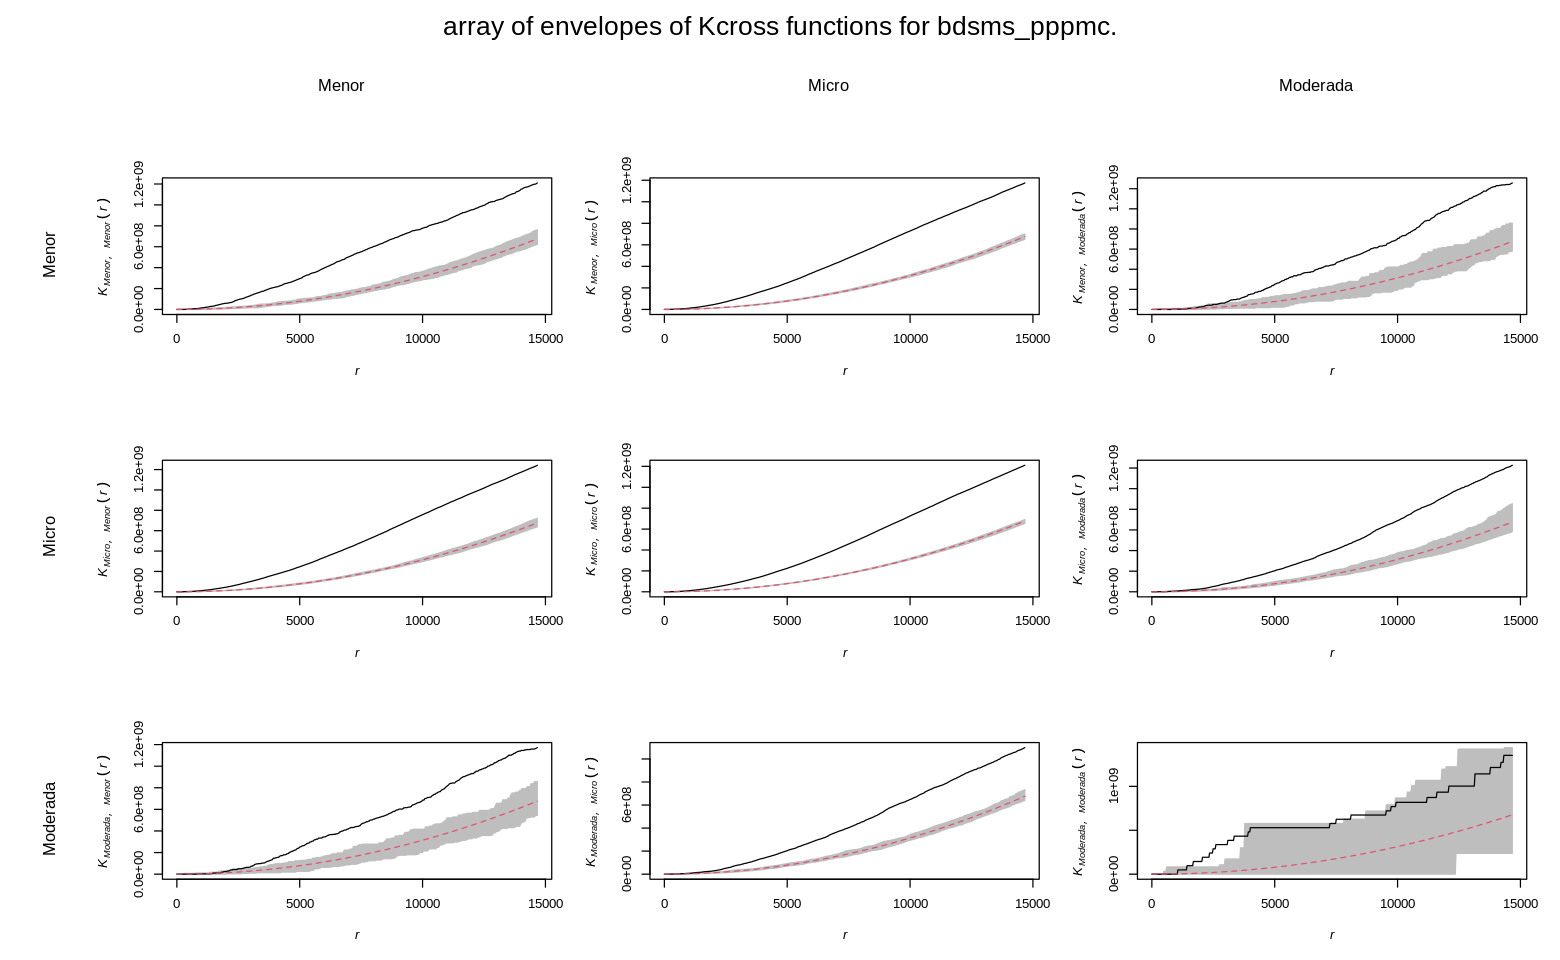

In [ ]:
plot(Kenvmc)

**Correlaciones**

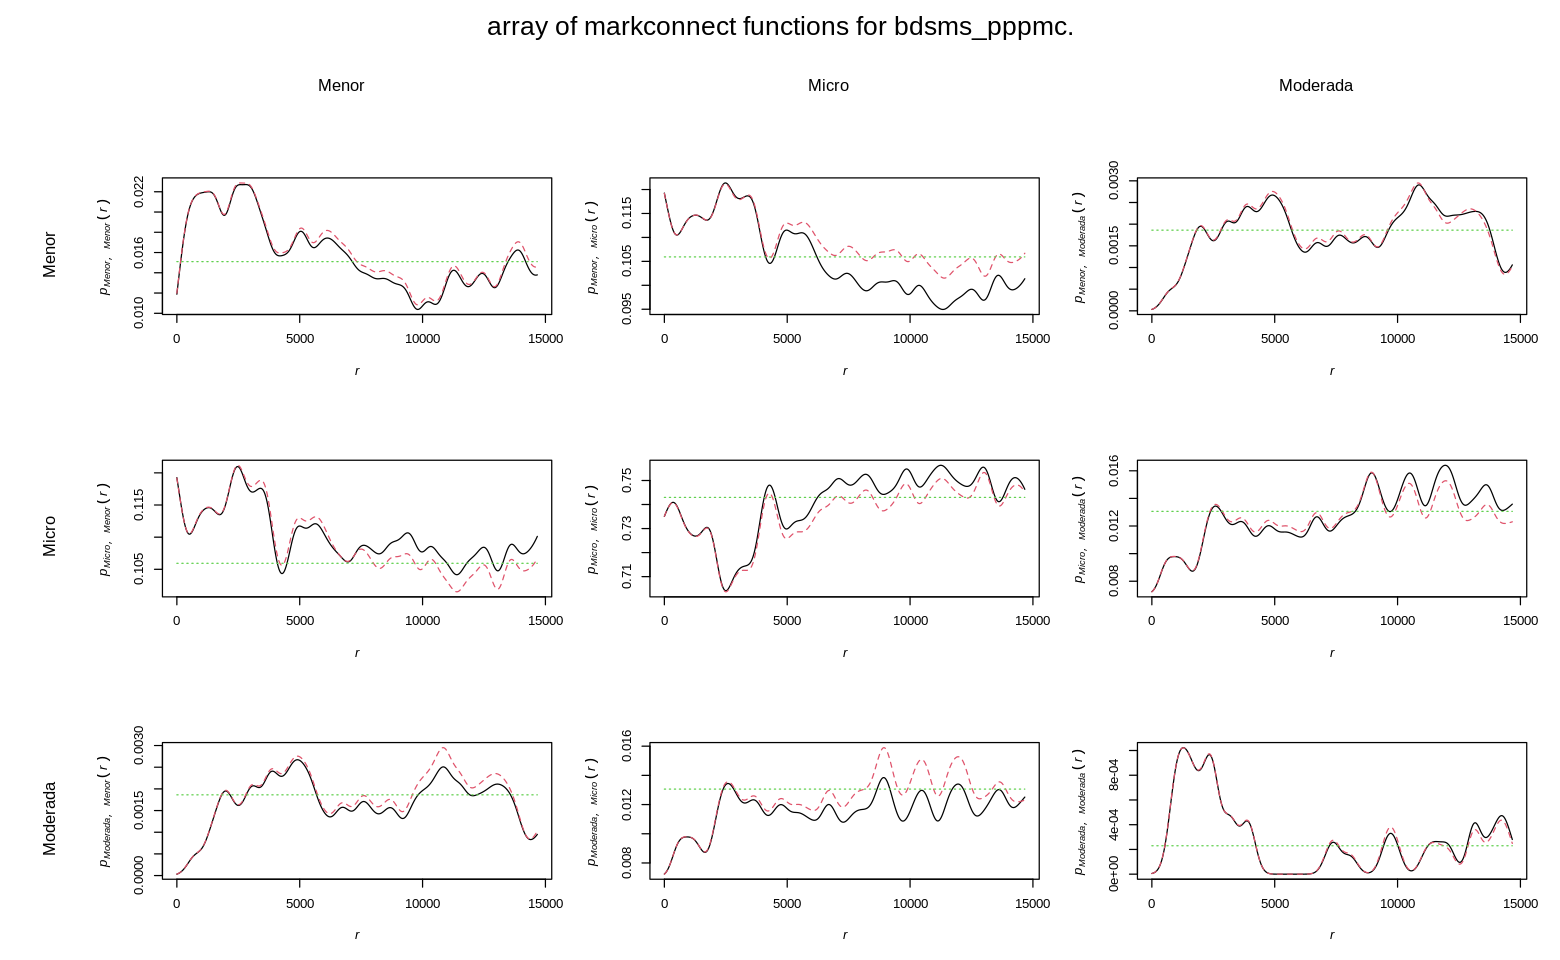

In [ ]:
plot(alltypes(bdsms_pppmc, markconnect))

Las líneas discontinuas horizontales muestran los valores de referencia $p_ip_j$ que se esperarían en condiciones aleatorias. Esto muestra que es más probable que dos puntos que se encuentran muy juntos sean de diferentes tipos,
de lo que esperaríamos bajo un etiquetado aleatorio. Aunque esto podría denominarse una asociación positiva entre las celdas de diferentes tipos, no necesariamente indica dependencia entre las celdas tipos. También podría explicarse como un artefacto de la asociación negativa entre células del mismo
tipo.

## Marcas Continuas

In [ ]:
bdsms_pppm = ppp(x = bdsms_ct$X, y = bdsms_ct$Y, marks = bdsms_ct$Magnitud, window = window)
Qm = quadratcount(bdsms_pppm, nx = 5, ny = 4, method="Chisq")

Warning message:
“data contain duplicated points”


### Frecuencia

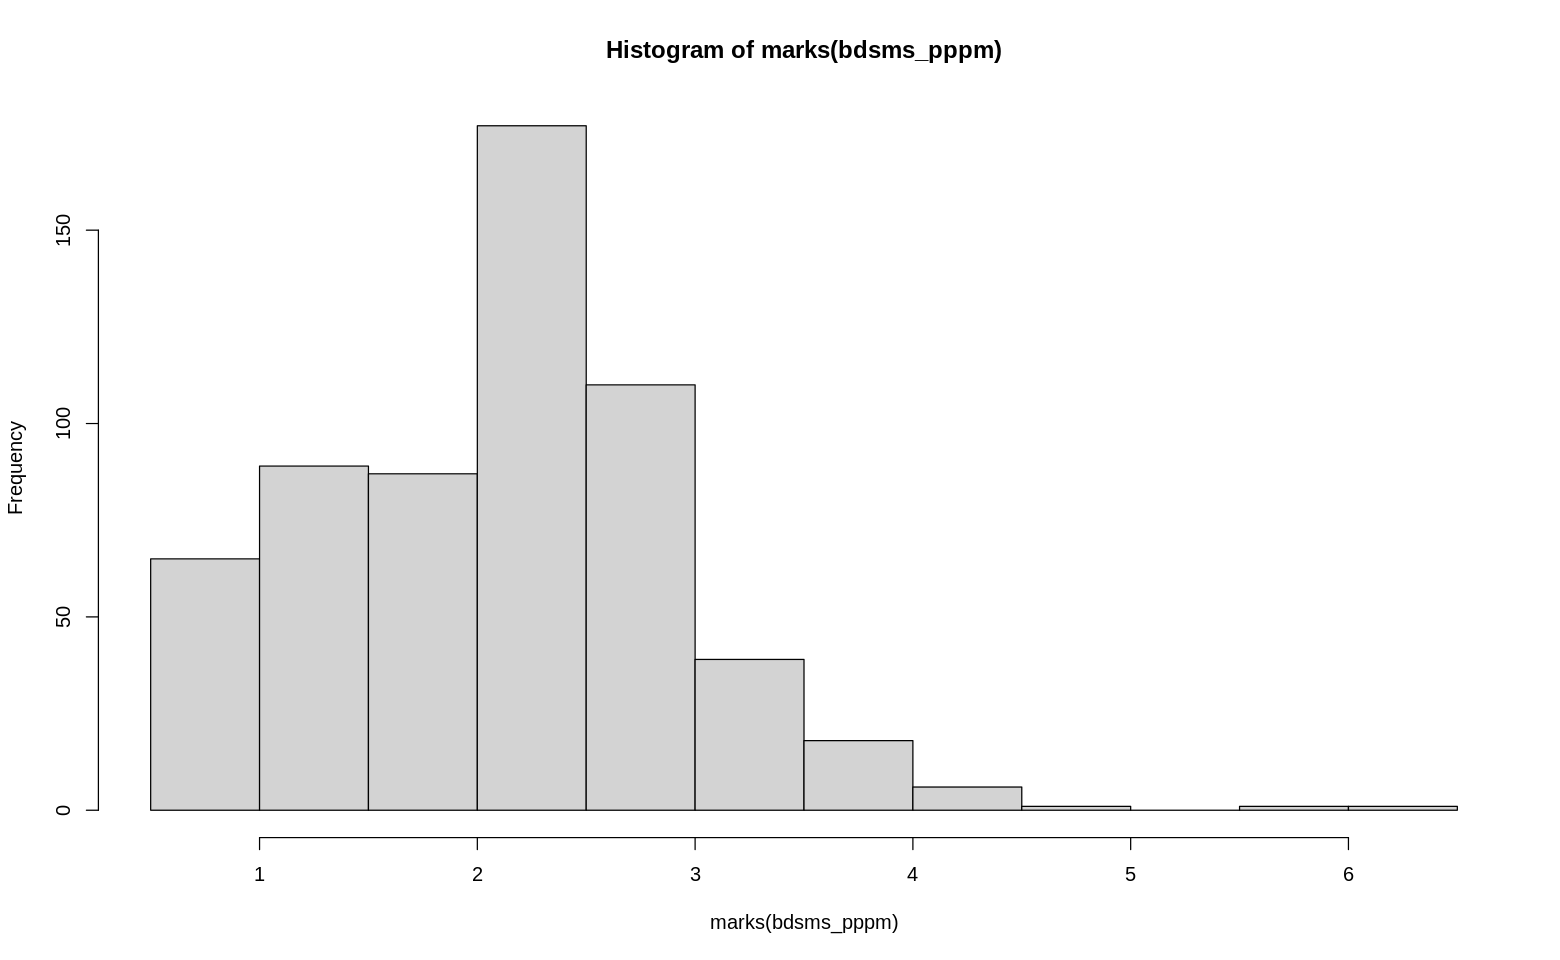

In [ ]:
hist(marks(bdsms_pppm))

Del anterior histograma podemos concluir que los sismos ocurren en su mayoria con una magnitud entre 2 y 3 Ml

Realiza suavizado espacial de valores numéricos observados en un conjunto de ubicaciones irregulares. Utiliza suavizado de kernel y selección de ancho de banda con validación cruzada de mínimos cuadrados.

Warning message:
“Least Squares Cross-Validation criterion was minimised at right-hand end of interval [122, 2290]; use arguments ‘hmin’, ‘hmax’ to specify a wider interval for bandwidth ‘sigma’”


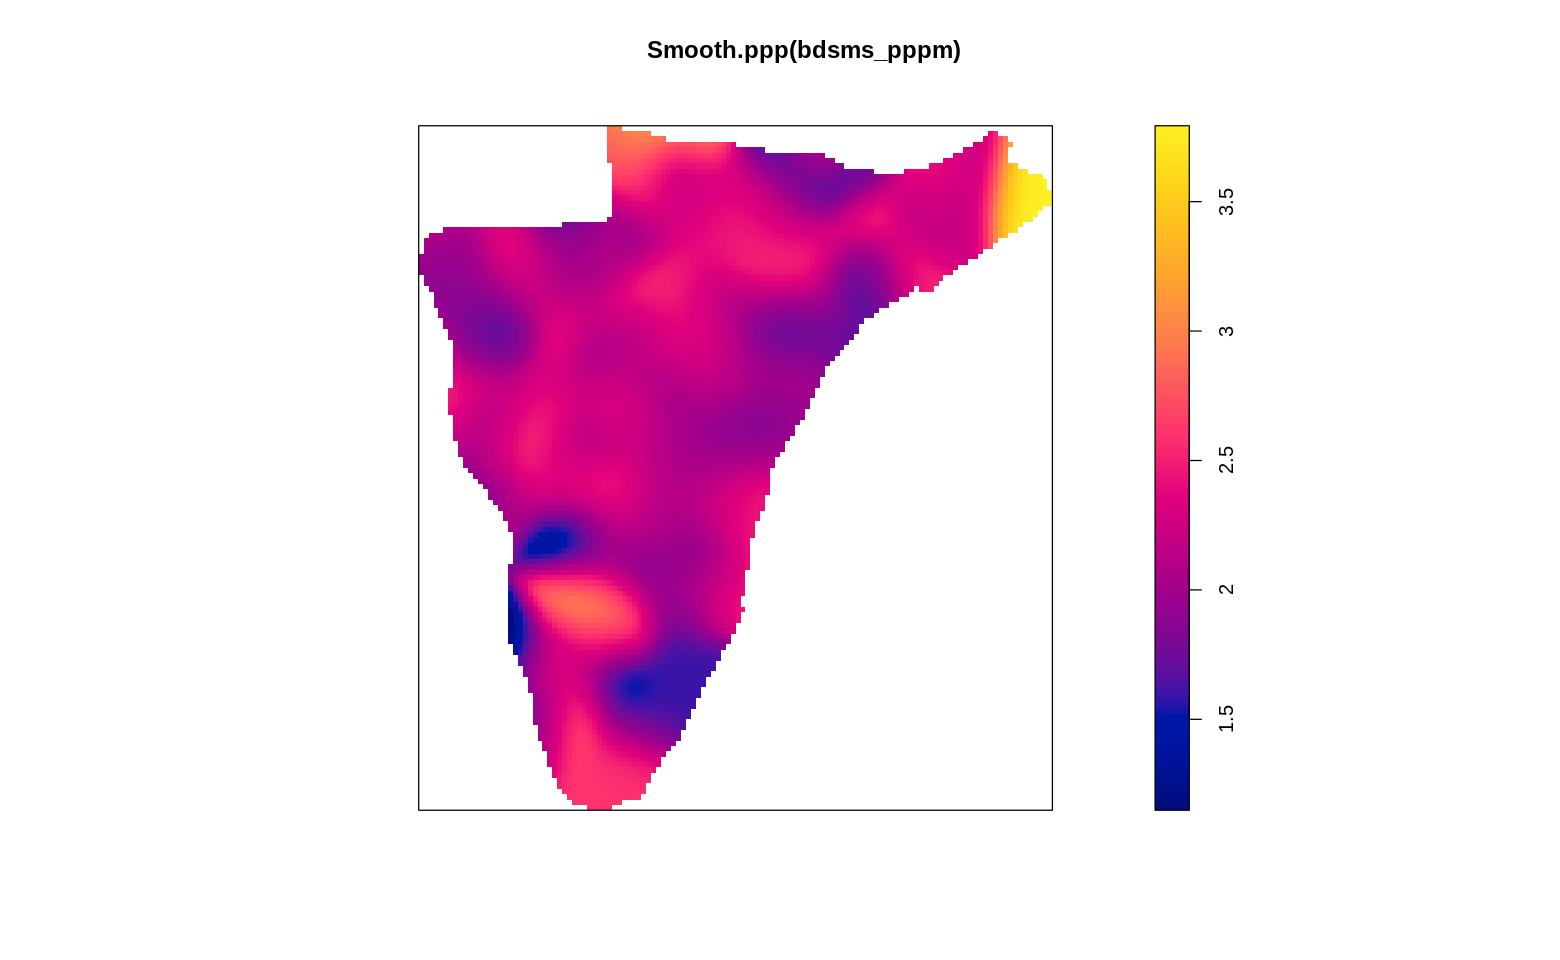

In [ ]:
plot(Smooth.ppp(bdsms_pppm))

El anterior grafico muestra las mayores magnitudes se encuentran en noroccidente y centro - sur del departamento

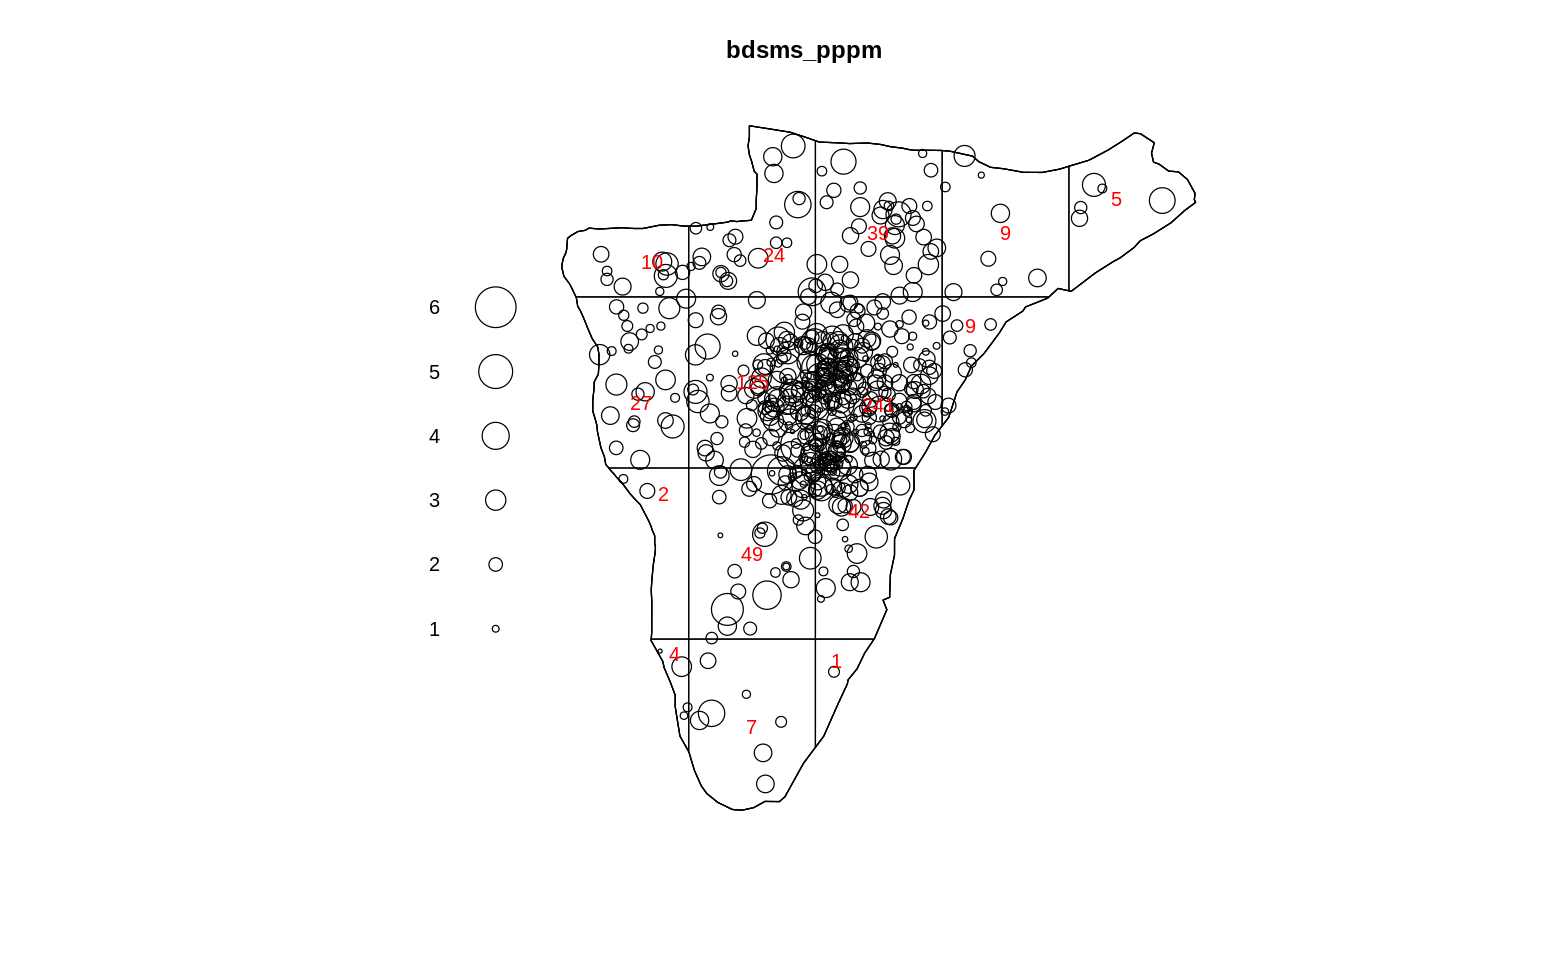

In [ ]:
options(repr.plot.width=13, repr.plot.height=8)
plot(bdsms_pppm)
plot(Qm, add=TRUE, col = "Red") 

### Intensidad

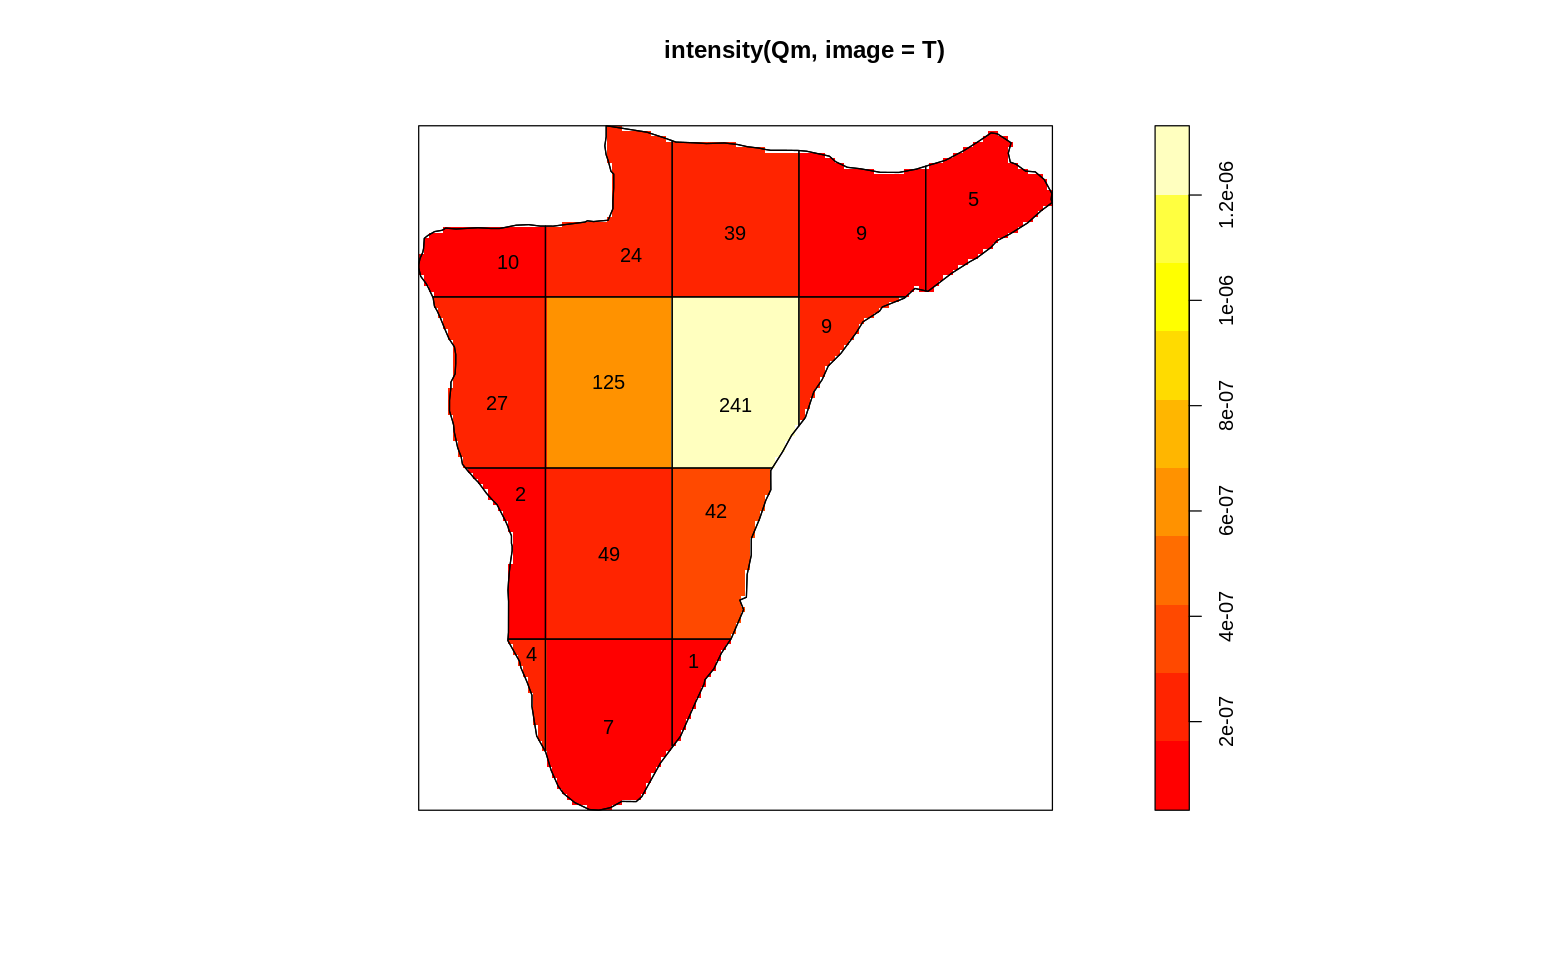

In [ ]:
plot(intensity(Qm, image = T ), col = heat.colors(10))
plot(Qm, add = T)

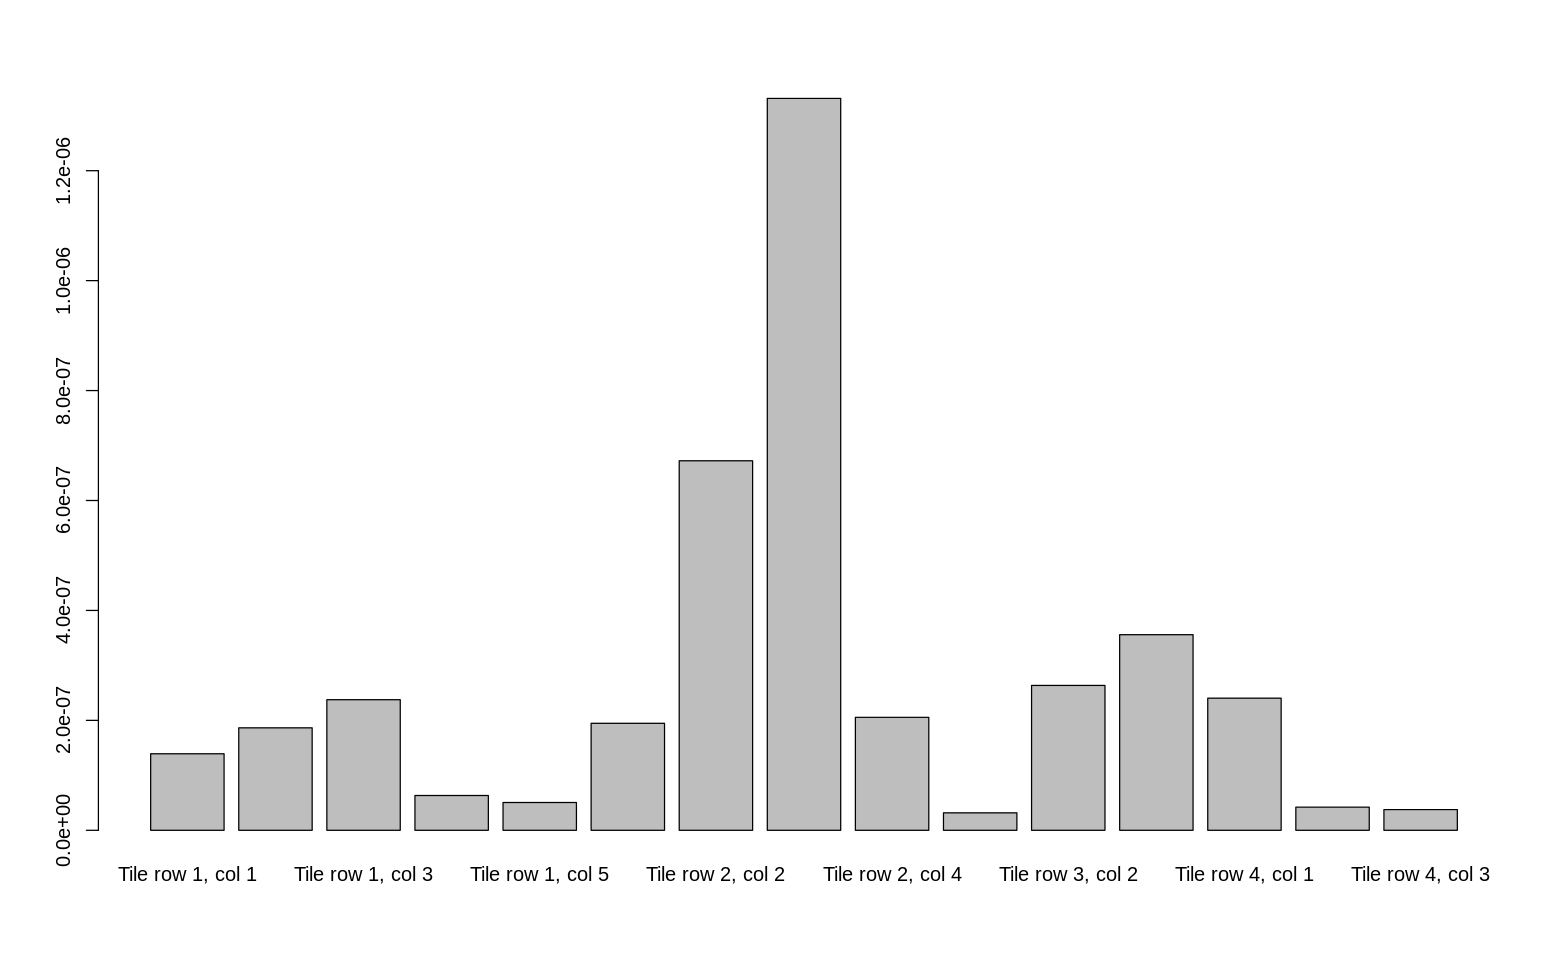

In [ ]:
intensity.qm = intensity(Qm)
barplot(intensity.qm)

La estimacion del error estandar para la intensidad estimada por cuadrante

In [ ]:
sqrt(intensity.qm/area(Window(Qm)))

tile
Tile row 1, col 1 Tile row 1, col 2 Tile row 1, col 3 Tile row 1, col 4 
     8.964998e-09      1.037366e-08      1.171188e-08      6.042961e-09 
Tile row 1, col 5 Tile row 2, col 1 Tile row 2, col 2 Tile row 2, col 3 
     5.400362e-09      1.059975e-08      1.970044e-08      2.772639e-08 
Tile row 2, col 4 Tile row 3, col 1 Tile row 3, col 2 Tile row 3, col 3 
     1.089221e-08      4.279799e-09      1.233443e-08      1.433383e-08 
Tile row 4, col 1 Tile row 4, col 2 Tile row 4, col 3 
     1.177929e-08      4.930581e-09      4.660068e-09 

### Analisis basado en densidad con marcas



Si el proceso puntual tiene una funcion de intensidad $\lambda$(u), esta se puede estimar con metodos no parametricos con la estimación kernel donde la siguiente expresión representa la correción del sesgo por el efecto de los bordes.

$$
e(u) =\int_W k(u−v)dv
$$

para el kernel uniformemente corregido 

$$
\hat \lambda^{(U)}(u)= \frac{1}{e(u)} \sum^n_{i=1} k(u−x_i)
$$

La desviación estandar del kernel es el ancho de banda de suavidad, entre mas largo más suave es el kernel. El ancho de banda se especifica con **sigma**, cuyo valor por defecto es igual a 1/8 del lado más corto del rectangulo en que se encuentra (circundante)


Utiliza la validación cruzada de verosimilitud para seleccionar un ancho de banda de suavizado para la estimación del kernel de la intensidad del proceso puntual.

   sigma 
2442.385 


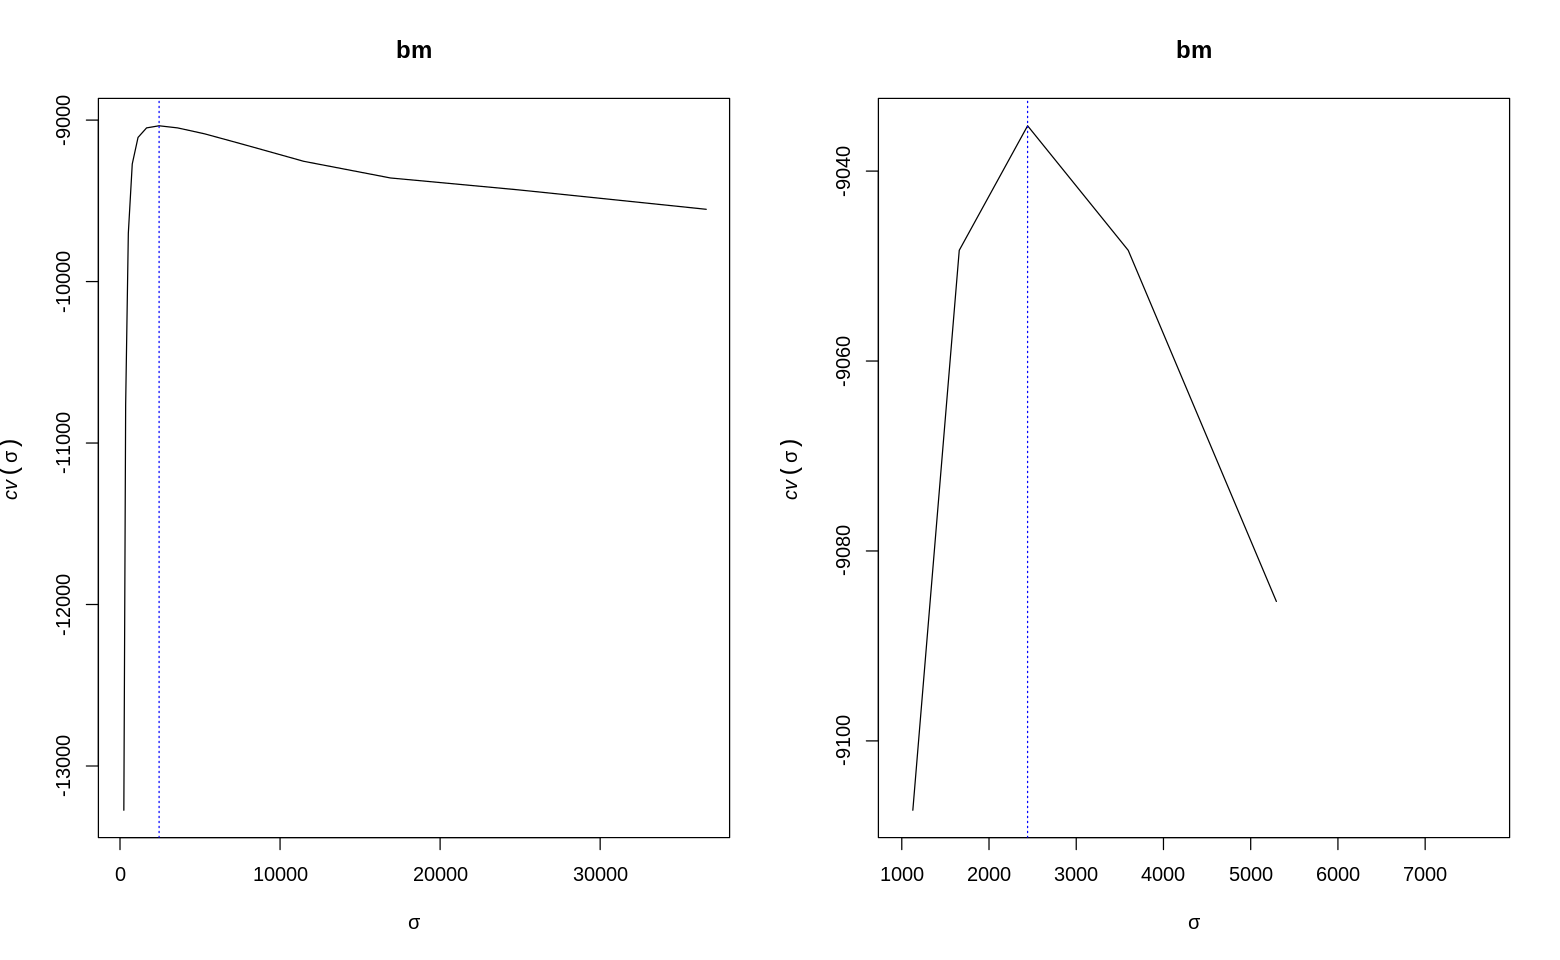

In [ ]:
bm=bw.ppl(bdsms_pppm) 
print(bm)
par(mfrow=c(1,2)) 
plot(bm)
plot(bm, xlim=c(1000,7700))

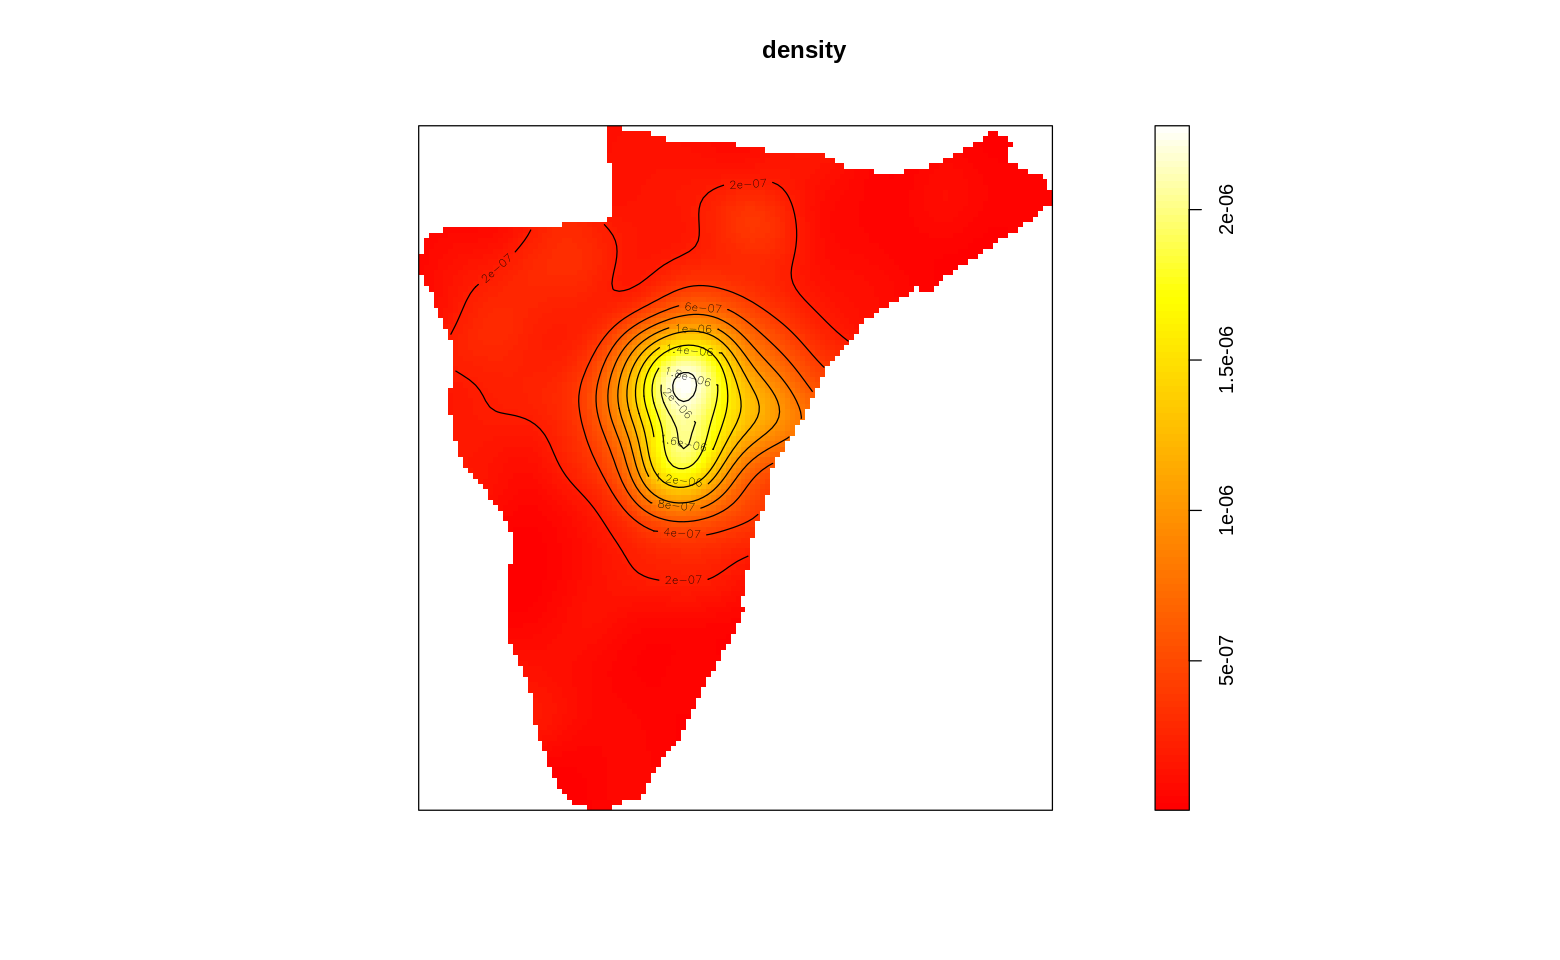

In [ ]:
dsm = density(bdsms_pppm, sigma = 2442.385) 
plot(dsm, main = 'density', col = heat.colors(100))
contour(dsm, add = TRUE)

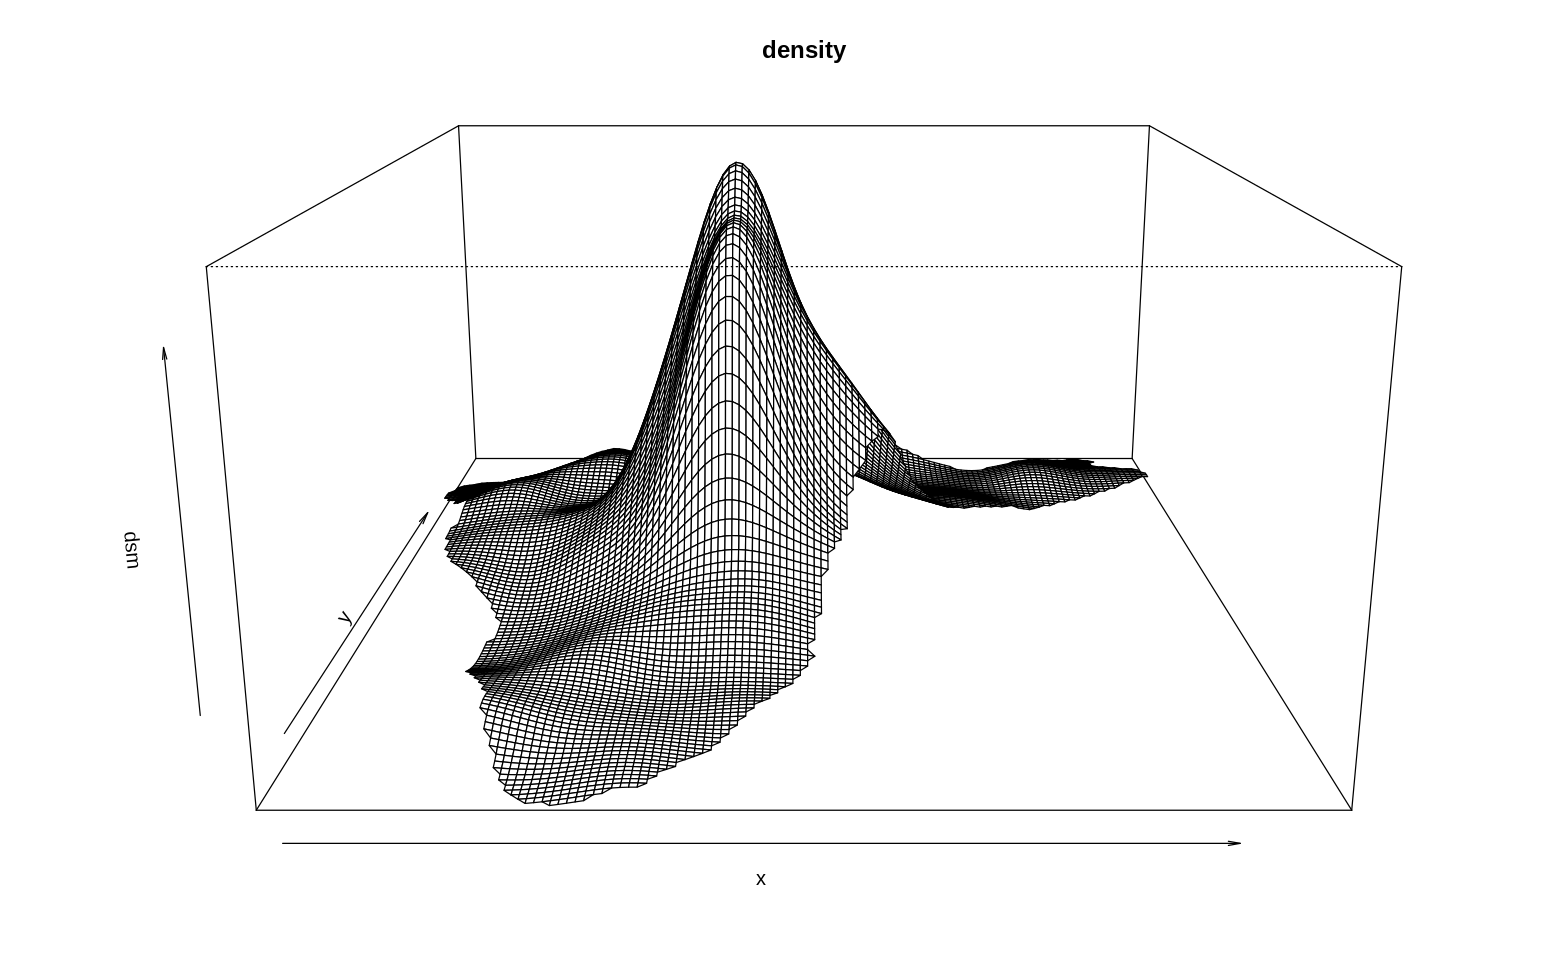

In [ ]:
persp(dsm, main = "density")

De los gráficos anteriores vemos que un ancho de banda mayor a 2000 kilometros podría ser adecuado, más particularmente seria util tomar un ancho de banda entre 1000 y 6000 kilometros

#### El algoritmo de diggle

El algoritmo de diggle, elige automaticamente el ancho de banda que minimiza el error cuadrático medio. El kernel de Diggle es

$$
\hat \lambda^{(U)}(u)= \sum^n_{i=1} \frac{1}{e(x_i)} k(u−x_i)
$$

con

$$
e(x_i) =\int_W k(x_i−v)dv
$$


Utiliza la validación cruzada para seleccionar un ancho de banda de suavizado para la estimación del kernel de la intensidad del proceso puntual

In [ ]:
opt_bwm = bw.diggle(bdsms_pppm) 
print(opt_bwm)
opt_dsm = density(bdsms_pppm, sigma=opt_bwm)

   sigma 
1392.374 


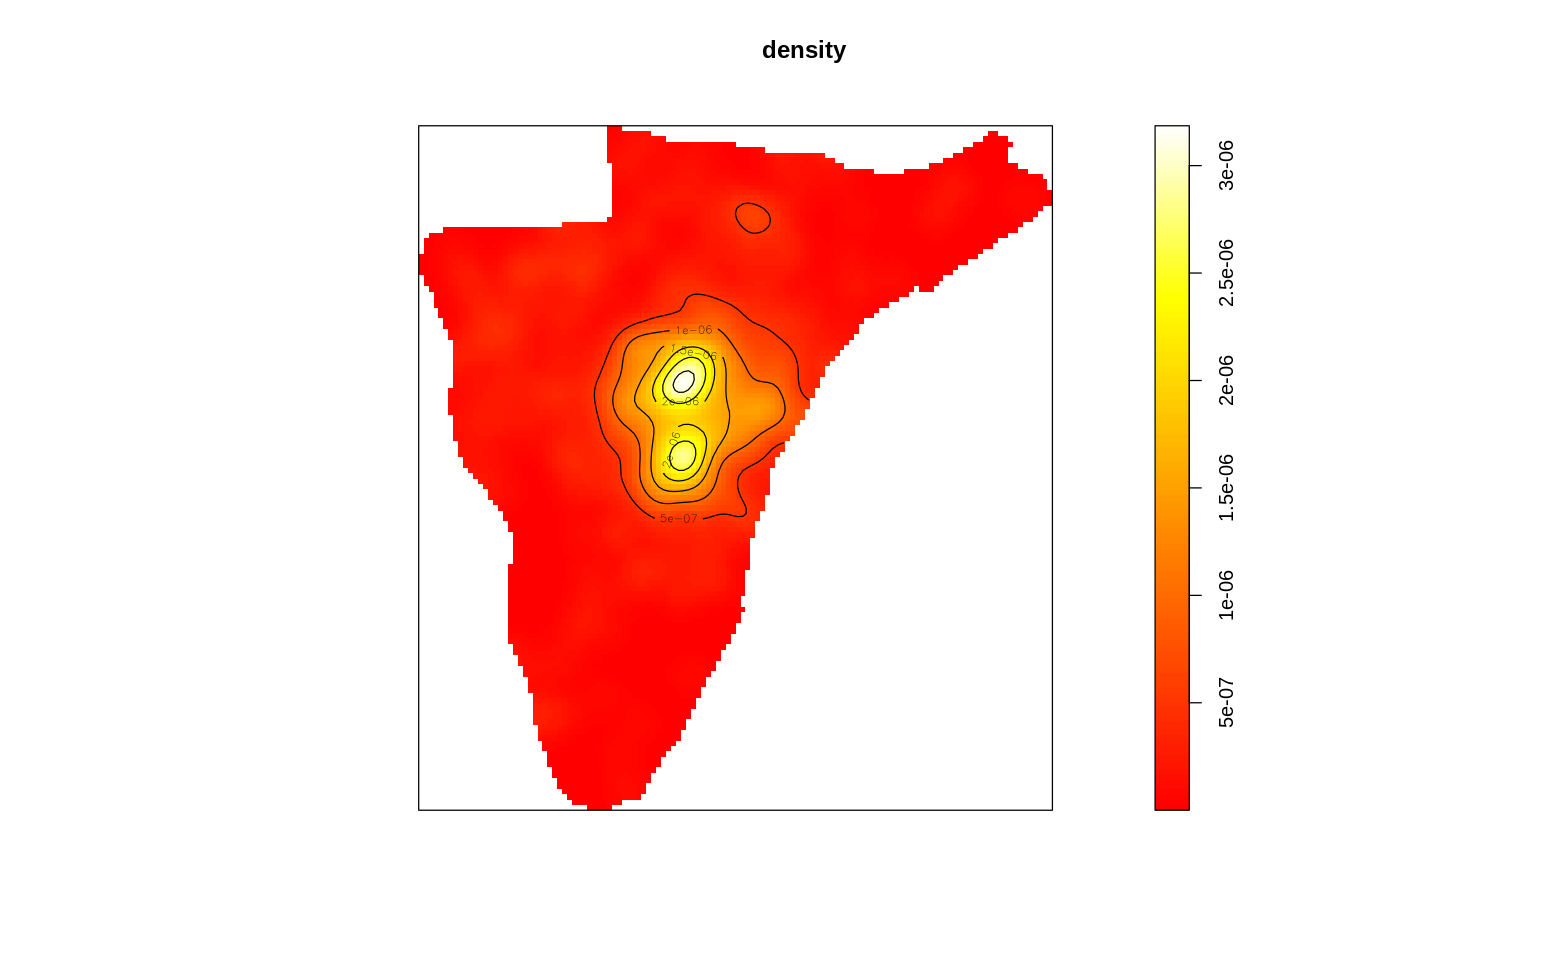

In [ ]:
plot(opt_dsm, Add=TRUE, main='density', col = heat.colors(100))
contour(opt_dsm, add = TRUE)

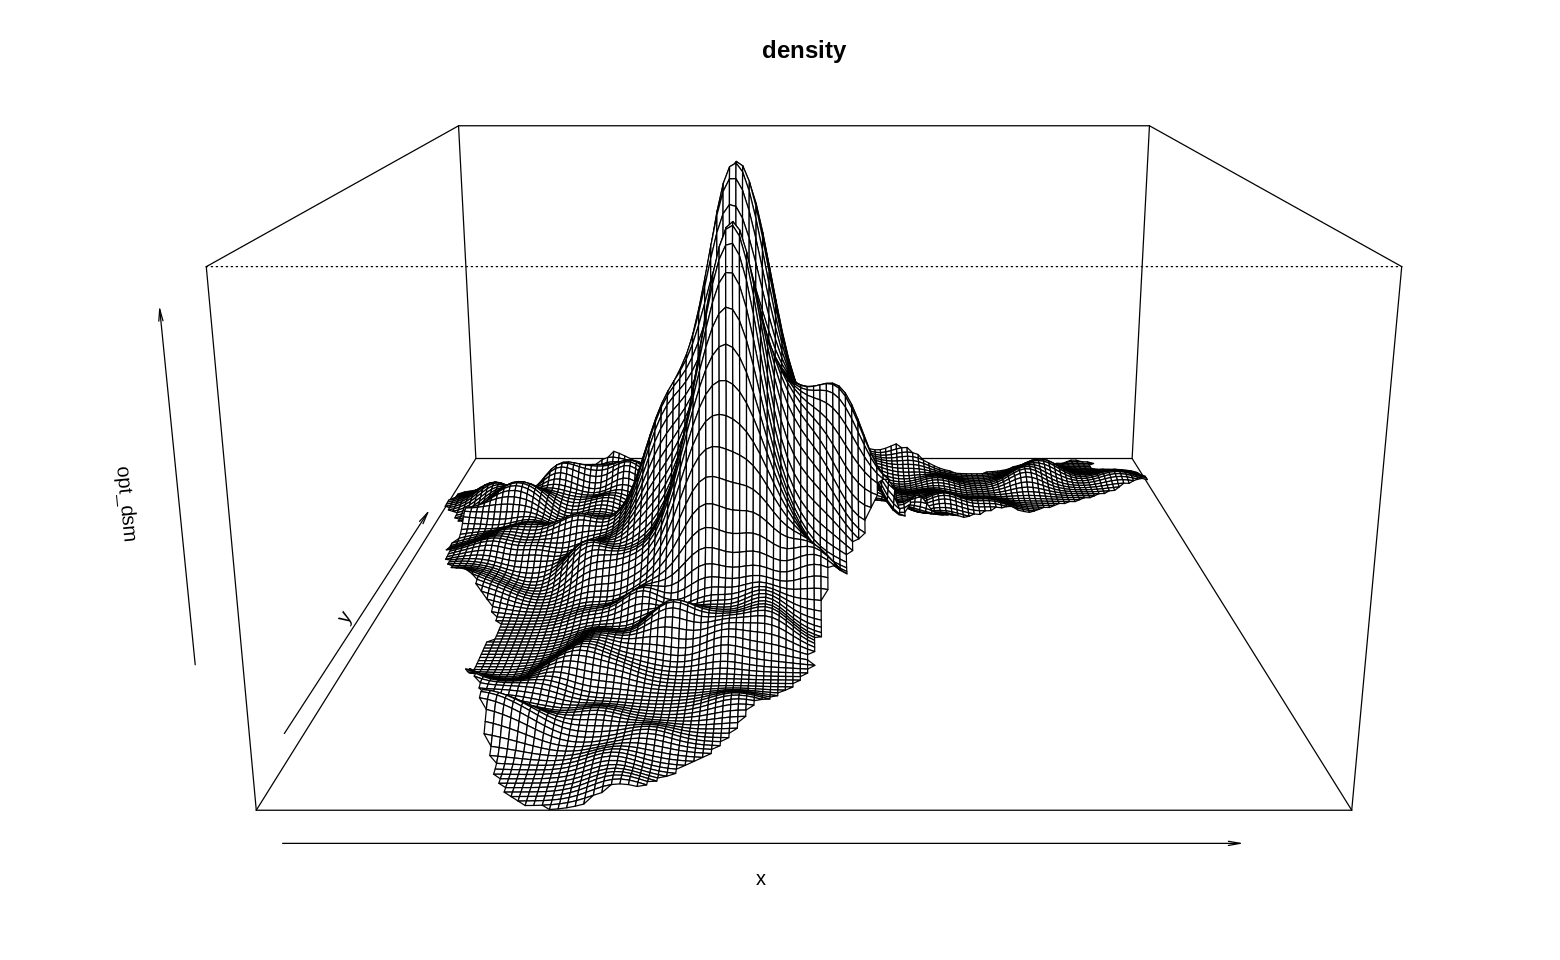

In [ ]:
persp(opt_dsm, main = "density")

Desviacion estandar, podemos ver que es más oscura en la parte inferior y superior derecha

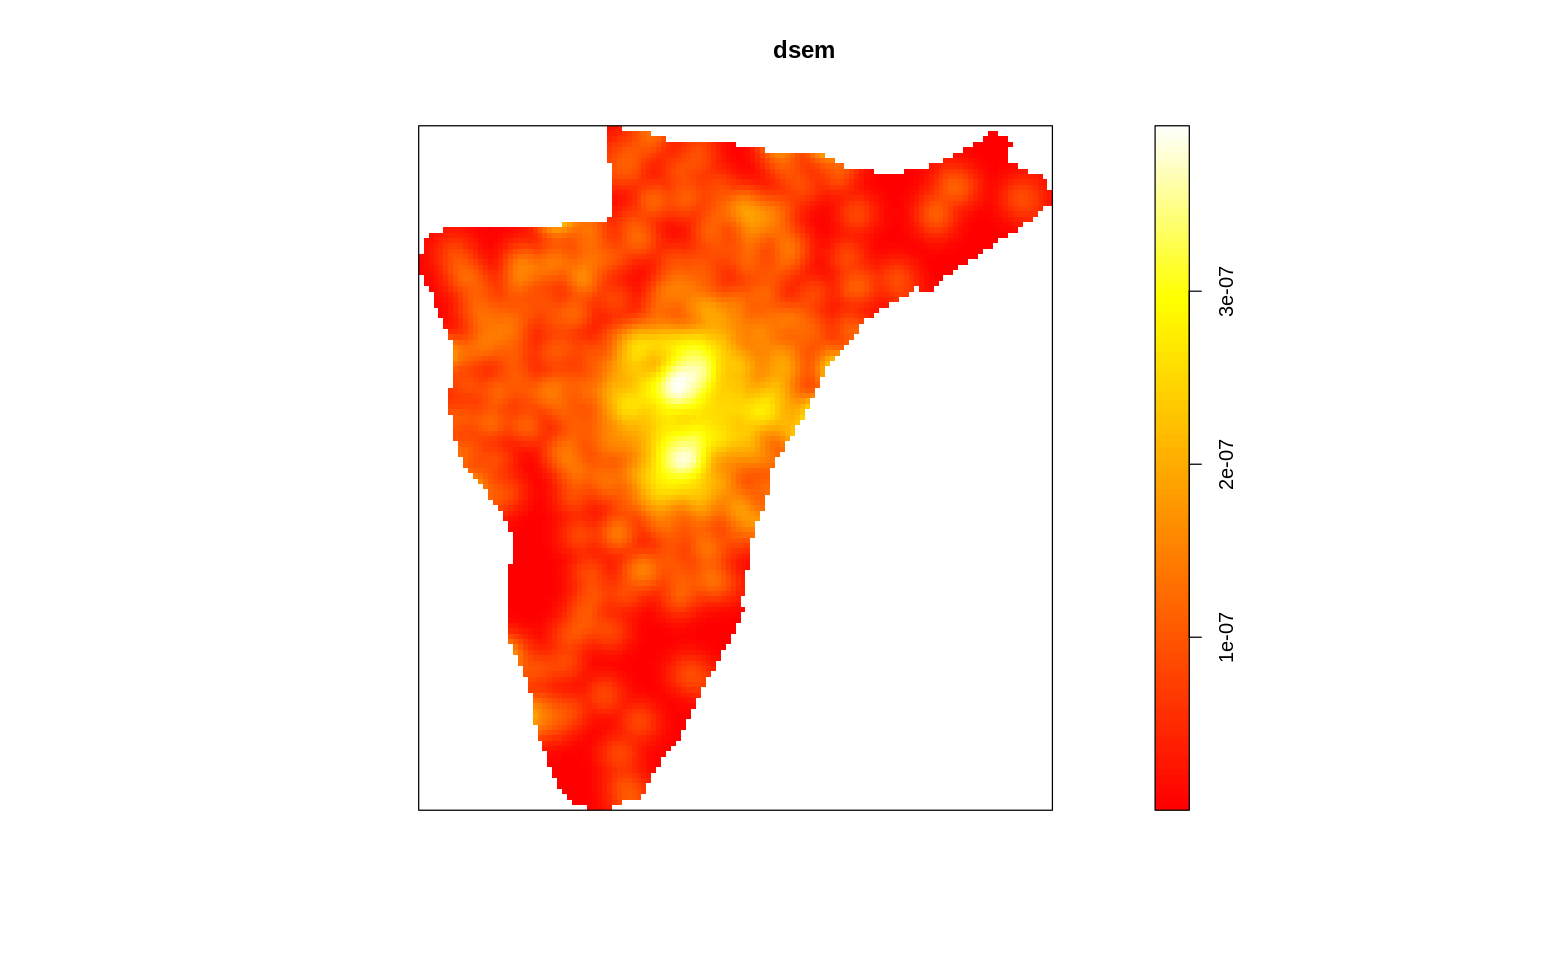

In [ ]:
dsem = density(bdsms_pppm, sigma=opt_bw, se=TRUE)$SE
plot(dsem, col = heat.colors(100))

### Pruebas de homogeneidad con marcas

Las caracterı́sticas de un proceso puntual se resumen utilizando dos tipos de medidas:

- Estadísticas de primer orden, que se refiere a la media del proceso

- La estadística de segundo orden, que describe la correlación espacial


#### Prueba chi cuadrado

El p-valor es apenas mayor que cero, así que rechazamos la hipótesis nula de que la intensidad sea igual para todos los cuadrantes. En el gráfico se ve a la izquierda el conteo de las observaciones, a la derecha el valor esperado de conteo y en el medio los residuales de pearson.


	Chi-squared test of CSR using quadrat counts

data:  bdsms_pppm
X2 = 739.1, df = 14, p-value < 2.2e-16
alternative hypothesis: two.sided

Quadrats: 15 tiles (irregular windows)

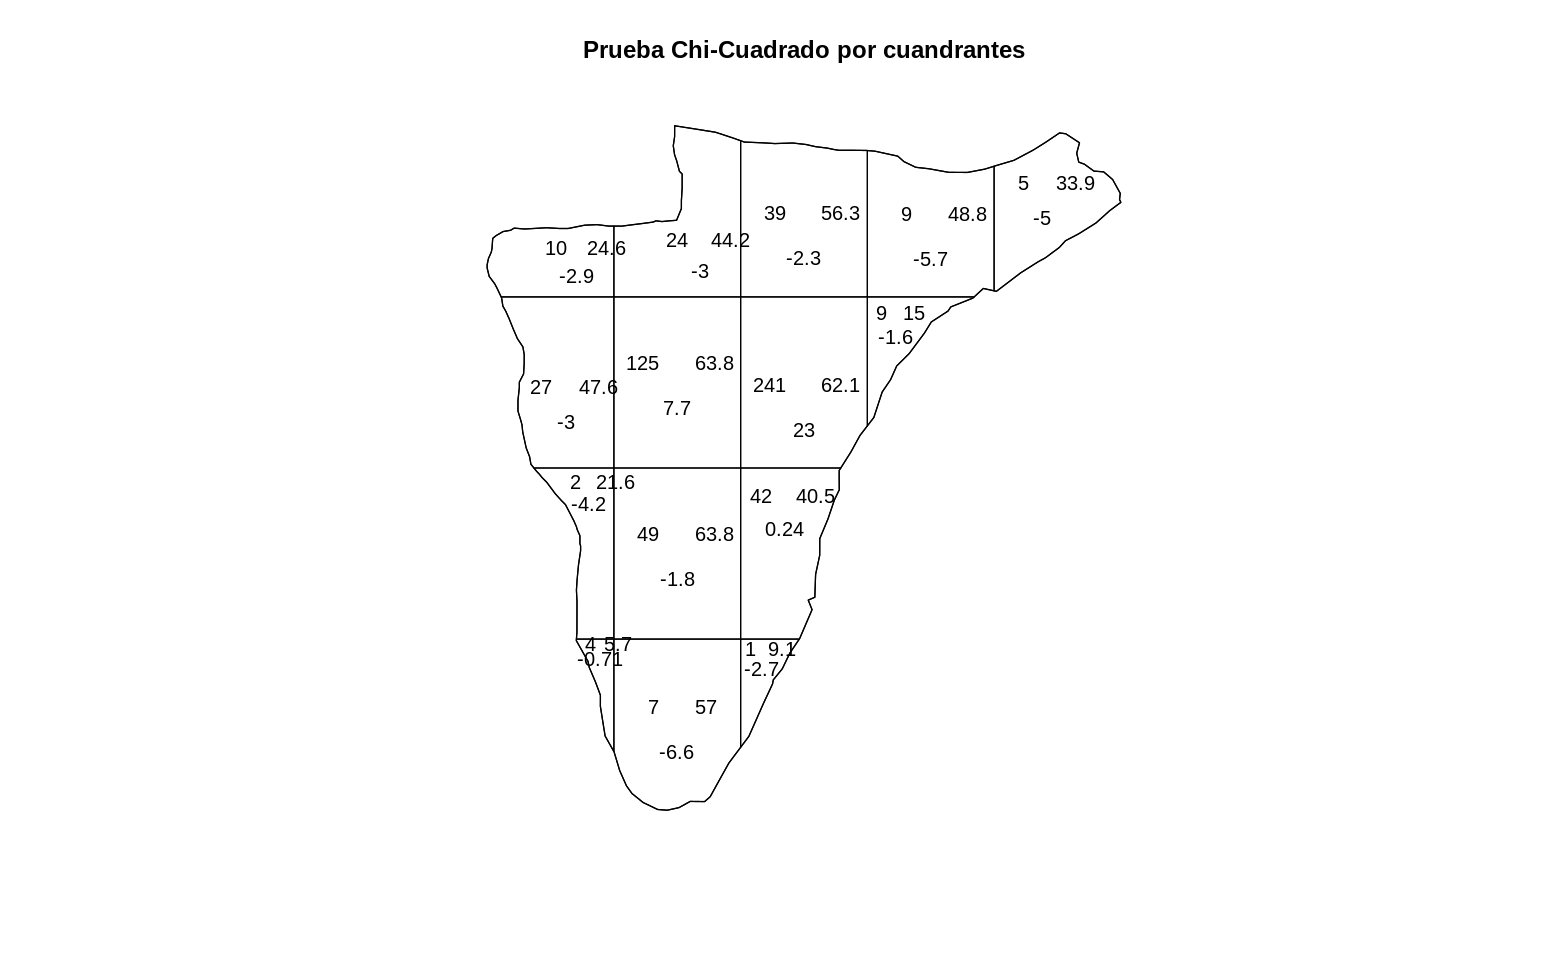

In [ ]:
qtest.Qm = quadrat.test(bdsms_pppm, nx = 5, ny = 4, method="Chisq")
plot.quadrattest(qtest.Qm, main = "Prueba Chi-Cuadrado por cuandrantes")
qtest.Qm

#### Prueba MonteCarlo

Dado que solo en unos pocos casos se conoce la distribución de los estadı́sticos de prueba, ası́ como de la gran cantidad de combinaciones que requieren las pruebas basadas en distancias lo cual las hace en ocasiones  imposibles de llevar a cabo, y por lo tanto en la mayorı́a de las ocasiones no
se puede encontrar tampoco la distribución exacta, ası́ se hace necesario este tipo de pruebas que permite realizar inferencia aún ante estos dificultades.



Aquí el p-valor se computa usando simulaciones de monte carlo. Dado que el p-valor es menor que 0.05 entonces rechazamos la hipótesis nula de que la intensidad sea igual para todos los cuadrantes.


	Conditional Monte Carlo test of CSR using quadrat counts
	Test statistic: Pearson X2 statistic

data:  bdsms_pppm
X2 = 739.1, p-value = 0.001
alternative hypothesis: two.sided

Quadrats: 15 tiles (irregular windows)

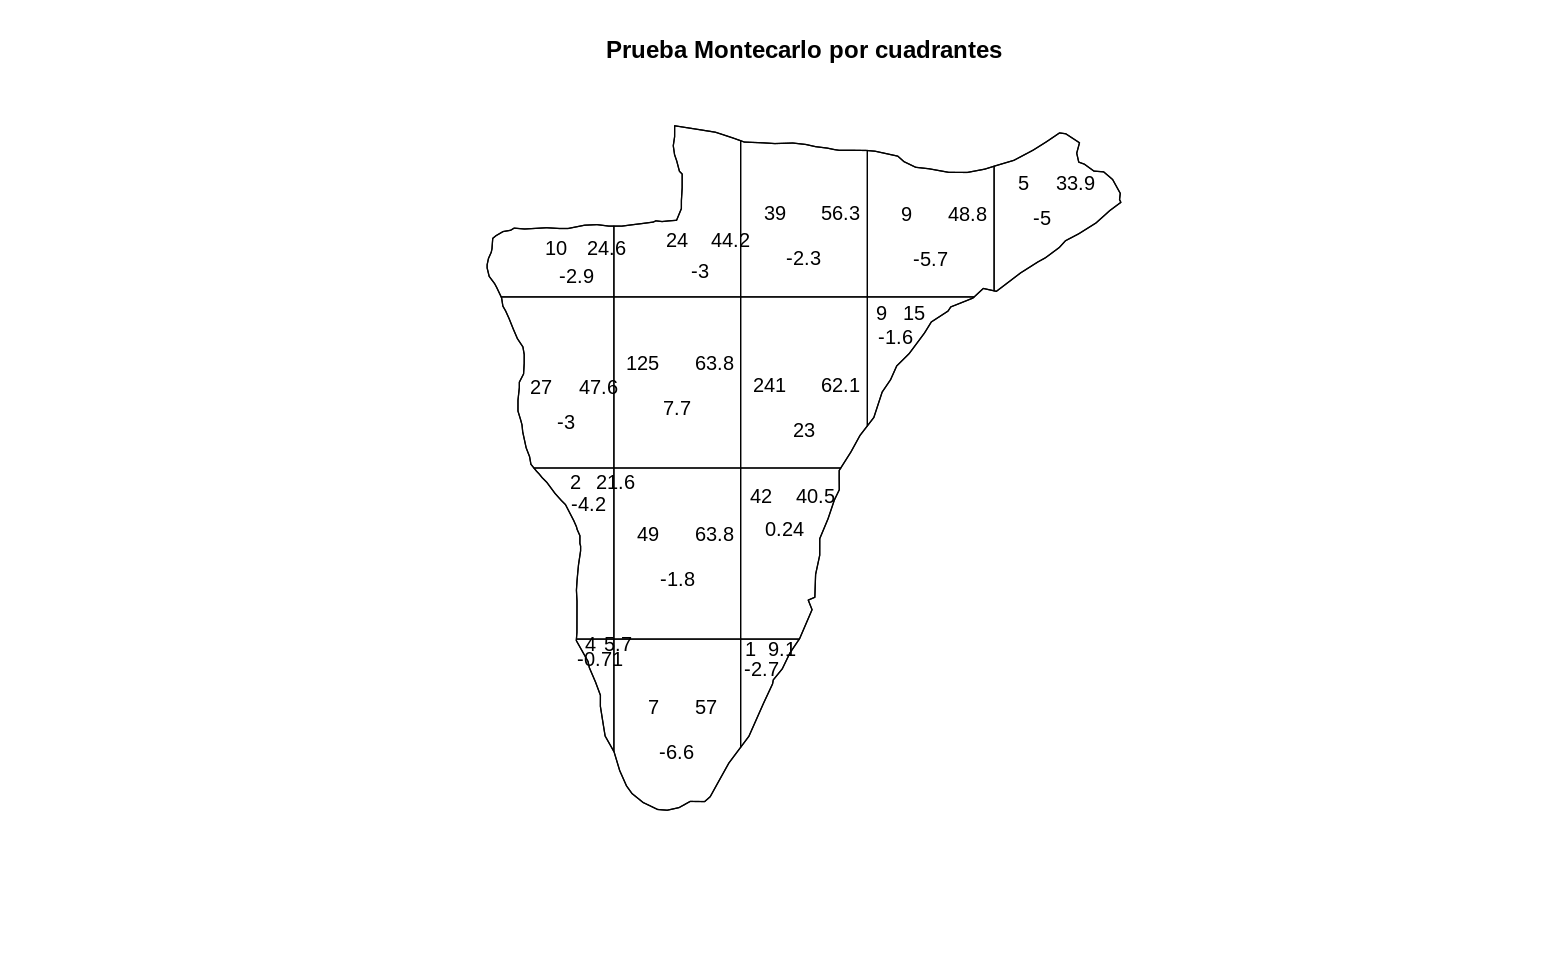

In [ ]:
MCtest.Qm = quadrat.test(bdsms_pppm, nx = 5, ny = 4, method = "MonteCarlo")
plot.quadrattest(MCtest.Qm, main = "Prueba Montecarlo por cuadrantes")
MCtest.Qm

### Pruebas de homogeniedad basadas en distancias con marcas

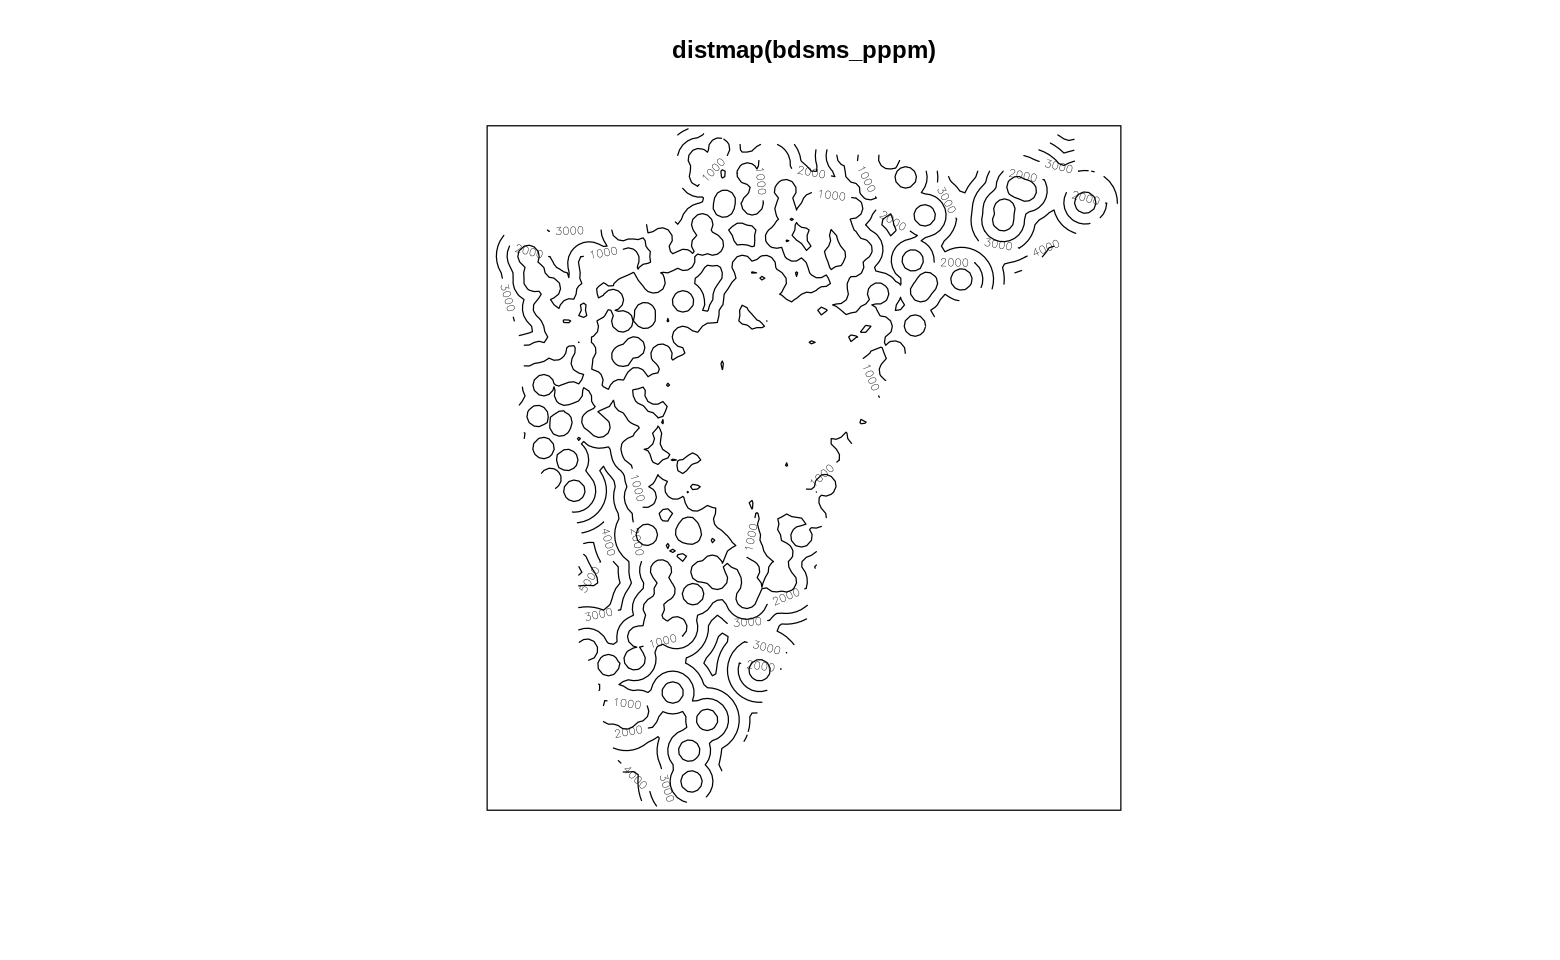

In [ ]:
contour(distmap(bdsms_pppm))

Distancia al vecino más cercano

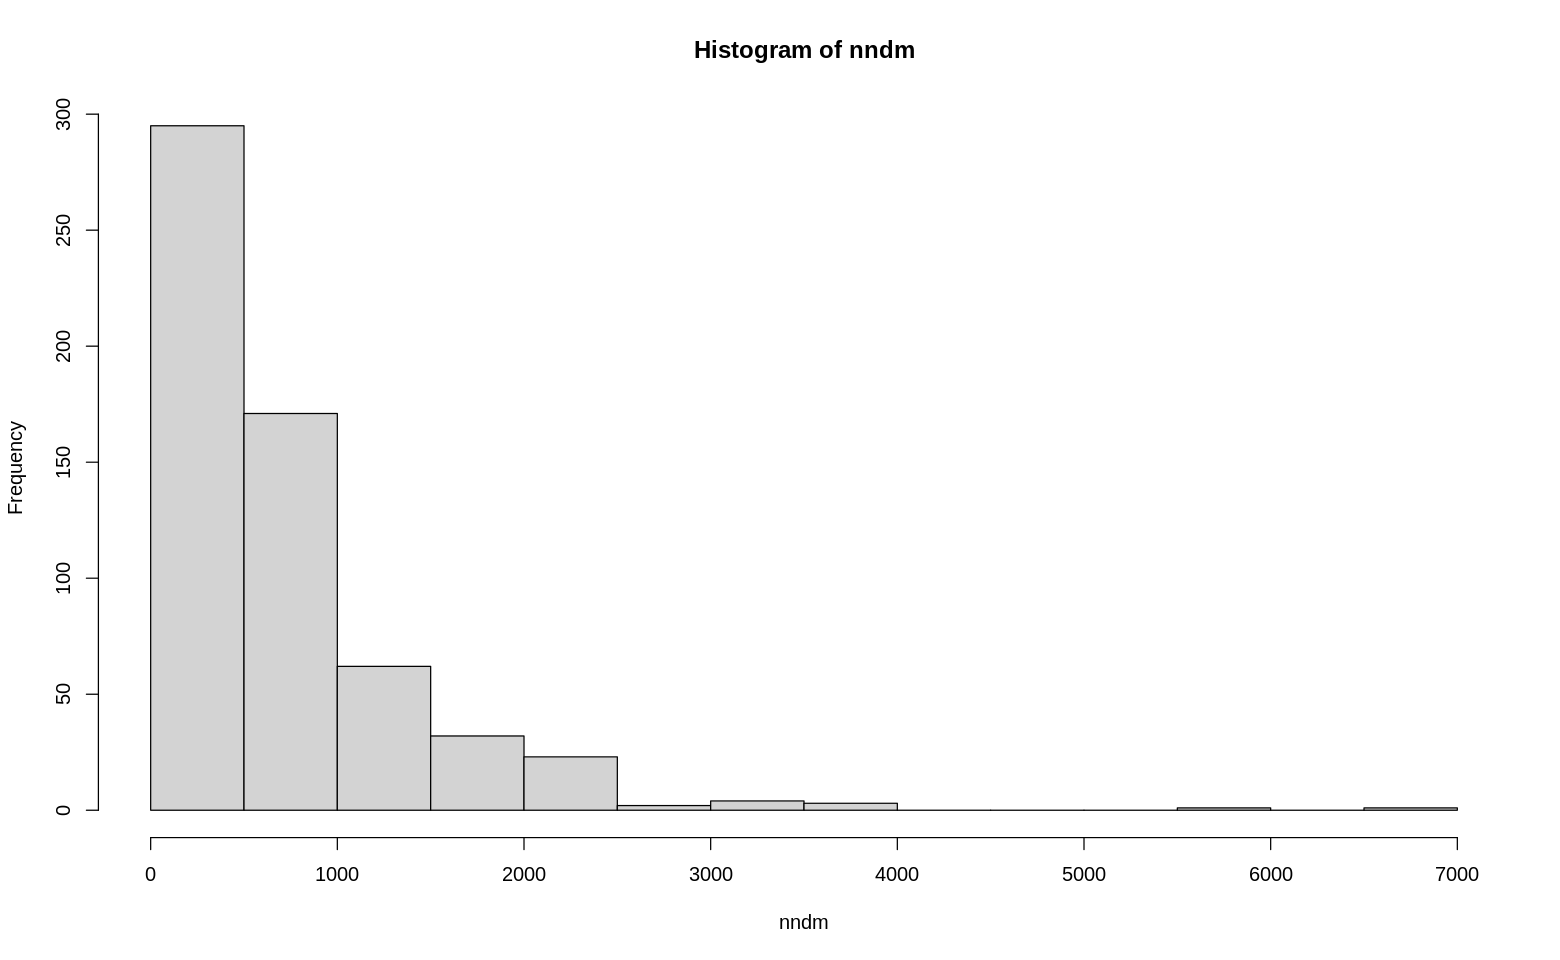

In [ ]:
nndm = nndist.ppp(bdsms_pppm)
hist(nndm)

### Prueba de Clark - Evans

In [ ]:
clarkevans(bdsms_pppm)

naive       cdf 
0.8530458 0.7780494

La prueba de Clark - Evans para CSR propone un promedio de distancias de vecinos más cercanos en una muestra de puntos del patrón para cada punto y lo divide sobre el valor esperado de un proceso completamente aleatorio, el problema con esta prueba es que para procesos no homogeneos R suele ser menor a 1 y puede producir una significancia falsa. Esta prueba asume que el proceso puntual es estacionario. 

Como R < 1 sugiere un comportamiento agregado. Por otro lado, para la prueba de Clark - Evans con correción cdf, se rechaza la hipotesis nula de un proceso espacial completamente aleatorio. Para la prueba sin correcion tambien se rechaza. Sin embargo, es necesario hacer la correción.

In [ ]:
clarkevans.test(bdsms_pppm, correction="cdf", alternative="clustered")


	Clark-Evans test
	CDF correction
	Monte Carlo test based on 999 simulations of CSR with fixed n

data:  bdsms_pppm
R = 0.77805, p-value = 0.001
alternative hypothesis: clustered (R < 1)


In [ ]:
clarkevans.test(bdsms_pppm, correction="none", alternative="clustered")


	Clark-Evans test
	No edge correction
	Z-test

data:  bdsms_pppm
R = 0.85305, p-value = 3.647e-12
alternative hypothesis: clustered (R < 1)


### Hopkins-Skellam

El indice Hopkins-Skellam es menos sensible que el Clark Evans a problemas como el sesgo del efecto de borde y la no homogeneidad espacial.

In [ ]:
hopskel(bdsms_pppm)

[1] 0.3054202

Para la prueba de Hopkins-Skellam rechazamos la hipótesis nula de tener un proceso CSR.

In [ ]:
hopskel.test(bdsms_pppm, alternative="clustered")


	Hopkins-Skellam test of CSR
	using F distribution

data:  bdsms_pppm
A = 0.31491, p-value < 2.2e-16
alternative hypothesis: clustered (A < 1)


### Estimación para los datos con marcas


Estos estimadores suponen que el proceso puntual es estacionario. Son versiones con corrección de bordes de las funciones de distribución acumulativa empírica de las distancias del vecino más cercano en todos los puntos de datos (para $G$) y las distancias de espacio vacío en una cuadrícula de ubicaciones de prueba (para $F$).

Cada gráfico tiene cuatro curvas, tres estimaciones muy similares de la función usando diferentes correcciones de borde, y la función teórica para una aleatoriedad espacial completa

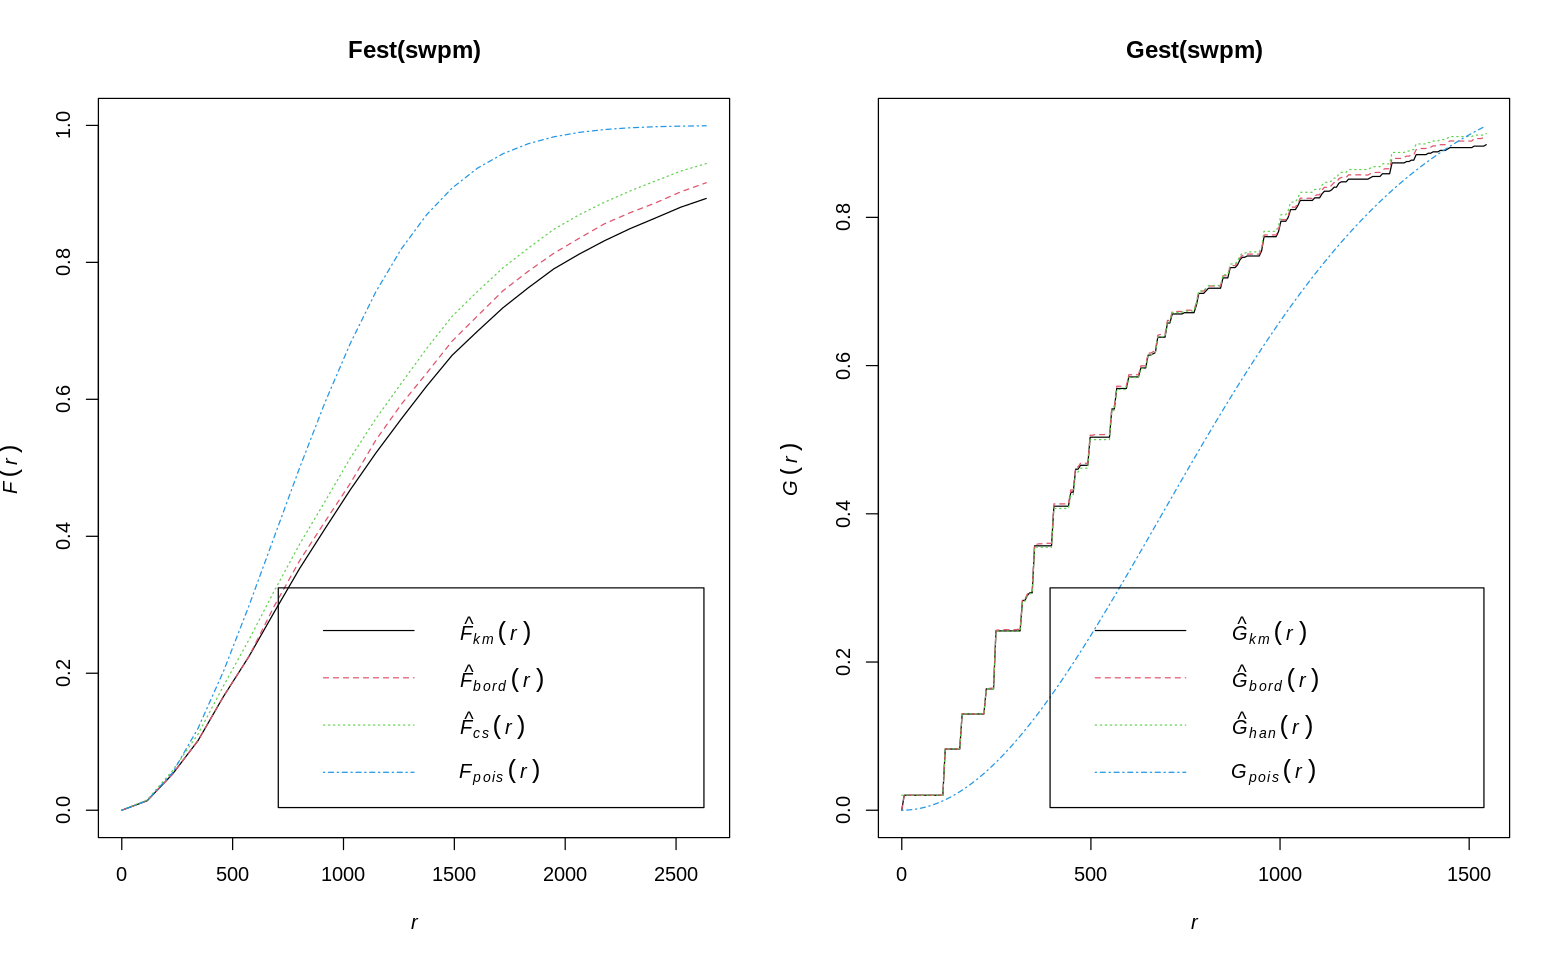

In [ ]:
swpm = rescale(bdsms_pppm)
par(mfrow = c(1,2))
plot(Fest(swpm))
plot(Gest(swpm))

El valor de $\hat{G}$(r) = 0.5 es alcanzado alrededor de $r = 600$, de modo que la media de la distribución de la distancia al vecino más cercano entre los sismos es de unos 600 Kms. Para un proceso completamente aleatorio de la misma intensidad, la distancia media del vecino más cercano sería de unos 750 Kms según el mismo gráfico. Como la función empírica de $G$ es mayor que la teórica implica que las distancias del vecino más cercano en el patrón son más largas en comparación a un proceso de Poisson homogéneo. Por tanto, se confirma que la distribución del patrón es agrupada. 

Con respecto a la función $F$, se pude inferir que los valores empiricos son menores que los teoricos, esto quiere decir, que las distancias de espacio vacio son mayores que las esperadas. Por tanto, se afirma que el patrón presenta agrupamiento. 

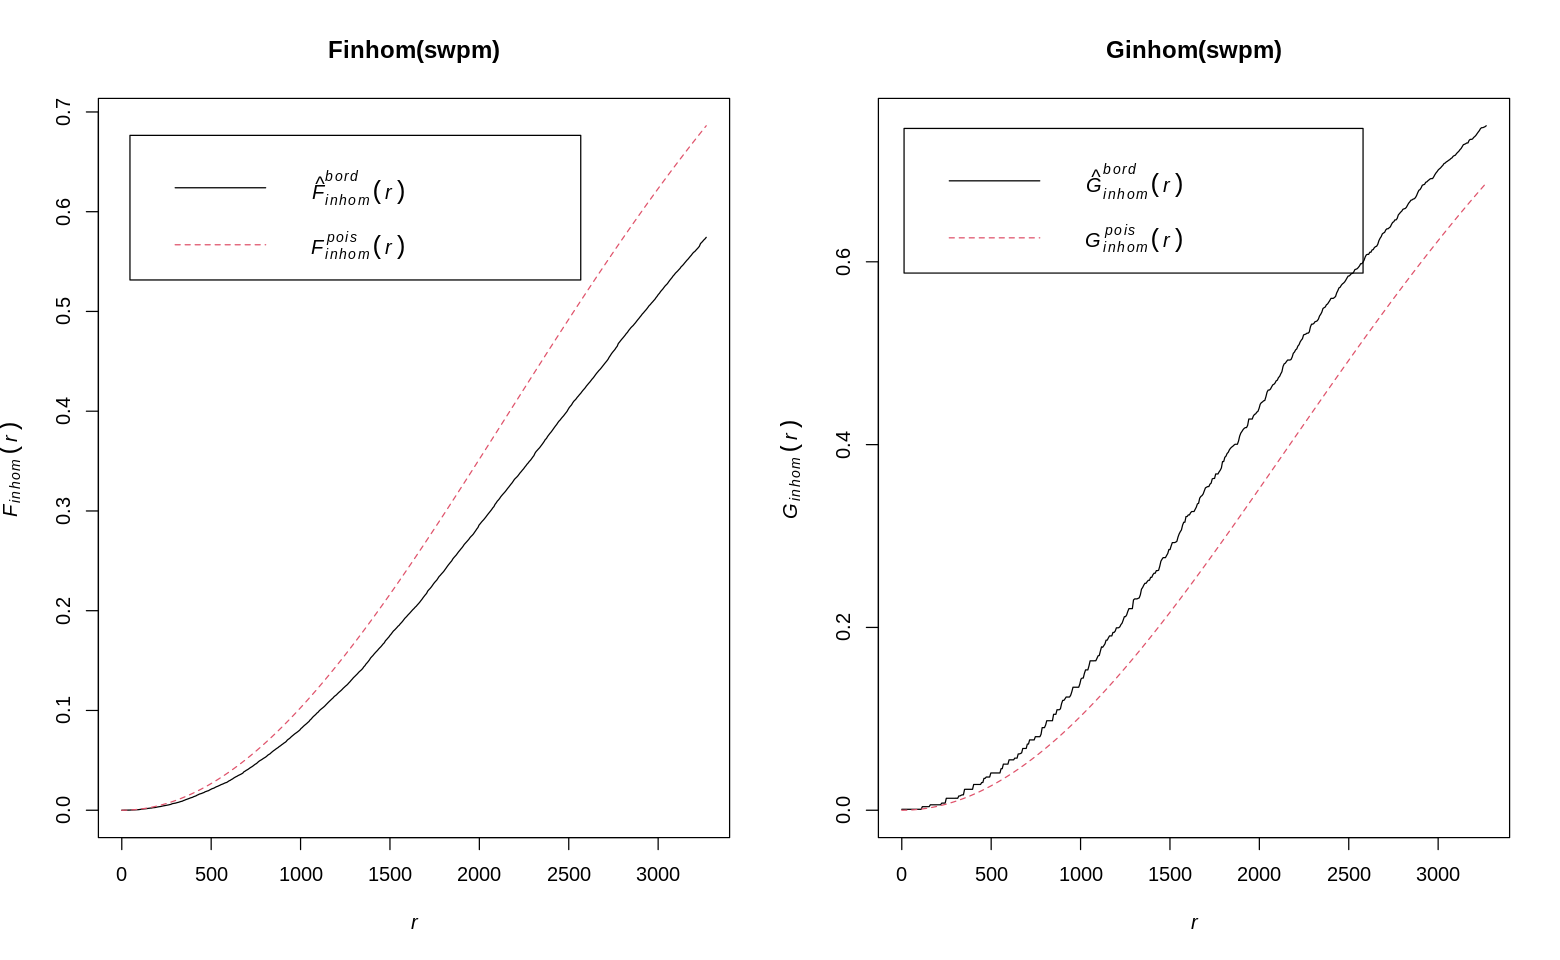

In [ ]:
par(mfrow = c(1,2))
plot(Finhom(swpm))
plot(Ginhom(swpm))

Con respecto a las graficas de pruebas de no homogeneidad, se percibe que tanto para la función de los vecinos más cercanos $G$ como para la función de espacio vacío $F$, las funciones teorícas y empíricas presentan una tendencia similar. 

#### Intervalos de confianza y simulación de envelopes

In [ ]:
Fenvm <- envelope(swpm, Fest, nsim=100, fix.n=TRUE)
Genvm <- envelope(swpm, Gest, nsim=100, fix.n=TRUE)

Generating 100 simulations of CSR with fixed number of points  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,  100.

Done.
Generating 100 simulations of CSR with fixed number of points  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,  100.

Done.


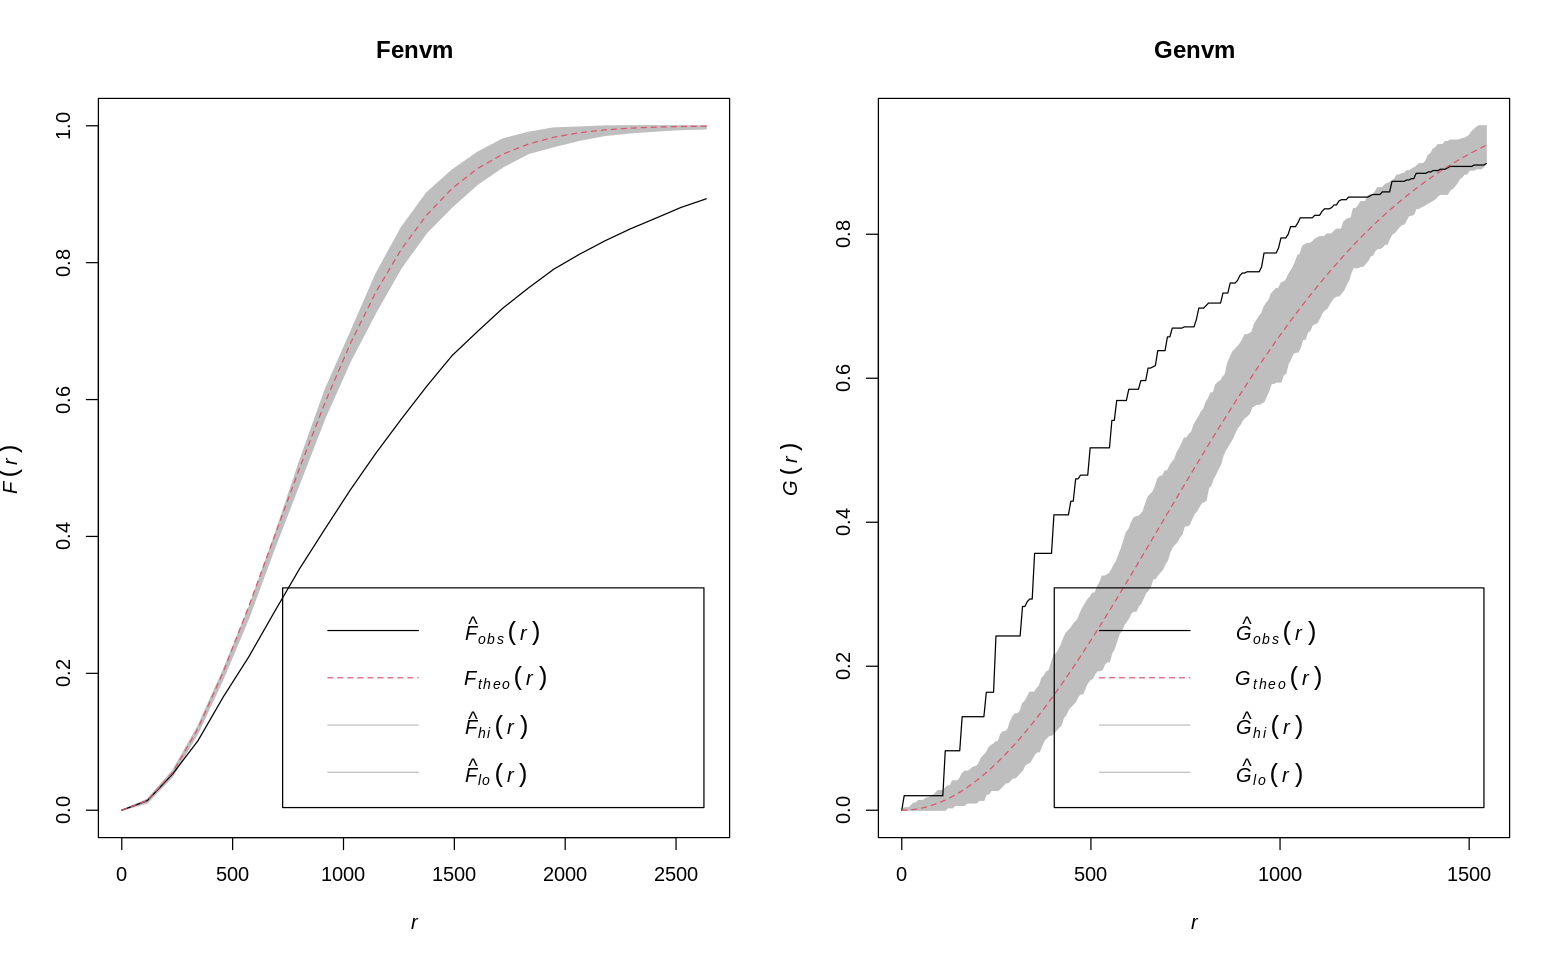

In [ ]:
par(mfrow = c(1,2))
plot(Fenvm)
plot(Genvm)

In [ ]:
Fenvinhm <- envelope(swpm, Ginhom, nsim=100, fix.n=TRUE)
Genvinhm <- envelope(swpm, Finhom, nsim=100, fix.n=TRUE)

Generating 100 simulations of CSR with fixed number of points  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,  100.

Done.
Generating 100 simulations of CSR with fixed number of points  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,  100.

Done.


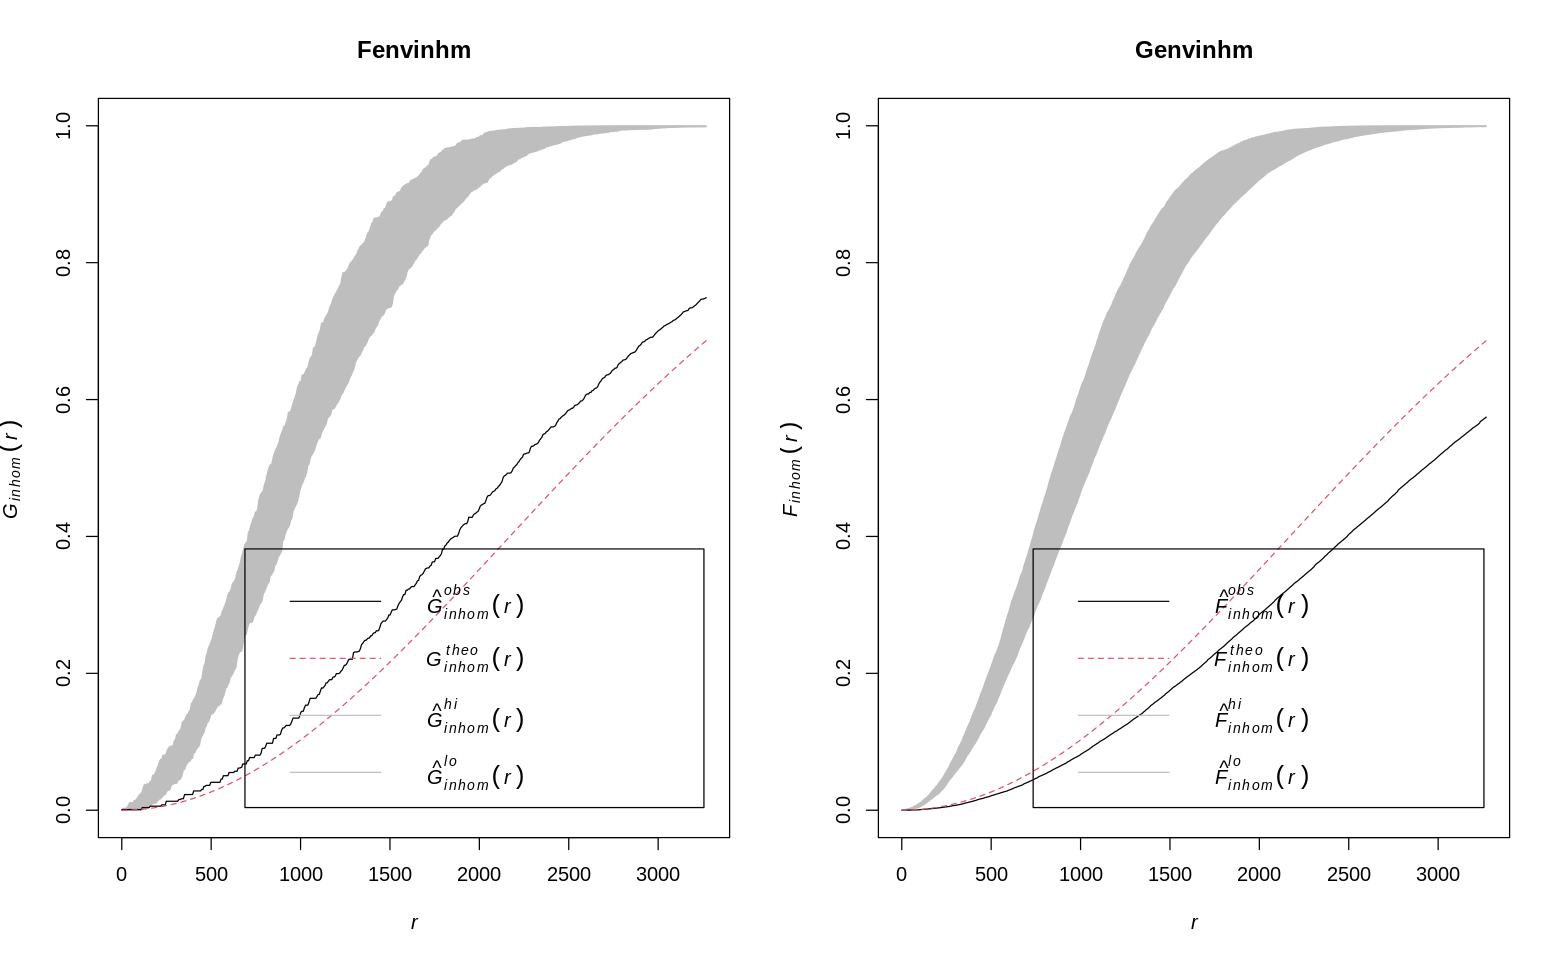

In [ ]:
par(mfrow = c(1,2))
plot(Fenvinhm)
plot(Genvinhm)

### Prueba de K-Ripley

Una función K proporciona un resumen de la dependencia espacial en una amplia gama de escalas de patrón, incluidas todas las distancias evento-evento, no solo las distancias vecinas más cercanas. Además, se conoce la forma teórica de la función para varios posibles modelos de procesos puntuales espaciales. Por lo tanto, la función no solo se puede utilizar para explorar la dependencia espacial, sino también para sugerir modelos específicos para representarla y estimar los parámetros de dichos modelos.

La función K se definen y estiman bajo el supuesto de que el proceso puntual es estacionario (homogéneo)

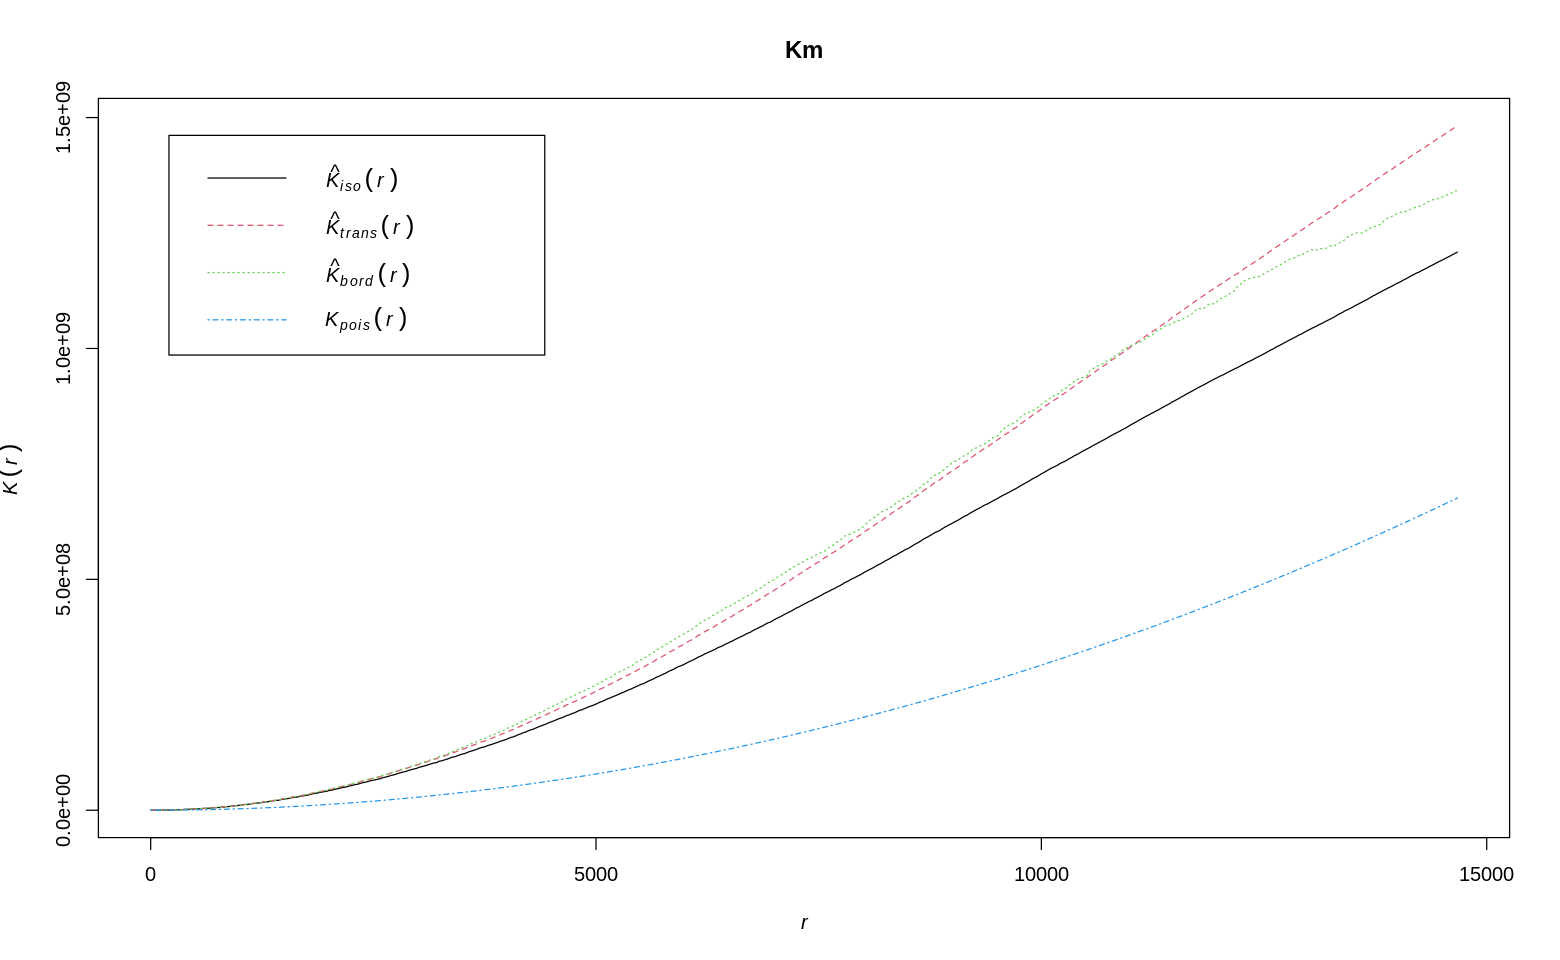

In [ ]:
Km = Kest(bdsms_pppm)
plot(Km)

Dado que los valores empiricos de la función $K$ de Ripley es mayor que la función teorica, la prueba sugiere de un patrón agrupado.

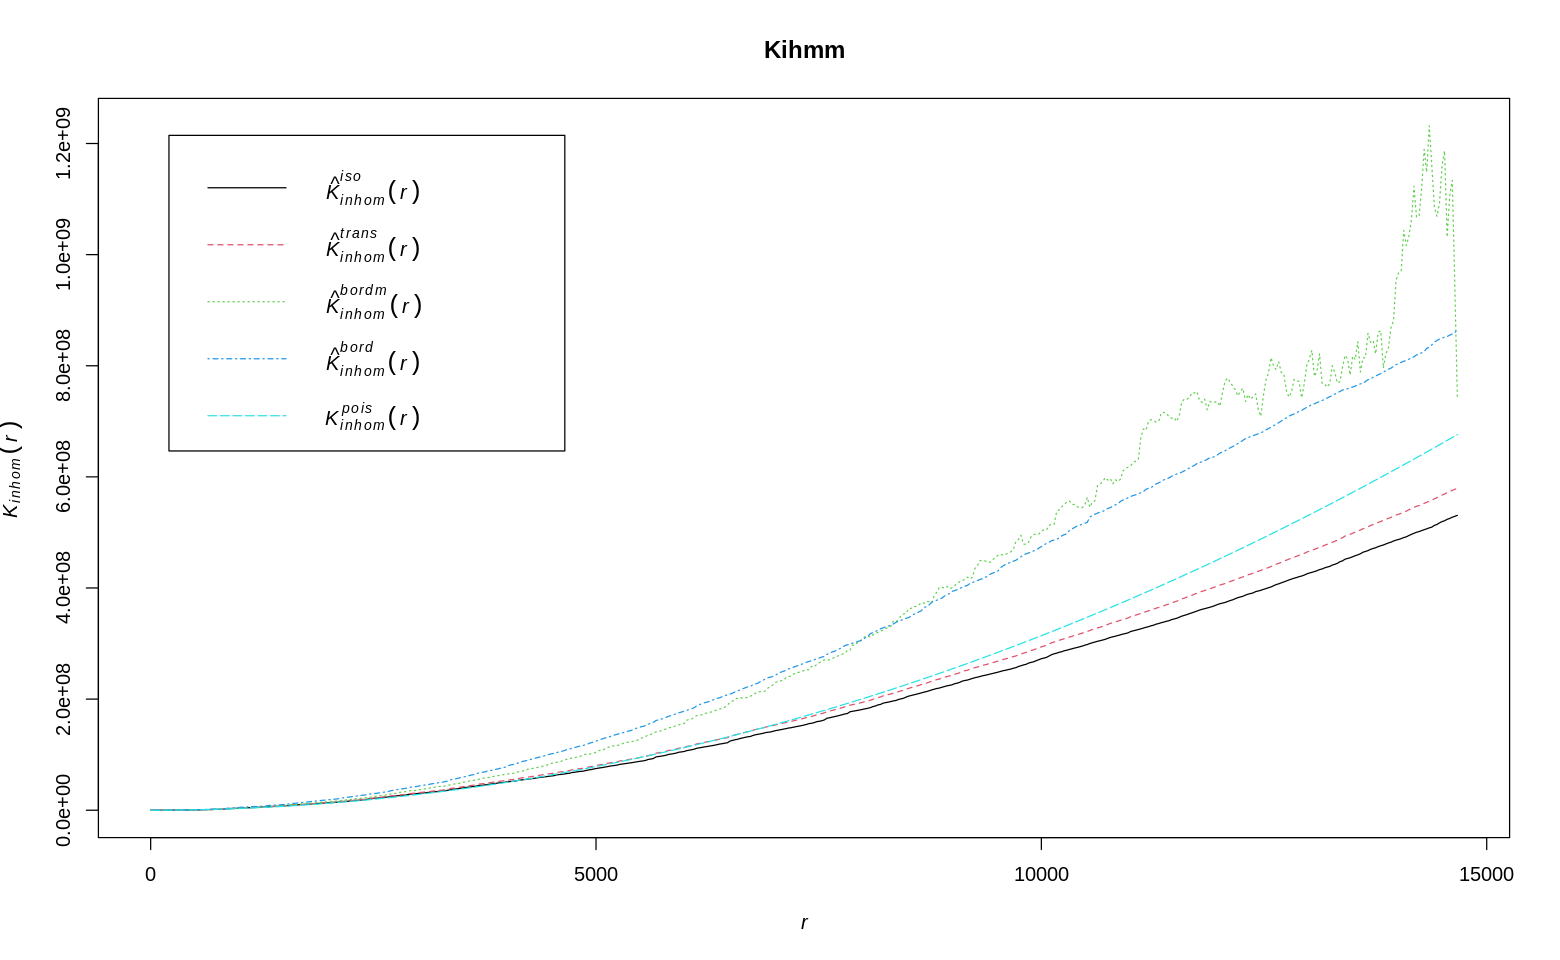

In [ ]:
Kihmm = Kinhom(bdsms_pppm)
plot(Kihmm)

Con respecto a las graficas de pruebas de no homogeneidad, se percibe las funciones $K$ teorícas y empíricas presentan una tendencia similar. 

### Intervalos de confianza y simulación de envelopes

In [ ]:
Kenvm = envelope(swpm, fun = Kest, nsim = 50)

Generating 50 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49,  50.

Done.


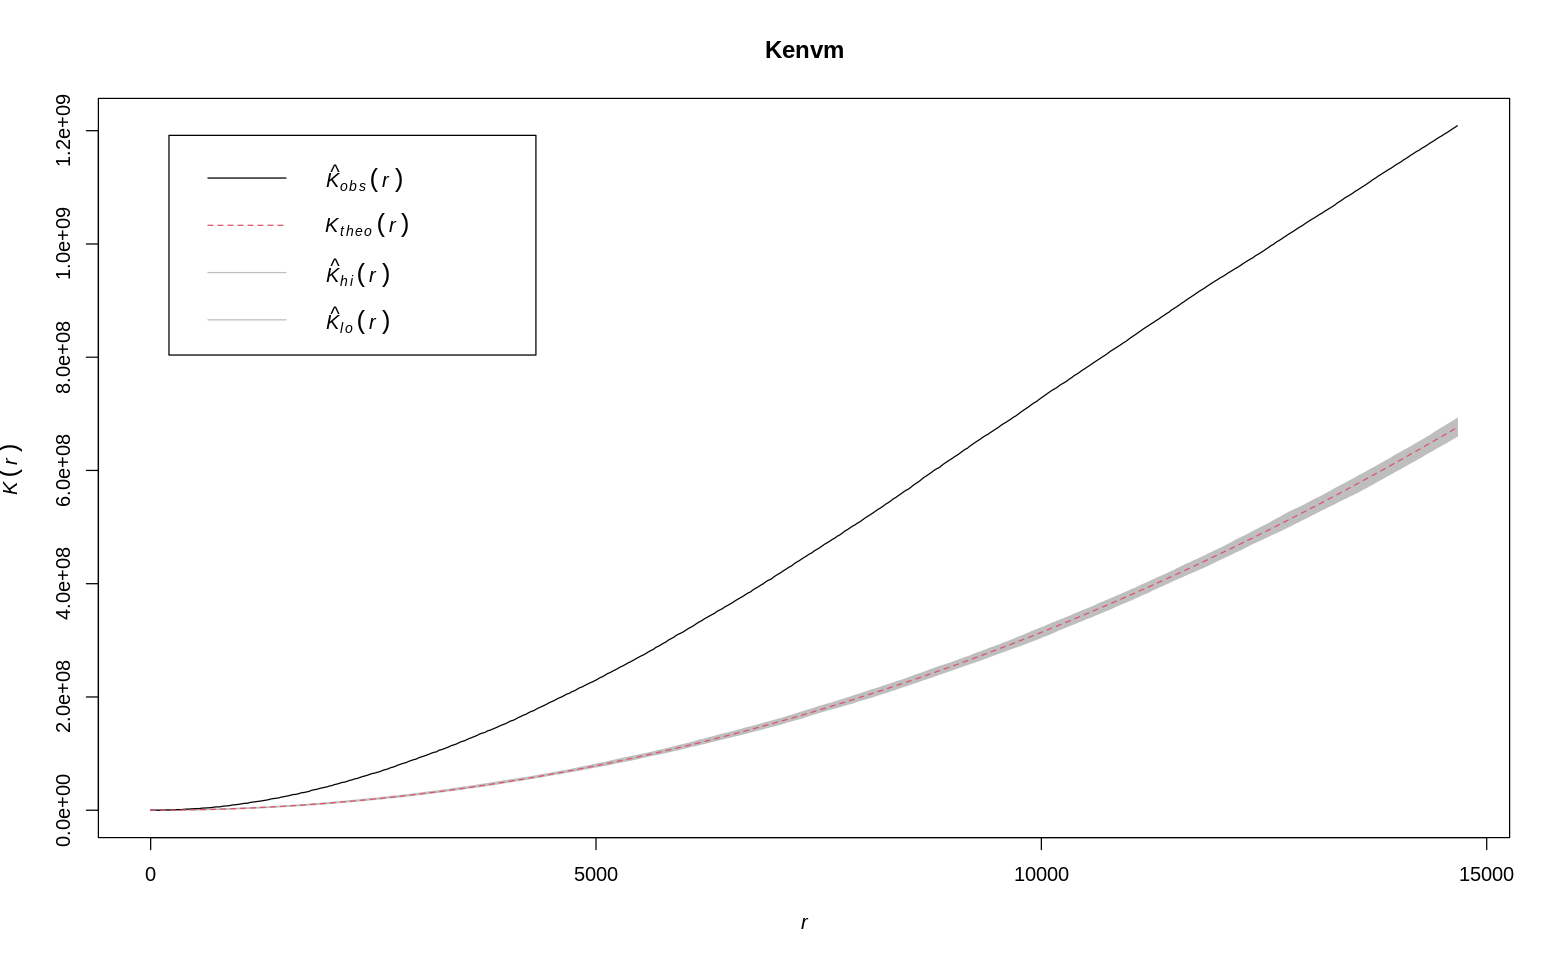

In [ ]:
plot(Kenvm)

### Correlación por pares

Una herramienta alternativa es la función de correlación de pares $g(r)$ que contiene contribuciones solo de distancias entre puntos iguales a $r$.

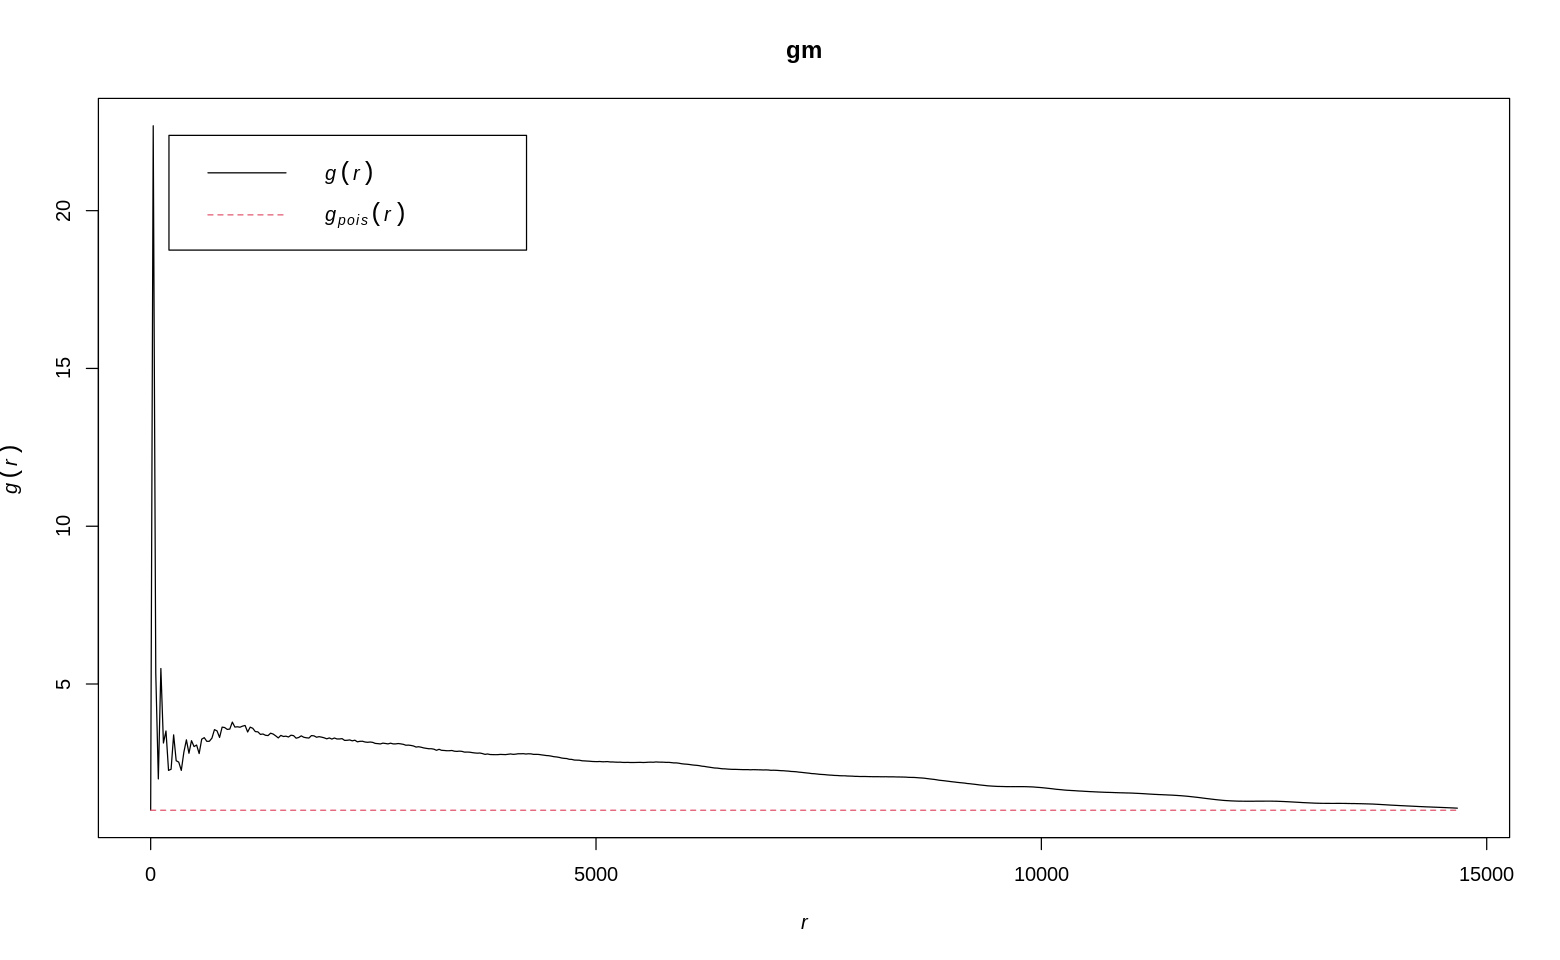

In [ ]:
gm = pcf(Km, spar=0.5)
plot(gm)

Dado que $g(r)$ toma valores mayores que 1, se puede concluir que la distancia entre punto es más fecuente que lo esperado para un patrón CRS, lo que sugiere un patrón agreado. 

Estime la función de correlación marcada de un patrón de puntos marcados

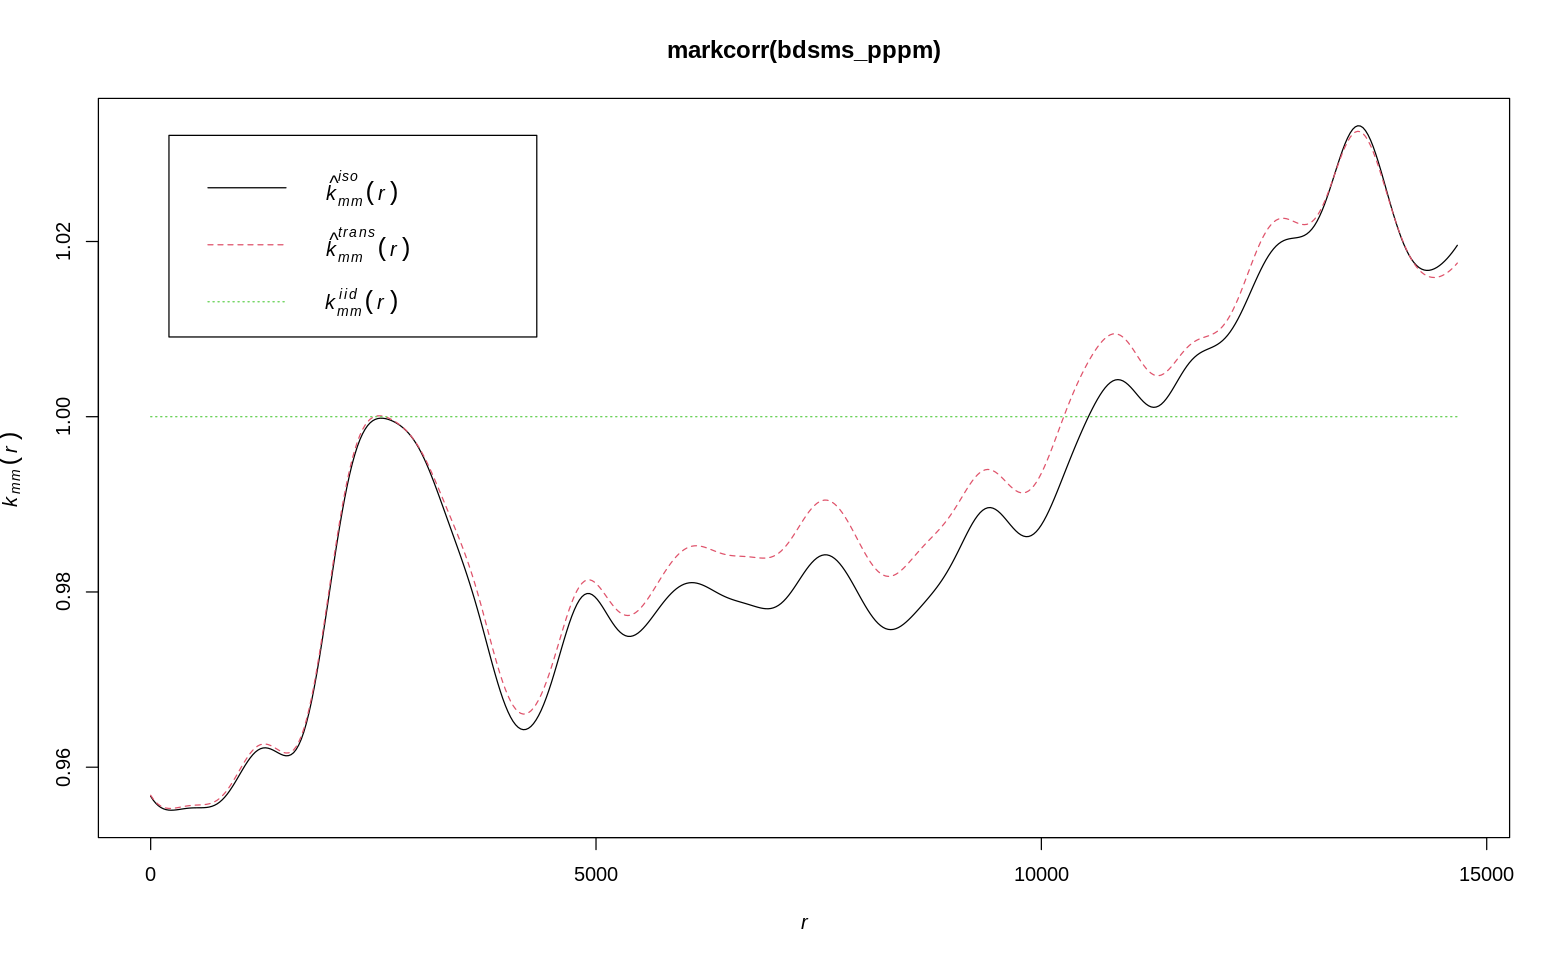

In [ ]:
plot(markcorr(bdsms_pppm))

## Referencias

- Datos tomados del Catálogo de sismicidad del Servicio Geológico Colombiano - SGC.
- Baddeley A., Rubak E., Turner R. (2016). Spatial point patterns: Methodology and applications with R. Chapman & Hall/CRC. (p. 127-154). Editors: Keiding N., Morgan B.J.T., Wikle C.K., Van der Heijden P.
- Borhorquez M. (2020). Estadı́stica espacial y espacio-temporal para campos aleatorios escalares y funcionales. Notas de clase. Colombia. (p. 103-125).